<a href="https://colab.research.google.com/github/CoiferousYogi/BK-Birla_L-T_ML_Assignments/blob/main/L%26T_ML_Assignment3_End_to_End_Classification_Techniques_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Music Genre Classification from Audio Features

### In this assignment, I will be using the Spotify Tracks dataset for classification of music genres.
_______
<b>Colab File Link: </b> https://colab.research.google.com/drive/1w2GAPaSm6ymzehsC-VDD3JO7JAYToLjH#scrollTo=Tn3w-dahPCyD

________

<b><i>Get the dataset from here: </i></b>https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

________

<i>Please refer to the Github repository for the whole code as the pdf might not contain the entire work.</i>
<br>
<b><i>Github Repository: </i></b>

# Introduction

Music genre classification is a challenging problem in the field of music information retrieval. Accurately categorizing songs into their respective genres based solely on audio features is a complex task, as genres can be highly subjective and influenced by various cultural and temporal factors. However, the ability to automatically classify music genres can have significant applications in music recommendation systems, music organization, and understanding listener preferences.

In [1]:
# !pip install xgboost

### Importing the necessary packages

In [2]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/spotify_tracks.csv')

df = pd.DataFrame(data)

# Print the table
df.sample(5)

Unnamed: 0                track_id  \
99138        99138  4b4ETAnCPzuL71IhujRpdW   
78251        78251  0aNzTtCyoLhlXtATP7bcHh   
16922        16922  5SBm6jz3bNhnbgerw5sJ9g   
106000      106000  0g4fzRkbLeCDUCoe5iUOcf   
16281        16281  7FiFjvtaXAx4nmGGUeON9L   

                                       artists  \
99138                              Bryan Adams   
78251                            Markus Becker   
16922   Wolfgang Amadeus Mozart;Danielle Laval   
106000                                Lykke Li   
16281         Robert Schumann;Pavel Nersessian   

                                               album_name  \
99138                                   Del gusto de mamá   
78251                               Nano (vom Planeten X)   
16922                         Mozart - Inspiring Classics   
106000                                     so sad so sexy   
16281   Schumann, Poulenc & Others: Piano Works (Live ...   

                                               track_name  popularity  \
99138                      Let's Make A Night To Remember           0   
78251                               Nano (vom Planeten X)          33   
16922   8 Variations on ‘Dieu d'amour’ from ‘Les maria...           3   
106000                             sex money feelings die          74   
16281   Carnaval, Op. 9: No. 6, Florestan (Live in Jap...           0   

        duration_ms  explicit  danceability  energy  ...  loudness  mode  \
99138        378906     False         0.470   0.621  ...    -6.763     1   
78251        190750     False         0.687   0.971  ...    -2.951     0   
16922         80453     False         0.372   0.076  ...   -24.310     1   
106000       139840      True         0.789   0.534  ...    -6.347     0   
16281         58800     False         0.435   0.158  ...   -20.203     0   

        speechiness  acousticness  instrumentalness  liveness  valence  \
99138        0.0253        0.2060          0.000725    0.1350    0.396   
78251        0.0775        0.0124          0.000000    0.0783    0.692   
16922        0.0507        0.9950          0.967000    0.1370    0.553   
106000       0.0709        0.3230          0.000003    0.0645    0.631   
16281        0.0368        0.9950          0.876000    0.1520    0.211   

          tempo  time_signature        track_genre  
99138   175.906               4  singer-songwriter  
78251   131.961               4              party  
16922    90.987               1          classical  
106000  134.055               4            swedish  
16281    59.740               3          classical  

[5 rows x 21 columns]

## Basic Questions about the Data

#### Q1. How big is the dataset?

In [3]:
df.shape

(114000, 21)

#### Q2. How does the dataset look like?

In [4]:
df.sample(5)

Unnamed: 0                track_id       artists       album_name  \
91927        91927  54fygPF4NkI5lEK2GxsStU       Chicago             80's   
73451        73451  71QzpNzL1Q6KPOV5ilyBVW    Tale Of Us            Unity   
22416        22416  4QugOfcxDdyDOLauzAC1uG        Attila  About That Life   
104122      104122  5qIu7xWmsp8UMxnJbSDaU5  David Bisbal     David Bisbal   
19820        19820  1zEvVF0TuZ25UHnzAutUuX     Mini Thin       City Bitch   

                    track_name  popularity  duration_ms  explicit  \
91927   You're the Inspiration           0       230440     False   
73451                    Alone          38       333569     False   
22416          About That Life          24       185789      True   
104122                  Dígale          37       264506     False   
19820               City Bitch          43       205387      True   

        danceability  energy  ...  loudness  mode  speechiness  acousticness  \
91927          0.604   0.424  ...   -12.288     1       0.0278      0.329000   
73451          0.802   0.556  ...   -12.989     1       0.0437      0.034100   
22416          0.381   0.903  ...    -3.883     1       0.0762      0.000511   
104122         0.564   0.451  ...    -7.928     1       0.0303      0.597000   
19820          0.791   0.606  ...   -12.038     1       0.2960      0.070600   

        instrumentalness  liveness  valence    tempo  time_signature  \
91927           0.000000     0.116   0.2910   73.924               4   
73451           0.914000     0.079   0.0371  126.001               4   
22416           0.000009     0.344   0.4740  126.538               4   
104122          0.000000     0.131   0.3150  129.981               4   
19820           0.000000     0.330   0.7990  134.979               4   

           track_genre  
91927             rock  
73451   minimal-techno  
22416      death-metal  
104122         spanish  
19820          country  

[5 rows x 21 columns]

#### Q3. What is the datatype of each feature(column)?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

#### Q4. Are there any missing values?

In [6]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

#### Q5. How does the data look like mathematically? (Summary Statistics)

In [7]:
df.describe()

Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -10.013000       0.000000   
50%         0.685000       5.000000      -7.004000       1.000000   
75%         0.854000       8.000000      -5.003000       1.000000   
max         1.000000      11.000000       4.532000       1.000000   

         speechiness   acousticness  instrumentalness       liveness  \
count  114000.000000  114000.000000     114000.000000  114000.000000   
mean        0.084652       0.314910          0.156050       0.213553   
std         0.105732       0.332523          0.309555       0.190378   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.035900       0.016900          0.000000       0.098000   
50%         0.048900       0.169000          0.000042       0.132000   
75%         0.084500       0.598000          0.049000       0.273000   
max         0.965000       0.996000          1.000000       1.000000   

             valence          tempo  time_signature  
count  114000.000000  114000.000000   114000.000000  
mean        0.474068     122.147837        3.904035  
std         0.259261      29.978197        0.432621  
min         0.000000       0.000000        0.000000  
25%         0.260000      99.218750        4.000000  
50%         0.464000     122.017000        4.000000  
75%         0.683000     140.071000        4.000000  
max         0.995000     243.372000        5.000000

#### Q6. Are there any duplicate values?

In [8]:
df.duplicated().sum()

np.int64(0)

<b>There are 450 duplicated rows in our dataset, which is expected since songs can belong to more than one genre.

#### Q7. How is the correlation between different columns?

In [9]:
# For correlation, we make a separate df containing only numerical features
df_numerical = df.select_dtypes(include=['int64', 'float64'])
df_numerical.head()
df_numerical.corr()

Unnamed: 0  popularity  duration_ms  danceability    energy  \
Unnamed: 0          1.000000    0.032142    -0.032743      0.003444 -0.055994   
popularity          0.032142    1.000000    -0.007101      0.035448  0.001056   
duration_ms        -0.032743   -0.007101     1.000000     -0.073426  0.058523   
danceability        0.003444    0.035448    -0.073426      1.000000  0.134325   
energy             -0.055994    0.001056     0.058523      0.134325  1.000000   
key                -0.005520   -0.003853     0.008114      0.036469  0.048006   
loudness           -0.027307    0.050423    -0.003470      0.259077  0.761690   
mode                0.005107   -0.013931    -0.035556     -0.069219 -0.078362   
speechiness        -0.084952   -0.044927    -0.062600      0.108626  0.142509   
acousticness        0.076840   -0.025472    -0.103788     -0.171533 -0.733906   
instrumentalness   -0.070286   -0.095139     0.124371     -0.185606 -0.181879   
liveness            0.033639   -0.005387     0.010321     -0.131617  0.184796   
valence             0.053111   -0.040534    -0.154479      0.477341  0.258934   
tempo              -0.025824    0.013205     0.024346     -0.050450  0.247851   
time_signature     -0.021115    0.031073     0.018225      0.207218  0.187126   

                       key  loudness      mode  speechiness  acousticness  \
Unnamed: 0       -0.005520 -0.027307  0.005107    -0.084952      0.076840   
popularity       -0.003853  0.050423 -0.013931    -0.044927     -0.025472   
duration_ms       0.008114 -0.003470 -0.035556    -0.062600     -0.103788   
danceability      0.036469  0.259077 -0.069219     0.108626     -0.171533   
energy            0.048006  0.761690 -0.078362     0.142509     -0.733906   
key               1.000000  0.038590 -0.135916     0.020418     -0.040937   
loudness          0.038590  1.000000 -0.041764     0.060826     -0.589803   
mode             -0.135916 -0.041764  1.000000    -0.046532      0.095553   
speechiness       0.020418  0.060826 -0.046532     1.000000     -0.002186   
acousticness     -0.040937 -0.589803  0.095553    -0.002186      1.000000   
instrumentalness -0.006823 -0.433477 -0.049955    -0.089616      0.104027   
liveness         -0.001600  0.076899  0.014012     0.205219     -0.020700   
valence           0.034103  0.279848  0.021953     0.036635     -0.107070   
tempo             0.010917  0.212446  0.000566     0.017273     -0.208224   
time_signature    0.015065  0.191992 -0.024092    -0.000011     -0.176138   

                  instrumentalness  liveness   valence     tempo  \
Unnamed: 0               -0.070286  0.033639  0.053111 -0.025824   
popularity               -0.095139 -0.005387 -0.040534  0.013205   
duration_ms               0.124371  0.010321 -0.154479  0.024346   
danceability             -0.185606 -0.131617  0.477341 -0.050450   
energy                   -0.181879  0.184796  0.258934  0.247851   
key                      -0.006823 -0.001600  0.034103  0.010917   
loudness                 -0.433477  0.076899  0.279848  0.212446   
mode                     -0.049955  0.014012  0.021953  0.000566   
speechiness              -0.089616  0.205219  0.036635  0.017273   
acousticness              0.104027 -0.020700 -0.107070 -0.208224   
instrumentalness          1.000000 -0.079893 -0.324312 -0.050330   
liveness                 -0.079893  1.000000  0.019086  0.000600   
valence                  -0.324312  0.019086  1.000000  0.078273   
tempo                    -0.050330  0.000600  0.078273  1.000000   
time_signature           -0.082580 -0.023651  0.133686  0.066641   

                  time_signature  
Unnamed: 0             -0.021115  
popularity              0.031073  
duration_ms             0.018225  
danceability            0.207218  
energy                  0.187126  
key                     0.015065  
loudness                0.191992  
mode                   -0.024092  
speechiness            -0.000011  
acousticness           -0.176138  
instrumentalne

## Function Definitions

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import base64
from io import BytesIO
from IPython.display import display, HTML
import tensorflow as tf
from tensorflow import keras

# Numeric EDA plots
def numeric_eda_plots(dataframe, column_name, x_label):
    '''
    Purpose: Generates a histogram and a box plot

    Parameters:
    - dataframe (DataFrame): The input DataFrame containing the data to be plotted.
    - column_name (str): The name of the column in the DataFrame to be plotted.
    - x_label (str): The label for the x-axis.
    '''
    #Define the figure
    fig_1 = plt.figure(1)

    #Adjust the distance between the plots
    plt.subplots_adjust(hspace=0.6)

    ### First plot - Histogram ###
    plt.subplot(211) #Position
    plt.title("Histogram of " + column_name) #Title
    sns.histplot(data = dataframe, x = column_name, kde=True)
    plt.xlabel(x_label);

    ### Second plot - Box plot ###
    plt.subplot(212) #Position
    plt.title("Box plot of " + column_name) #Title
    sns.boxplot(data = dataframe, x = column_name);
    plt.xlabel(x_label);

# Numeric EDA summary
def numeric_eda_summary(dataframe, column_name):
    '''
    Purpose: Generates count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values.

    Parameters:

    - dataframe (DataFrame): The input DataFrame containing the data.
    - column_name (str): The name of the numerical column.
    '''
    return dataframe[column_name].describe()

# Categorical EDA plot
def categorical_eda_plot(dataframe, column_name, plot_title, x_label, y_label):
    '''
    Purpose: Generates a bar plot

    Parameters:
    - dataframe (DataFrame): The input DataFrame containing the data to be plotted.
    - column_name (str): The name of the column in the DataFrame to be plotted.
    - plot_title (str): The title of the plot.
    - x_label (str): The label for the x-axis.
    - y_label (str): The label for the y-axis.
    '''
    # Create a bar plot using Seaborn
    sns.countplot(x=column_name, data=dataframe, edgecolor="black", palette='viridis')

    # Add labels and title
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Rotate x-axis labels by 90 degrees
    plt.xticks(rotation=90);

# Categorical EDA description
def categorical_eda_summary(dataframe, column_name):
    '''
    Purpose: Generates category name, count of occurrences, and the percentage of total

    Parameters:

    - dataframe (DataFrame): The input DataFrame containing the data.
    - column_name (str): The name of the categorical column.
    '''
    summary = dataframe[column_name].value_counts().reset_index()
    summary.columns = ['Category', 'Count']
    summary['Percentage of Total'] = round((summary['Count'] / summary['Count'].sum()) * 100,2)
    return summary

# Recall by genre
def recall_by_genre(y_test, y_pred):
    # Calculate confusion matrix for predicted genre labels
    matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))

    # Calculate recall for each genre (true positives / (true positives + false negatives))
    recall = matrix.diagonal() / matrix.sum(axis=1) * 100

    # Create DataFrame for genre-wise recall
    genre_recall = pd.DataFrame({'recall': recall})

    # Create DataFrames for genres and predictions
    genres_labels = pd.DataFrame(genres)

    # Label genre & prediction columns for clarity
    genres_labels.columns = ['genre']

    # Combine genre labels & recall, sort by descending recall, reset index
    recall_by_genre = pd.concat([genres_labels, genre_recall], axis=1).sort_values(by='recall', ascending=False).reset_index(drop=True)

    return recall_by_genre

# Precision by genre
def precision_by_genre(y_test, y_pred):
    # Calculate confusion matrix for predicted genre labels
    matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))

    # Calculate precision for each genre (true positives / (true positives + false positives))
    precision = matrix.diagonal() / matrix.sum(axis=0) * 100

    # Create DataFrame for genre-wise precision
    genre_precision = pd.DataFrame({'precision': precision})

    # Create DataFrames for genres and predictions
    genres_labels = pd.DataFrame(genres)

    # Label genre & prediction columns for clarity
    genres_labels.columns = ['genre']

    # Combine genre labels & precision, sort by descending precision, reset index
    precision_by_genre = pd.concat([genres_labels, genre_precision], axis=1).sort_values(by='precision', ascending=False).reset_index(drop=True)

    return precision_by_genre

# F1 score by genre
def f1_by_genre(y_test, y_pred):
    # Calculate confusion matrix for predicted genre labels
    matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))

    # Calculate precision and recall
    precision = matrix.diagonal() / matrix.sum(axis=0)
    recall = matrix.diagonal() / matrix.sum(axis=1)

    # Calculate F1-score for each genre
    f1_score = 2 * (precision * recall) / (precision + recall) * 100

    # Create DataFrame for genre-wise F1-score
    genre_f1 = pd.DataFrame({'f1_score': f1_score})

    # Create DataFrames for genres and predictions
    genres_labels = pd.DataFrame(genres)

    # Label genre & prediction columns for clarity
    genres_labels.columns = ['genre']

    # Combine genre labels & F1-score, sort by descending F1-score, reset index
    f1_by_genre = pd.concat([genres_labels, genre_f1], axis=1).sort_values(by='f1_score', ascending=False).reset_index(drop=True)

    return f1_by_genre

# Get percentage of null values by column
def null_values(dataframe):
    '''
    Purpose: Generates a bar chart with the percentage of null values for each column in the dataframe.

    Parameters:
    - dataframe (DataFrame): The input DataFrame containing the data.
    '''
    # Let's show the percentage of missing data values per column
    nan_count_by_column = dataframe.isna().sum()
    total_rows = len(dataframe)

    # Calculate the percentage of NaNs for each column
    nan_percentage_by_column = (nan_count_by_column / total_rows) * 100

    # Plotting with Seaborn
    # plt.figure(figsize=(14, 4))
    sns.barplot(x=nan_percentage_by_column.index, y=nan_percentage_by_column.values, palette="viridis")

    # Adding labels and title
    plt.xlabel("Columns")
    plt.ylabel("Missing data values percentage")
    plt.title("Missing data values percentage by column")

    # Display the percentage values on top of each bar
    for i, value in enumerate(nan_percentage_by_column.values):
        plt.text(i, value + 0.5, f"{value:.0f}%", ha='center', va='bottom', fontsize=8)

    # Set y-axis limits to range from 0 to 100
    plt.ylim(0, 100)

    # Rotate x-axis labels
    plt.xticks(rotation=90)

    # Display the plot
    plt.show()

# Scrollable barplots
def generate_scrollable_barplot(data_frame, variable, title):
    # Sort the DataFrame by the mean value of the variable
    sorted_df = data_frame.sort_values(by=variable, ascending=False)

    # Create a large-sized plot
    plt.figure(figsize=(20, 6))
    sns.barplot(x=sorted_df.index, y=variable, data=sorted_df)
    plt.xticks(rotation=90)  # Rotate labels for better fit
    plt.title(title)
    plt.xlabel('Genre')
    plt.ylabel(f'Average {variable.capitalize()}')

    # Save the plot as a PNG image and encode the image
    buf = BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight')
    plt.close()
    data = base64.b64encode(buf.getbuffer()).decode("ascii")

    # Create an HTML container with a scrollbar to display the plot
    html_string = f"""
    <div style="overflow-x: scroll; width:1000px; height:400px;">
        <img src='data:image/png;base64,{data}' style='width:2000px; height:auto;'>
    </div>
    """

    # Display the plot with a scrollbar using the HTML function from IPython
    return HTML(html_string)

# Scaling
def perform_scaling(df, columns_to_scale, scaler_type):
    """
    Perform scaling on specified columns of a DataFrame and merge scaled columns back into the original DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - columns_to_scale (list): List of column names to scale.
    - scaler_type (int): 1 for StandardScaler, 2 for MinMaxScaler.

    Returns:
    - df_scaled (pd.DataFrame): DataFrame with scaled columns merged with unscaled columns.
    """
    if scaler_type == 1:
        scaler = StandardScaler()
    elif scaler_type == 2:
        scaler = MinMaxScaler()
    else:
        raise ValueError("Invalid scaler_type. Use 1 for StandardScaler or 2 for MinMaxScaler.")

    scaled_data = scaler.fit_transform(df[columns_to_scale])
    scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
    df_scaled = pd.concat([df.drop(columns=columns_to_scale).reset_index(drop=True), scaled_df], axis=1)

    return df_scaled

# Accuracy by genre
def accuracy_by_genre(y_test, y_pred):
    # Calculate confusion matrix for predicted genre labels
    matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))

    # Calculate genre-wise accuracy as percentage
    matrix_pred = matrix.diagonal()/matrix.sum(axis=1)*100

    # Create DataFrame for genre-wise accuracy
    genre_accuracy = pd.DataFrame({'accuracy': matrix_pred})

    # Create DataFrames for genres and predictions
    genres_labels = pd.DataFrame(genres)
    # predictions = pd.DataFrame(matrix)

    # Label genre & prediction columns for clarity
    genres_labels.columns = ['genre']
    # predictions.columns = genres

    # Combine genre labels & accuracy, sort by descending accuracy, reset index
    accuracy_by_genre = pd.concat([genres_labels, genre_accuracy], axis=1).sort_values(by='accuracy', ascending=False).reset_index(drop=True)

    return accuracy_by_genre

# Top-K accuracy
def top_k_accuracy(y_test, y_pred, k):
    # Calculate top-k categorical accuracy
    top_k_accuracy = tf.keras.metrics.sparse_top_k_categorical_accuracy(y_test, y_pred, k=k)
    top_k_accuracy = round(np.mean(top_k_accuracy)*100,2)

    # Calculate accuracy
    accuracy = tf.keras.metrics.sparse_top_k_categorical_accuracy(y_test, y_pred, k=1)
    accuracy = round(np.mean(accuracy)*100,2)

    print(f"Top-{k} categorical accuracy: {top_k_accuracy}%")
    print(f"Accuracy: {accuracy}%")

# Exploratory Data Analysis

## General EDA

### Data Types

In [11]:
# Display data types of each column
df.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

The data for this project comes from a dataset of 114,000 Spotify tracks spanning 114 genres, collected and cleaned by the user "maharshipandya" from the Spotify API using Python. It is available at https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset on Huggingface. The dataset contains various audio features for each track, including danceability, energy, acousticness, instrumentalness, tempo, time signature and more. It also provides metadata like the track name, album, artists, duration, etc:

- **track_id:** The Spotify ID for the track
- **artists:** The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- **album_name:** The album name in which the track appears
- **track_name:** Name of the track
- **popularity:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- **duration_ms:** The track length in milliseconds
- **explicit:** Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
- **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- **loudness:** The overall loudness of a track in decibels (dB)
- **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- **time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- **track_genre:** The genre in which the track belongs

### Missing Data Values

<ipython-input-10-b5bc5a901a29>:174: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nan_percentage_by_column.index, y=nan_percentage_by_column.values, palette="viridis")


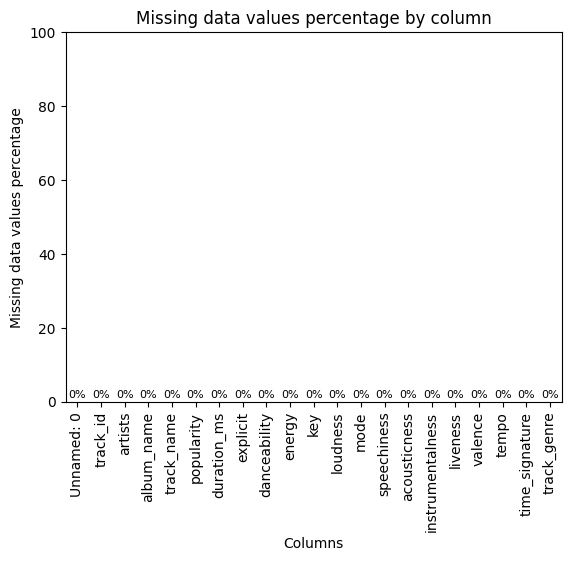

In [12]:
null_values(df)

There are no null values in this dataset

### Duplicated Data

In [13]:
# Check the total number of duplicated rows
df.duplicated().sum()

np.int64(0)

:There are 450 duplicated rows in our dataset, which is expected since songs can belong to more than one genre.

## Univariate EDA

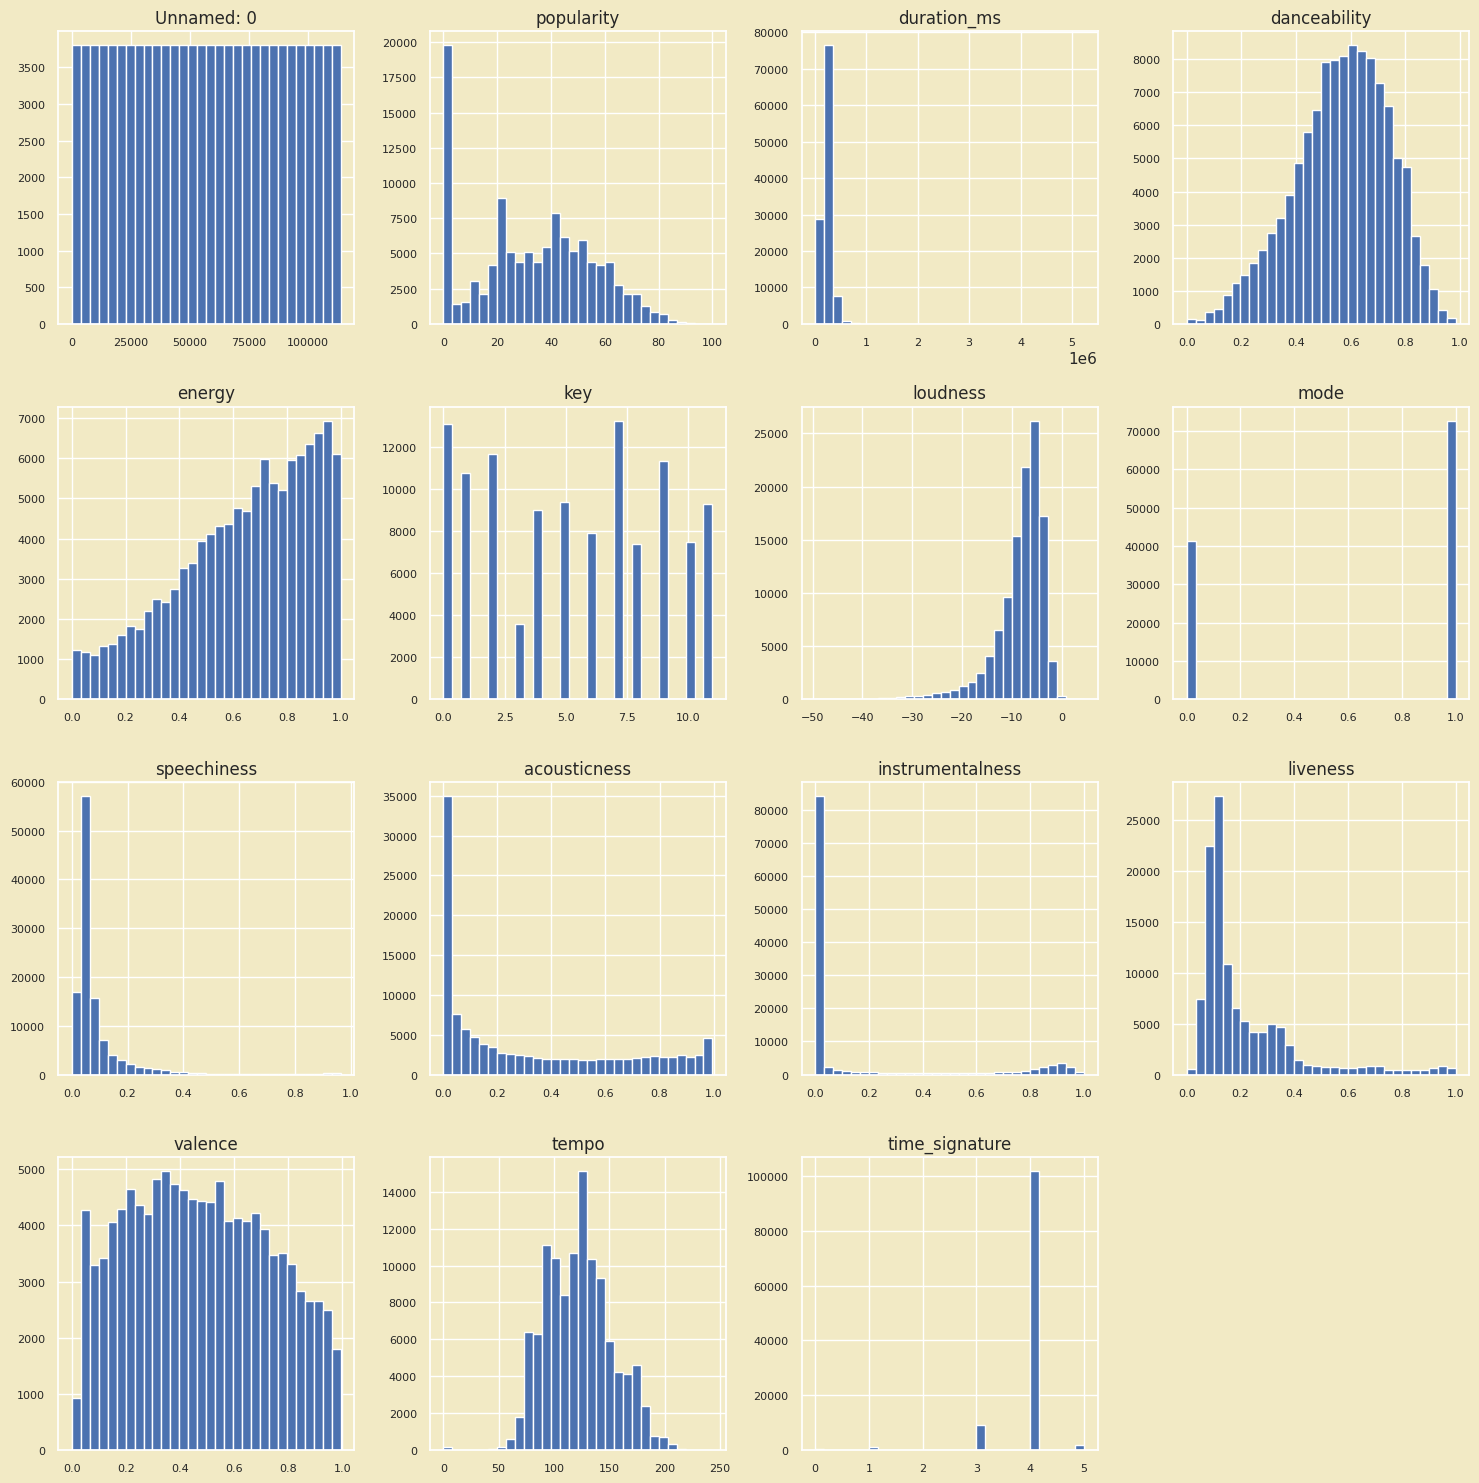

In [14]:
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
df_numerical.hist(figsize=(15,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

### Popularity

In [15]:
numeric_eda_summary(df, "popularity")

count    114000.000000
mean         33.238535
std          22.305078
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64

The data set contains 114,000 samples with a mean of 33.24 and a standard deviation of 22.31, indicating that the data is relatively dispersed. The variable ranges from 0 to 100, with a median of 35 and 75% of values less than or equal to 50.

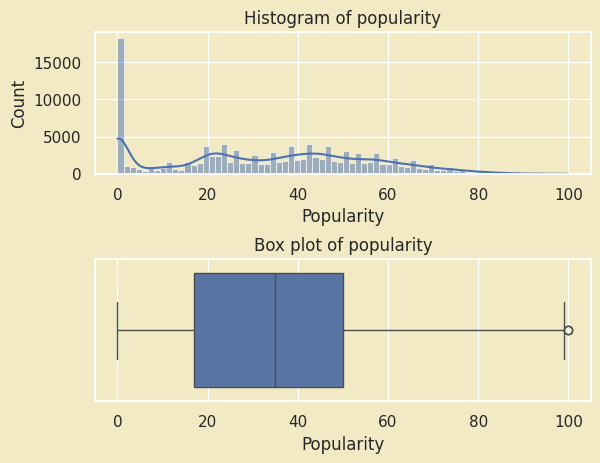

In [16]:
numeric_eda_plots(df, "popularity", "Popularity")

The box plot shows that most of the data is concentrated between 18-50, distributed in the lower range, but there are also some higher values. Except for a lot of 0 values, most of the data is evenly distributed.

### Explicit

In [17]:
categorical_eda_summary(df, "explicit")

Category   Count  Percentage of Total
0     False  104253                91.45
1      True    9747                 8.55

<ipython-input-10-b5bc5a901a29>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=dataframe, edgecolor="black", palette='viridis')


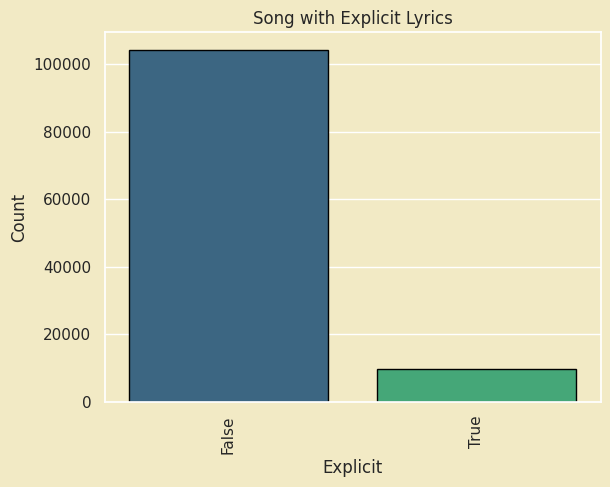

In [18]:
categorical_eda_plot(df, "explicit", "Song with Explicit Lyrics", "Explicit", "Count")

Among them, there are 104,253 samples in the "False" category, accounting for 91.45% of the total, and 9,747 samples in the "True" category, accounting for 8.55% of the total. It can be seen that the number of samples in the "False" category is much more than that in the "True" category.

### Duration_ms

In [19]:
numeric_eda_summary(df, "duration_ms")

count    1.140000e+05
mean     2.280292e+05
std      1.072977e+05
min      0.000000e+00
25%      1.740660e+05
50%      2.129060e+05
75%      2.615060e+05
max      5.237295e+06
Name: duration_ms, dtype: float64

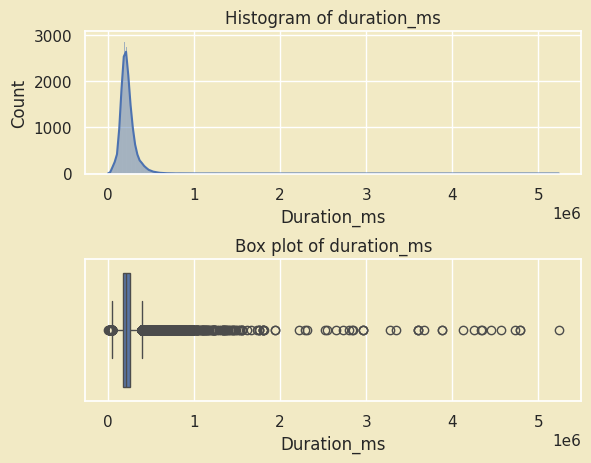

In [20]:
numeric_eda_plots(df, "duration_ms", "Duration_ms")

The average duration is about 228 seconds, with a standard deviation of 107 seconds, showing that there is a range of variation in duration overall. The shortest duration in the data is 0 milliseconds, while the longest duration is 5,237 seconds, indicating a very significant difference in the data set. The duration of the vast majority of samples is distributed between 174 and 261 seconds, with a median of about 213 seconds, showing the central trend of the data. However, there are some outliers, i.e. extremely high durations.

### Danceability

In [21]:
numeric_eda_summary(df, "danceability")

count    114000.000000
mean          0.566800
std           0.173542
min           0.000000
25%           0.456000
50%           0.580000
75%           0.695000
max           0.985000
Name: danceability, dtype: float64

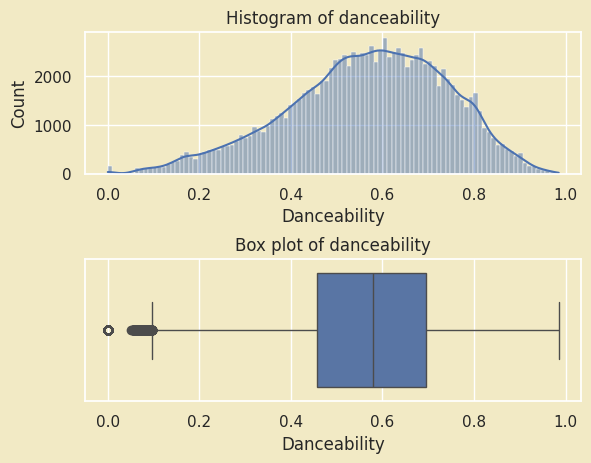

In [22]:
numeric_eda_plots(df, "danceability", "Danceability")

The data describes the statistical characteristics of danceability and contains a total of 114,000 samples. The average danceability score is 0.5668, showing a moderate level of danceability in the data set overall. The standard deviation is 0.1735, indicating that the distribution of danceability scores is relatively concentrated, with most samples scoring around the average level. The danceability score ranges from the lowest value 0 to the highest value 0.985, showing a certain range of change, while the 25%, 50% and 75% quantiles are 0.456, 0.580 and 0.695 respectively, further revealing the overall distribution of the danceability score Condition. Taken together, the data shows an overall trend of more balanced danceability ratings, but there are also some extreme low and high ratings.

### Energy              

In [23]:
numeric_eda_summary(df, "energy")

count    114000.000000
mean          0.641383
std           0.251529
min           0.000000
25%           0.472000
50%           0.685000
75%           0.854000
max           1.000000
Name: energy, dtype: float64

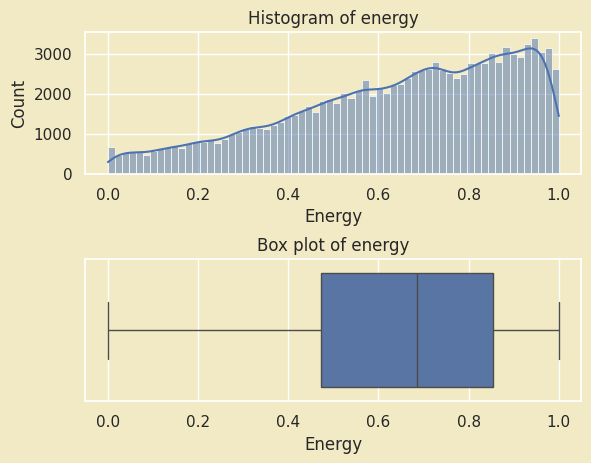

In [24]:
numeric_eda_plots(df, "energy", "Energy")

The average energy level of the data is 0.641, and the standard deviation is 0.252, indicating that the energy level of the data is relatively scattered overall, and the average energy is at a medium level. The minimum energy value is 0 and the maximum energy value is 1, indicating that the data set covers the entire range from the lowest energy to the highest energy. Most samples have moderate to high energy levels, but there are some low and very high energy exceptions.

### Key                   

In [25]:
categorical_eda_summary(df, "key")

Category  Count  Percentage of Total
0          7  13245                11.62
1          0  13061                11.46
2          2  11644                10.21
3          9  11313                 9.92
4          1  10772                 9.45
5          5   9368                 8.22
6         11   9282                 8.14
7          4   9008                 7.90
8          6   7921                 6.95
9         10   7456                 6.54
10         8   7360                 6.46
11         3   3570                 3.13

<ipython-input-10-b5bc5a901a29>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=dataframe, edgecolor="black", palette='viridis')


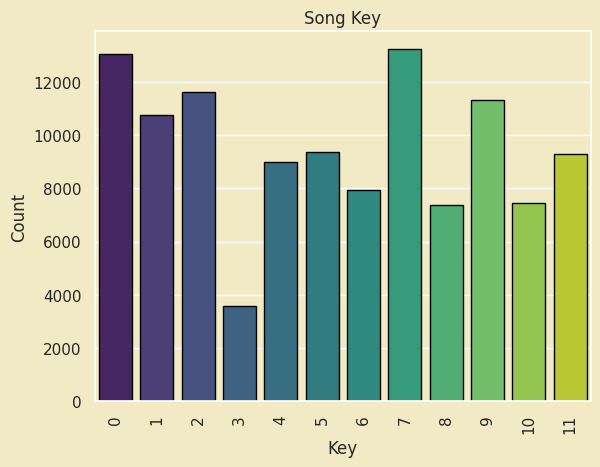

In [26]:
categorical_eda_plot(df, "key", "Song Key", "Key", "Count")

Among the samples, category 7 has the largest number of samples, while category 3 has the smallest number of samples.

### Loudness            

In [27]:
numeric_eda_summary(df, "loudness")

count    114000.000000
mean         -8.258960
std           5.029337
min         -49.531000
25%         -10.013000
50%          -7.004000
75%          -5.003000
max           4.532000
Name: loudness, dtype: float64

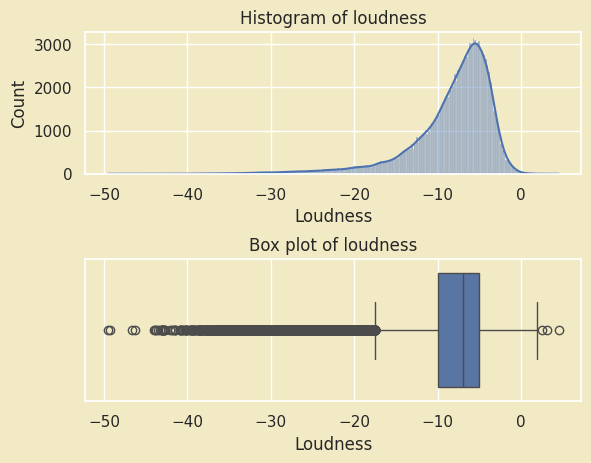

In [28]:
numeric_eda_plots(df, "loudness", "Loudness")

The mean value is -8.26 dB and the standard deviation is 5.03 dB, which shows that the data is relatively widely distributed, while the minimum value is -49.53 dB and the maximum value is 4.53 dB, which shows that the data range is very wide, covering from very low to Relatively high audio loudness levels. 25% of the data is below -10.01 dB, 50% of the data is below -7.00 dB, and 75% of the data is below -5.00 dB. These quantiles further reveal the distribution of the data. Taken together, this set of data shows the diversity of audio loudness levels, ranging from very low to relatively high.

### Mode                  

In [29]:
categorical_eda_summary(df, "mode")

Category  Count  Percentage of Total
0         1  72681                63.76
1         0  41319                36.24

<ipython-input-10-b5bc5a901a29>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=dataframe, edgecolor="black", palette='viridis')


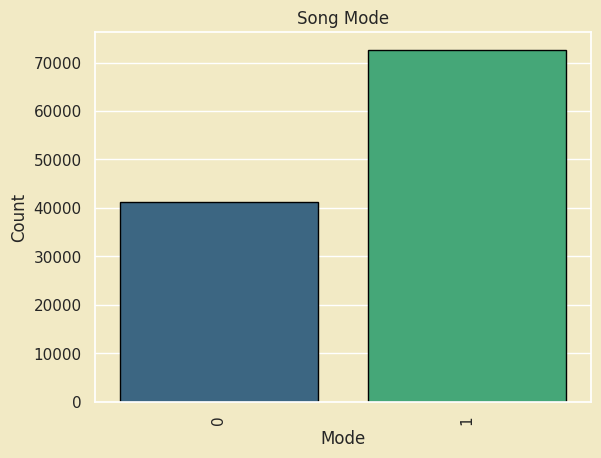

In [30]:
categorical_eda_plot(df, "mode", "Song Mode", "Mode", "Count")

Mode0 has 41,319 samples, accounting for 36.24% of the total, while mode1 has 72,681 samples, accounting for 63.76% of the total. The number of songs with mode 1 is much more than the number of songs with mode 0.

### Speechiness         

In [31]:
numeric_eda_summary(df, "speechiness")

count    114000.000000
mean          0.084652
std           0.105732
min           0.000000
25%           0.035900
50%           0.048900
75%           0.084500
max           0.965000
Name: speechiness, dtype: float64

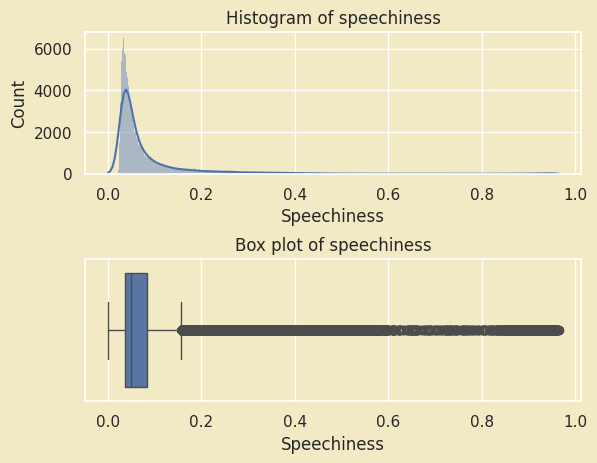

In [32]:
numeric_eda_plots(df, "speechiness", "Speechiness")

This variable represents the proportion of speech in the audio. The data shows that the average voice ratio is 0.0847 and the standard deviation is 0.1057, indicating that there is a large change in the voice ratio between samples. The lowest speech ratio is 0, while the highest speech ratio reaches 0.965, showing the presence of extreme speech and non-speech audio in the sample. The voice ratio of 25% of the samples is lower than 0.0359, and the voice ratio of 75% of the samples is lower than 0.0845, indicating that the voice ratio of most samples is relatively low.

### Acousticness        

In [33]:
numeric_eda_summary(df, "acousticness")

count    114000.000000
mean          0.314910
std           0.332523
min           0.000000
25%           0.016900
50%           0.169000
75%           0.598000
max           0.996000
Name: acousticness, dtype: float64

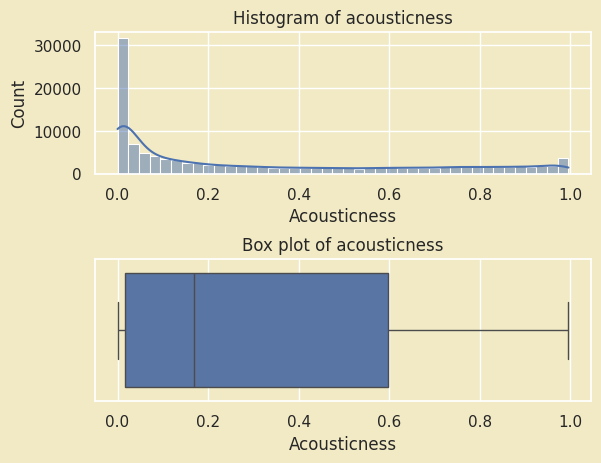

In [34]:
numeric_eda_plots(df, "acousticness", "Acousticness")

The mean value is 0.3149, showing a moderate degree of acoustic properties for the samples overall, while the standard deviation is 0.3325, revealing a considerable range of variation in acoustic properties between samples. The minimum value is 0, indicating that there are some samples composed entirely of electronic sounds, while the maximum value is 0.996, indicating that some samples are composed almost entirely of acoustic instruments or natural sounds. The quantile shows the distribution of the data, with the first quartile being 0.0169, the median being 0.169, and the third quartile being 0.598, which further highlights the central tendency of the acoustic properties, but also shows that there is Extreme non-acoustic or highly acoustic sample situations.

### Instrumentalness    

In [35]:
numeric_eda_summary(df, "instrumentalness")

count    114000.000000
mean          0.156050
std           0.309555
min           0.000000
25%           0.000000
50%           0.000042
75%           0.049000
max           1.000000
Name: instrumentalness, dtype: float64

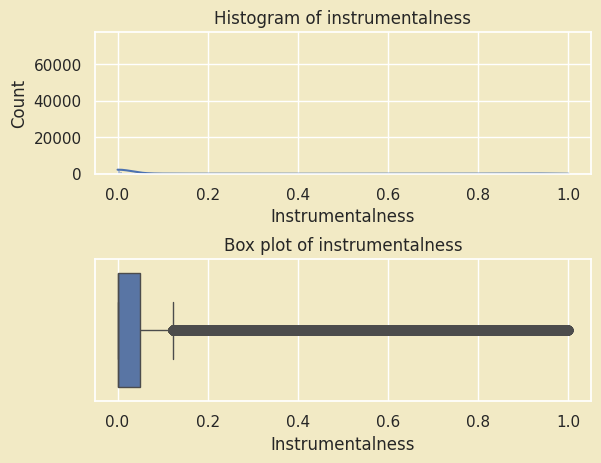

In [36]:
numeric_eda_plots(df, "instrumentalness", "Instrumentalness")

The average "instrumentalness" score is 0.156, which shows that the musical work as a whole has a certain instrumental component, but may also contain other non-instrumental elements. The standard deviation is 0.310, indicating that the distribution of instrumental music level is relatively wide, and there are some cases where some samples deviate greatly from the average level. There are samples with a minimum value of 0 in the data, indicating that some musical works contain no instrumental components at all, while the maximum value is 1, indicating that some samples are purely instrumental works without any vocals or lyrics. The 25%, 50% and 75% quantiles are 0, 0.000042 and 0.049 respectively. These quantiles reveal the concentration of instrumental music in most musical works. Taken together, the data show the prevalence of instrumental elements in musical works, but there are also works that gravitate towards the extremes of non-instrumental or purely instrumental.

### Liveness            

In [37]:
numeric_eda_summary(df, "liveness")

count    114000.000000
mean          0.213553
std           0.190378
min           0.000000
25%           0.098000
50%           0.132000
75%           0.273000
max           1.000000
Name: liveness, dtype: float64

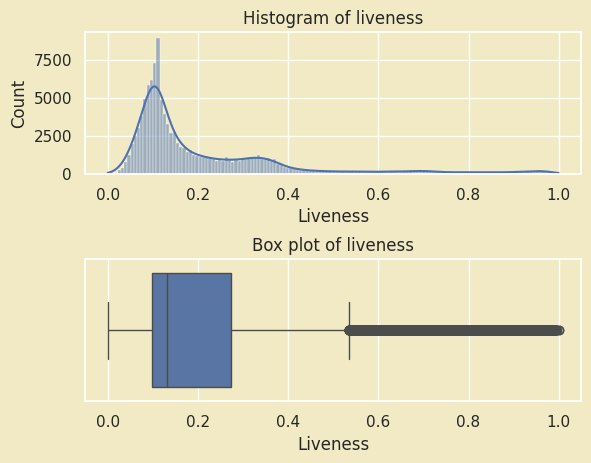

In [38]:
numeric_eda_plots(df, "liveness", "Liveness")

The average performance activity score is 0.2135, indicating that the overall performance activity of the sample is slightly lower, but the data is highly dispersed, with a standard deviation of 0.1904. There are cases where the lowest score is 0 and the highest score is 1. The quantile shows the overall distribution of scores. 25% of the samples have an activity score lower than 0.098, while 50% of the samples have an activity score lower than 0.132, and 75% of the samples have an activity score of less than 0.098. Below 0.273. These data show that although most samples are less active, there are also extreme cases where some samples are more active.

### Valence             

In [39]:
numeric_eda_summary(df, "valence")

count    114000.000000
mean          0.474068
std           0.259261
min           0.000000
25%           0.260000
50%           0.464000
75%           0.683000
max           0.995000
Name: valence, dtype: float64

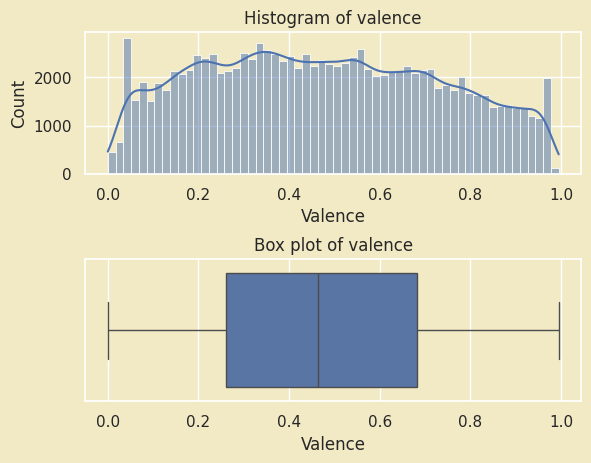

In [40]:
numeric_eda_plots(df, "valence", "Valence")

The mean (mean) of the data is 0.474 and the standard deviation (std) is 0.259, indicating a certain degree of variation and dispersion in the data distribution. The minimum value (min) is 0 and the maximum value (max) is 0.995, which means that the pleasantness score ranges from the lowest 0 to nearly the highest 1. The 25%, 50%, and 75% quantiles are 0.26, 0.464 respectively. and 0.683, these quantiles reveal the overall shape of the data distribution, showing that the pleasantness scores of most samples are clustered around the mid-range level.

Taken together, this set of data shows the distribution of music pleasantness scores. The pleasantness scores of most samples are concentrated at the medium level, but there are also some extreme values, such as samples with the highest score close to 1.

### Tempo               

In [41]:
numeric_eda_summary(df, "tempo")

count    114000.000000
mean        122.147837
std          29.978197
min           0.000000
25%          99.218750
50%         122.017000
75%         140.071000
max         243.372000
Name: tempo, dtype: float64

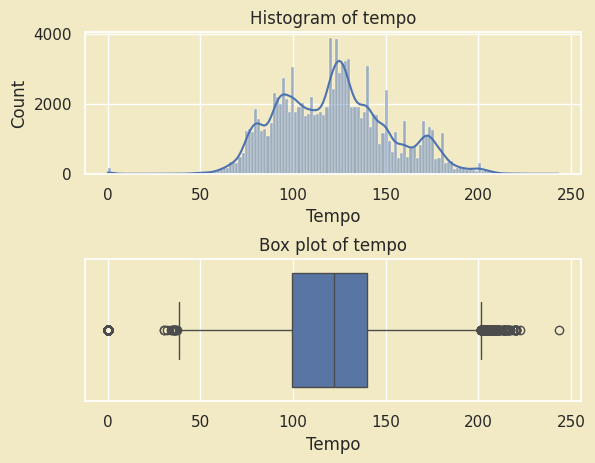

In [42]:
numeric_eda_plots(df, "tempo", "Tempo")

The mean (mean) is 122.15, indicating that the overall musical rhythm of this set of data is about 122 beats per minute.
The standard deviation (std) is 29.98, which indicates the degree of change in the rhythm, that is, the rhythm of most samples fluctuates around the average value, but there are also certain differences.
The minimum value (min) is 0, which may indicate some anomaly or a static audio file.
The maximum value (max) is 243.37, indicating that the highest rhythm reaches about 243 beats per minute, which is a relatively fast rhythm.
The 25%, 50% and 75% quantiles are 99.22, 122.02 and 140.07 respectively. These quantiles provide further insight into the distribution of the data, showing the median and distribution range of the rhythm values.
Taken together, this set of data reveals the overall characteristics of music rhythm. The rhythm of most samples is close to the average, but there are also some rhythm extremes, showing certain differences and diversity overall.

### Time Signature        

In [43]:
categorical_eda_summary(df, "time_signature")

Category   Count  Percentage of Total
0         4  101843                89.34
1         3    9195                 8.07
2         5    1826                 1.60
3         1     973                 0.85
4         0     163                 0.14

<ipython-input-10-b5bc5a901a29>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=dataframe, edgecolor="black", palette='viridis')


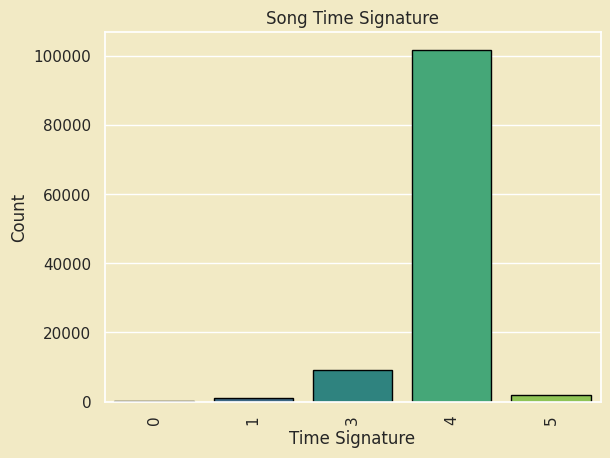

In [44]:
categorical_eda_plot(df, "time_signature", "Song Time Signature", "Time Signature", "Count")

Among these samples, the distribution of time signatures shows obvious dominant characteristics, with 89.34% of the tracks using a 4/4 (four-quarters) time signature, which is one of the most common time signatures in music. Generally considered stable and easy to follow. Next is the 3/4 (four-thirds) time signature, accounting for 8.07%, which is usually used for slower dance music or soft tunes. Signatures at other times are less commonly used, with 5/4 (four out of five) accounting for 1.60%, 1/4 (one fourth) accounting for 0.85%, and 0/4 (zero fourth) accounting for 0.14%. These rare time signatures may be used for specific types of music or creative styles, providing a certain reference for changes and innovations in music styles.

## Correlation Analysis

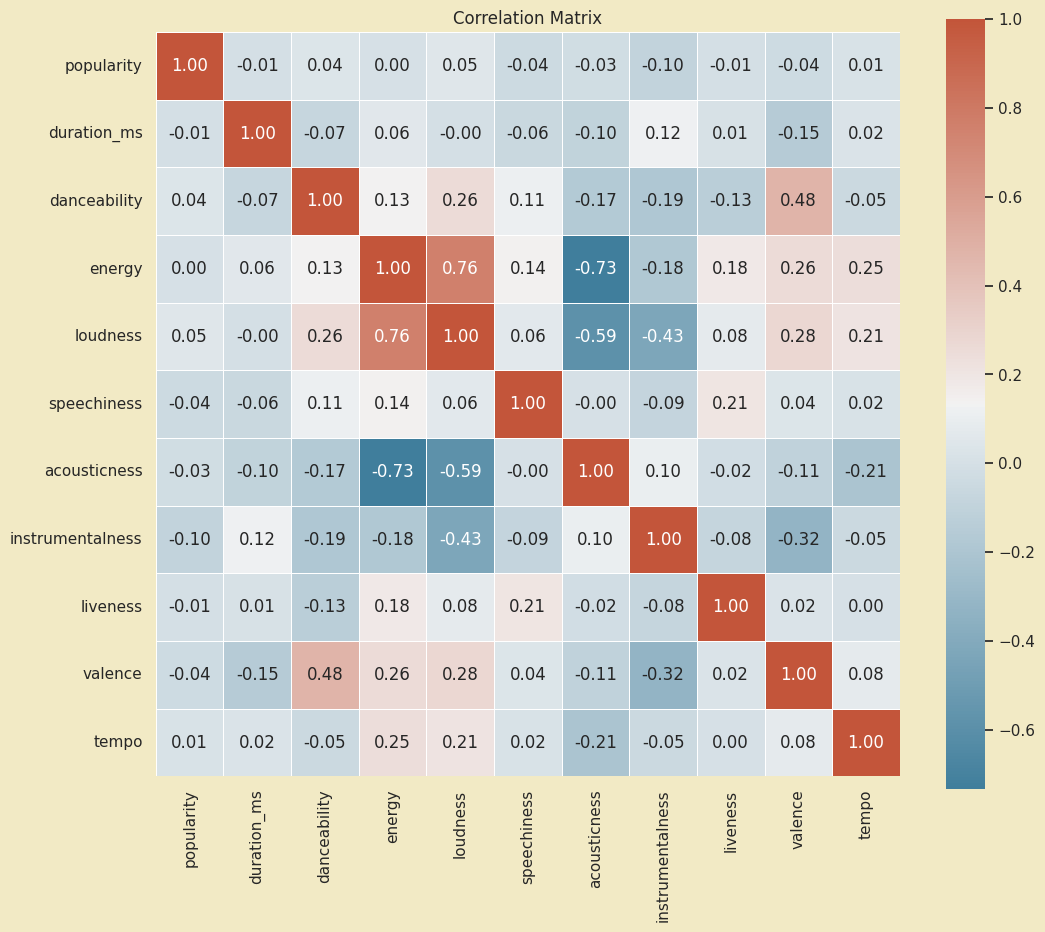

In [45]:
# Numeric Columns
numeric_cols = ["popularity","duration_ms","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]

# Build the numeric dataframe
numeric_df = df[numeric_cols]

# Create a larger figure
plt.figure(figsize=(12, 10))

# Plot title
plt.title("Correlation Matrix")

# Compute the correlation matrix
corr = numeric_df.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=.5, cmap=cmap, square = True)

# Display the plot
plt.show()

**Observations:**
<ol>
<li>Ignoring the Unnamed feature as it is just serial number column.</li>
<li>Dancebility has a weak positive correlation with loudness as dance tracks tend to be on the louder side. But this cannot be taken as  conclusive.</li>
<li>Dancebility has a positive correlation with valence. Songs that are danceable tend to have a more positive or happy feel.</li>
<li>Energy has a strong positive correlation with loudness. This tells us that the high-energy tracks tend to be louder.</li>
<li>Acousticness has a strong negative correlation with energy. This gives us an insight that the acoustic tracks tend to be calmer and softer.</li>
<li>Acousticness has a moderate negative correlation with loudness which means acoustic songs tend to be quieter</li>
<li>Songs with more instrumental elements tend to be less loud, possibly because they lack prominent vocals which can contribute to a song’s loudness.</li>
<li>Popularity does not show strong correlations with features like energy, danceability, or loudness, suggesting that a song's popularity is influenced by factors beyond its musical attributes.*</li>
<li>The mode does not significantly correlate with features like energy, valence, or danceability, indicating that whether a song is in a major or minor key does not strongly affect these characteristics.</li>
</ol>

# Data Preparation

## Data Cleaning

### Non-Sound based Genres

To focus on genre prediction based solely on sound characteristics, genres like 'British', 'French', 'German', etc will be excluded from the target variable before training the models. These classifications are based on origin or language, which aren't captured by the audio features in our dataset.

In [46]:
# Drop rows where the condition is True
non_sound_based_categories = ['british','french','german','swedish','spanish','indian','malay','turkish','world-music','gospel']
df = df.drop(df[df['track_genre'].isin(non_sound_based_categories)].index)

### Non-Explanatory Features

Several features will be excluded before training, as they don't directly reflect musical content: track_id, artist name, album name, and track name. These identifiers won't contribute to genre prediction based on audio characteristics

In [47]:
# Drop non explanatory features
df = df.drop(columns = ['track_id','artists','album_name','track_name'])

## Feature Engineering

### One-Hot Encoding and Binarization

To prepare categorical features for modeling, 'explicit' was converted to binary (0/1) for true/false values. Additionally, one-hot encoding was applied to 'key' and 'time_signature'. This creates separate binary columns for each unique value within those features, prefixed with 'key' and 'meter' respectively. Importantly, dropping the first dummy variable in each category addresses multicollinearity, which can negatively impact model performance.

In [48]:
# Map the explicit column to binary values
df['explicit'] = df['explicit'].map({False: 0,True: 1})

# Perform one-hot encoding
df = pd.get_dummies(df, columns=['key'], prefix = 'key', drop_first=True)
df = pd.get_dummies(df, columns=['time_signature'], prefix = 'meter', drop_first=True)

### Scaling

Numeric features within the dataset were standardized to ensure all features have a mean of 0 and a standard deviation of 1. This technique, known as standard scaling, helps prevent features with larger scales from dominating the modeling process and allows the models to learn more effectively from the combined features.

In [49]:
# Perform Scaling
df = perform_scaling(df, numeric_cols, 1)

## Genres Consolidation

The initial dataset contained a vast number of genres (114), with some exhibiting high similarity. To address this and create more manageable categories, we employed a genre reduction strategy. First, we constructed a new dataframe by calculating the average values of each music metric across all 114 genres. This essentially compressed the data into a single point per original genre, capturing the average characteristics of songs within that genre.

Next, we leveraged hierarchical clustering, a technique that iteratively groups similar data points together. Applied to our averaged genre data, hierarchical clustering identified 56 distinct clusters. These clusters represent groups of similar musical styles based on the features we possess.

Finally, to enhance interpretability and future analysis, we drew upon our understanding of music genres to assign meaningful names to each of the 56 newly formed clusters. This step involved examining the music metrics within each cluster and identifying characteristics that aligned with known genres or subgenres. By incorporating domain knowledge, we transformed the clusters into more user-friendly and informative categories that better reflect the musical landscape captured by the data.

### Hierarchical Clustering

Hierarchical clustering was performed to group similar genres.  First, average feature values were calculated for each genre (genres_average). Then, the sch.dendrogram function from SciPy visualized the clustering process. This creates a dendrogram plot, a tree-like structure where branches represent merged clusters based on their feature similarities (distances). Labels from the original genres_average dataframe are used for the x-axis. Examining the dendrogram helped us determine an appropriate number of clusters to cut the hierarchy into, creating the final set of reduced genres

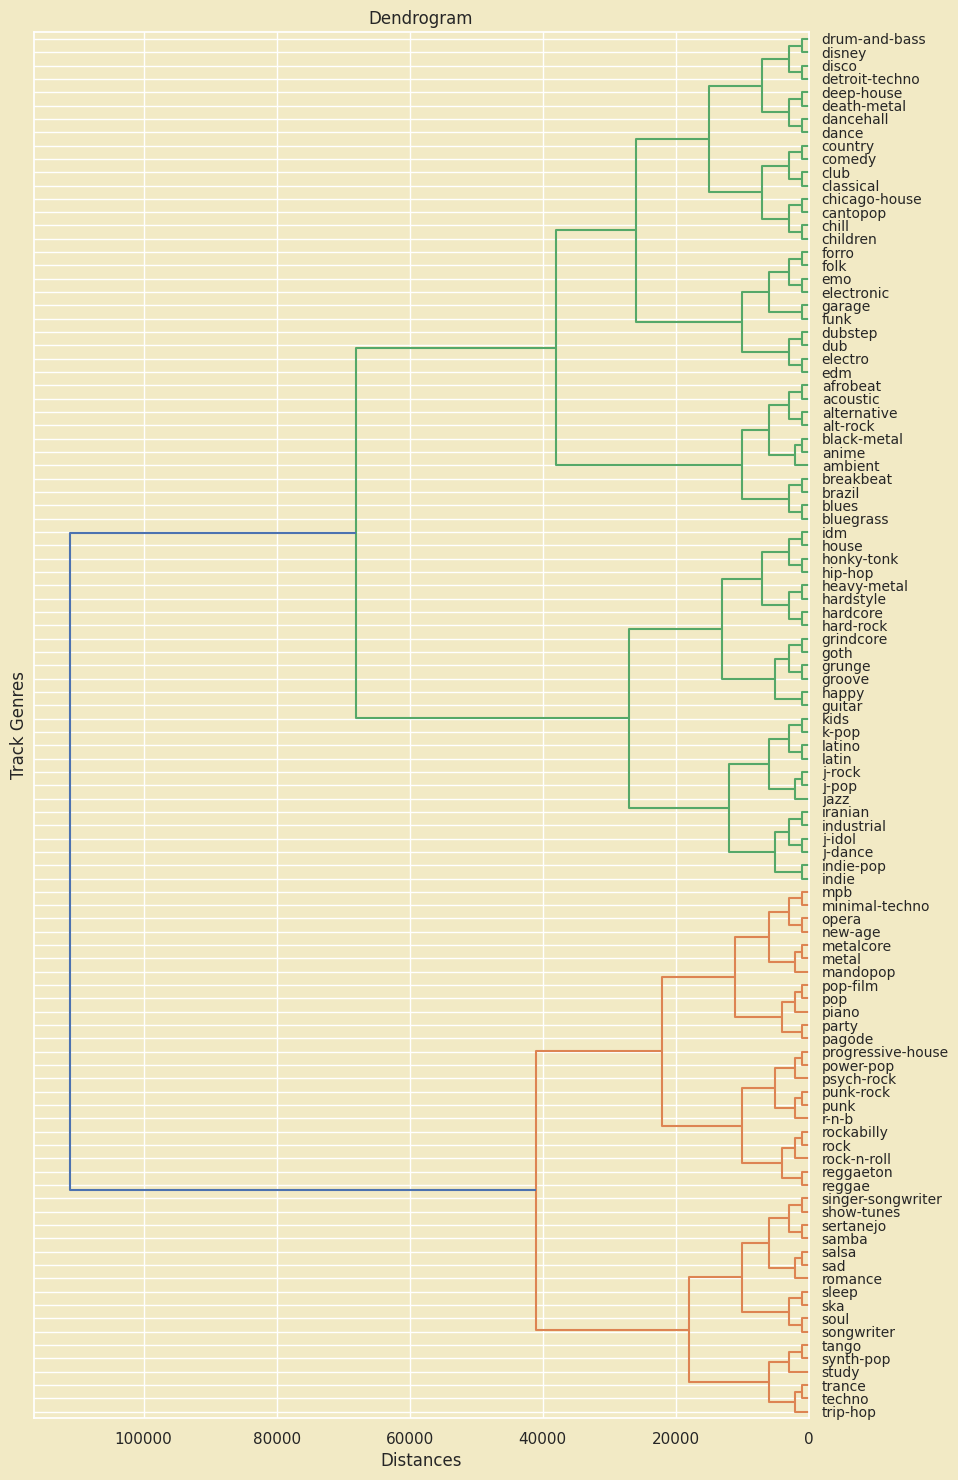

In [50]:
import scipy.cluster.hierarchy as sch

genres_average = df.groupby('track_genre').mean()

# Perform hierarchical clustering
plt.figure(figsize=(10, 18))
dendrogram = sch.dendrogram(sch.linkage(genres_average, method='complete'),
                            labels=genres_average.index,
                            orientation='left')

# Show the dendrogram
plt.title('Dendrogram')
plt.xlabel('Distances')
plt.ylabel('Track Genres')

# Increase the size of y-labels
plt.tick_params(axis='y', labelsize=10)

plt.savefig('dendrogram.png', bbox_inches='tight')

# Show the plot
plt.show()

### Threshold Selection

Leveraging the insights from the dendrogram, a distance threshold of 1 was chosen to cut the hierarchical clustering and create the final set of genres. The fcluster function assigned each genre in genres_average to a cluster based on similarity (using a distance threshold of 1). These cluster labels were added to the dataframe. A dictionary (cluster_dict) was built to explore cluster composition. It groups genres by their assigned cluster, providing a view of which original genres were merged into the 56 final clusters.

In [51]:
from scipy.cluster.hierarchy import fcluster

# Perform hierarchical clustering
linkage_matrix = sch.linkage(genres_average, method='complete')

# Specify the distance threshold
threshold = 1

# Extract the cluster labels based on the threshold
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

# Add cluster labels to the original DataFrame
genres_average['Cluster'] = clusters

# Set the maximum number of rows to display
pd.set_option('display.max_rows', 60)

# Create a dictionary to store classes and clusters
cluster_dict = {}
for i, (cluster, category) in enumerate(zip(clusters, genres_average.index)):
    if cluster not in cluster_dict:
        cluster_dict[cluster] = []
    cluster_dict[cluster].append(category)

ordered_cluster_dict = dict(sorted(cluster_dict.items()))

# Display the dictionary sorted by cluster
ordered_cluster_dict

{np.int32(1): ['techno'],
 np.int32(2): ['trance'],
 np.int32(3): ['trip-hop'],
 np.int32(4): ['synth-pop'],
 np.int32(5): ['tango'],
 np.int32(6): ['study'],
 np.int32(7): ['songwriter'],
 np.int32(8): ['soul'],
 np.int32(9): ['ska'],
 np.int32(10): ['sleep'],
 np.int32(11): ['sad'],
 np.int32(12): ['salsa'],
 np.int32(13): ['romance'],
 np.int32(14): ['samba'],
 np.int32(15): ['sertanejo'],
 np.int32(16): ['show-tunes'],
 np.int32(17): ['singer-songwriter'],
 np.int32(18): ['reggae'],
 np.int32(19): ['reggaeton'],
 np.int32(20): ['rock'],
 np.int32(21): ['rockabilly'],
 np.int32(22): ['rock-n-roll'],
 np.int32(23): ['punk'],
 np.int32(24): ['punk-rock'],
 np.int32(25): ['r-n-b'],
 np.int32(26): ['power-pop'],
 np.int32(27): ['progressive-house'],
 np.int32(28): ['psych-rock'],
 np.int32(29): ['pagode'],
 np.int32(30): ['party'],
 np.int32(31): ['pop'],
 np.int32(32): ['pop-film'],
 np.int32(33): ['piano'],
 np.int32(34): ['metal'],
 np.int32(35): ['metalcore'],
 np.int32(36): ['mando

### Genres Grouping

After applying hierarchical clustering and identifying 56 distinct clusters, we employed our domain knowledge of music genres to assign meaningful names to these newly formed groups. By analyzing the musical characteristics (tempo, danceability, etc.) within each cluster, we were able to identify patterns that aligned with known genres or subgenres. This process transformed the numerical cluster labels (1, 2, 3, etc.) into descriptive names that better reflect the musical styles grouped within each cluster.  Leveraging this domain knowledge enhances interpretability and facilitates future analysis of the music data.

In [52]:
# Threshold 1 - 56 clusters

consolidated_genres = {'agressive-fusion': ['dubstep', 'grunge', 'metal'],
                       'industrial': ['goth', 'heavy-metal', 'industrial'],
                       'punk-rock': ['alt-rock', 'garage', 'hard-rock', 'j-rock', 'punk', 'punk-rock'],
                       'hardstyle': ['happy', 'hardstyle'],
                       'disco-ska': ['disco', 'ska', 'synth-pop'],
                       'rock': ['alternative', 'rock'],
                       'anime': ['anime', 'club'],
                       'edm-house': ['deep-house', 'electronic', 'progressive-house'],
                       'edm': ['dub', 'edm', 'electro', 'groove', 'house'],
                       'j-dance': ['dancehall', 'j-dance'],
                       'funk-hip-hop': ['funk', 'hip-hop'],
                       'latin': ['dance', 'latin', 'latino', 'reggae', 'reggaeton'],
                       'pop': ['k-pop', 'pop', 'pop-film'],
                       'brazilian': ['brazil', 'mpb'],
                       'blues-rnb': ['blues', 'j-pop', 'r-n-b'],
                       'indie': ['folk', 'indie', 'indie-pop', 'psych-rock'],
                       'chill': ['chill', 'sad'],
                       'pagode-samba': ['pagode', 'samba', 'sertanejo'],
                       'country-soul': ['country', 'soul'],
                       'rock-n-roll': ['rock-n-roll', 'rockabilly'],
                       'chicago-house': ['chicago-house', 'detroit-techno'],
                       'jazz-tango': ['honky-tonk', 'jazz', 'tango'],
                       'vocal-pop': ['acoustic', 'cantopop', 'mandopop', 'singer-songwriter', 'songwriter'],
                       'disney': ['disney', 'guitar'],
                       'soundscape': ['ambient', 'new-age']}

# Create a dictionary to map old genres to new genres
genre_map = {old_genre: new_genre for new_genre, old_genres in consolidated_genres.items() for old_genre in old_genres}

# Replace the old genres with the new genres
df['track_genre'] = df['track_genre'].replace(genre_map)

# Save the dataframe for prepped data review
df_pdr = df

# Prepared Data Review

## Bivariate EDA

In [53]:
df_pdr_groupby = df_pdr.groupby('track_genre').mean()
df_pdr_groupby_percentage = df_pdr_groupby * 100

### Percentage of explicit songs by Genre


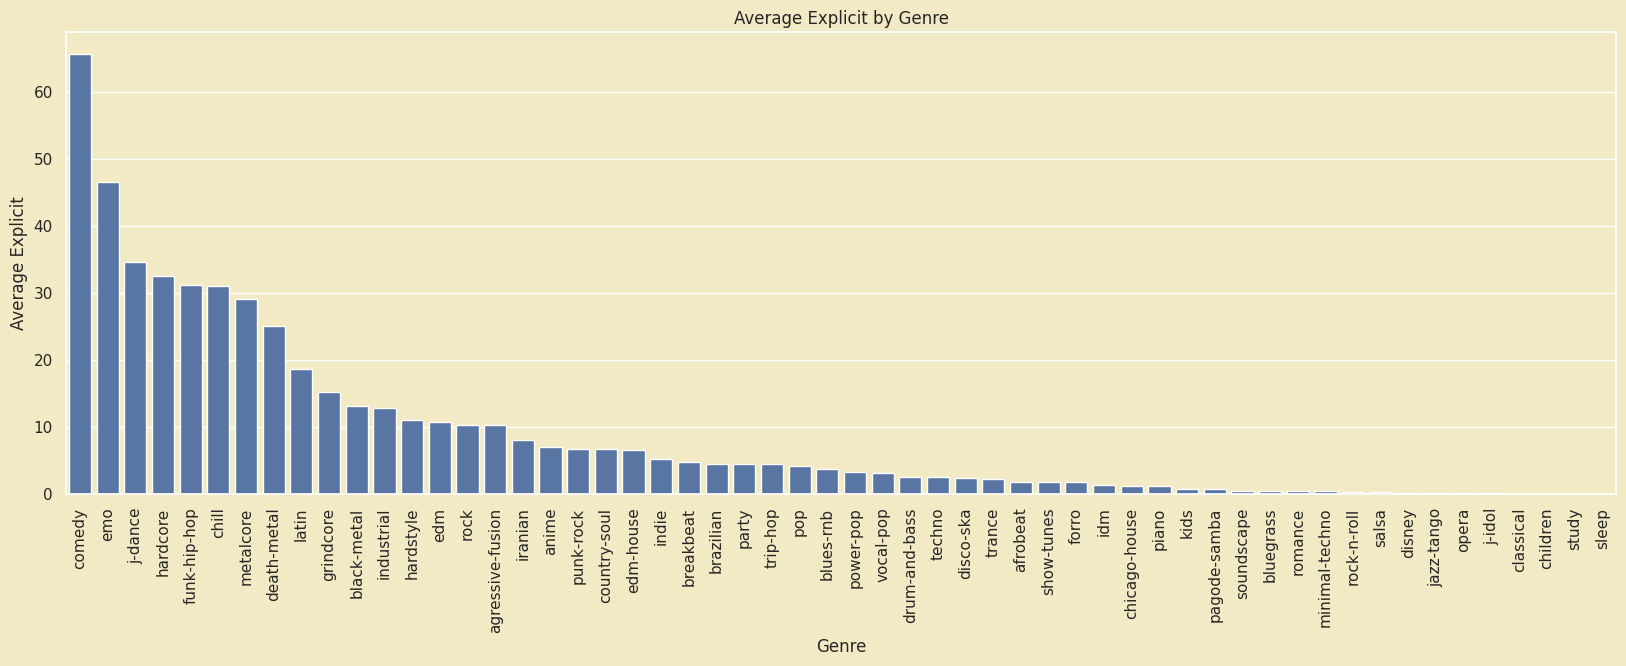

In [54]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'explicit', 'Average Explicit by Genre')

As it shown, the top 5 of the average explicit of genre is comedy,emo,j-dance, hardcore and funk-hip-hop. The bottom 5 is children, classical, study, sleep and opera. The top 5 genres with the highest average explicitness tend to encompass music genres known for their candid expression and edgy content, such as comedy, emo, and hip-hop variations, while the bottom 5 genres, like children's music and classical compositions, typically avoid explicit themes to maintain their intended audience or artistic tradition.

### Percentage of songs in major scale by Genre


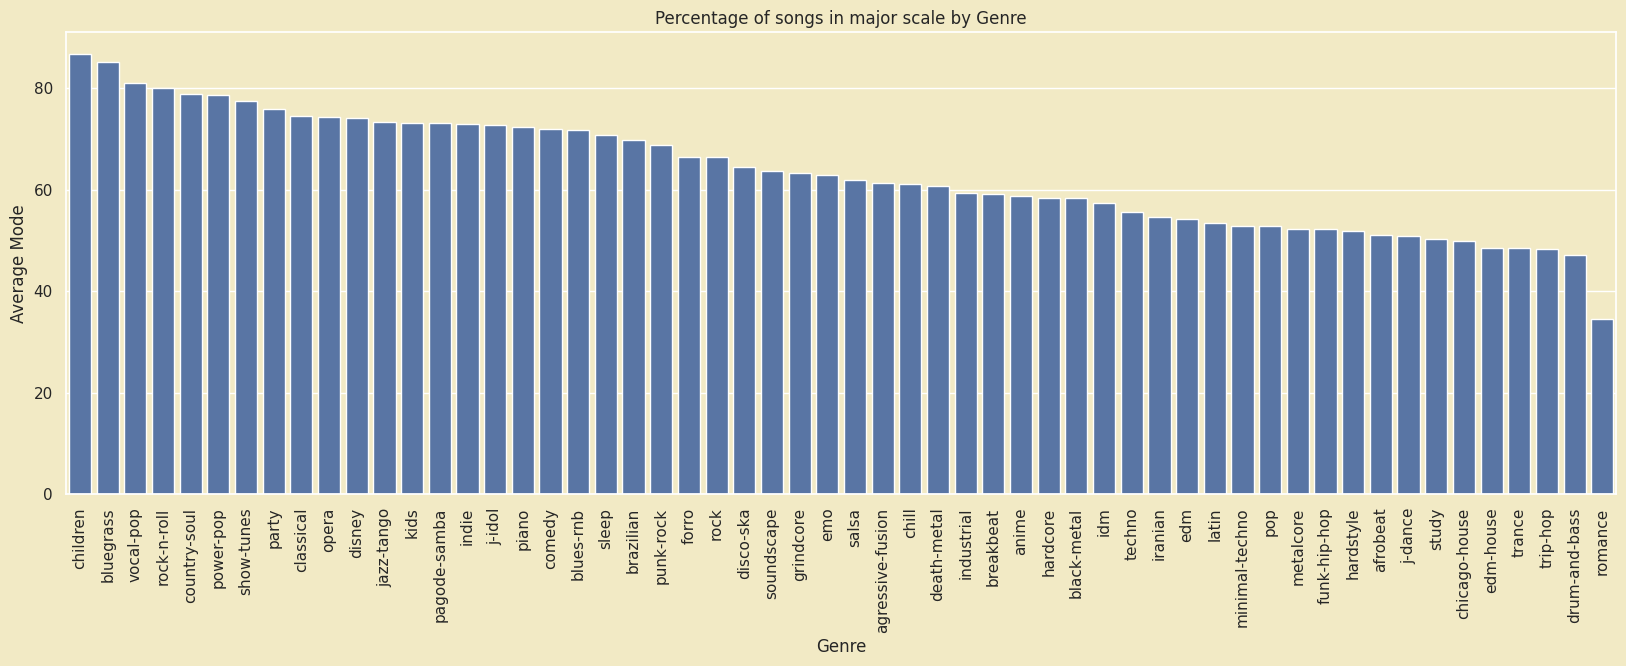

In [55]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'mode', 'Percentage of songs in major scale by Genre')

As it shown, The top 5 genres with the highest average mode include children, bluegrass, vocal-pop, rock-n-roll, and country-soul. These genres often feature distinct musical characteristics or themes that are well-defined and consistent within each track, leading to a higher average mode value.

On the other hand, the bottom 5 genres with the lowest average mode, comprising romance, drum-and-bass, trip-pop, trance, and edm-house, may exhibit greater variation or diversity in their musical elements, resulting in lower mode values across tracks within each genre.

### Percentage of songs in C pitch by Genre


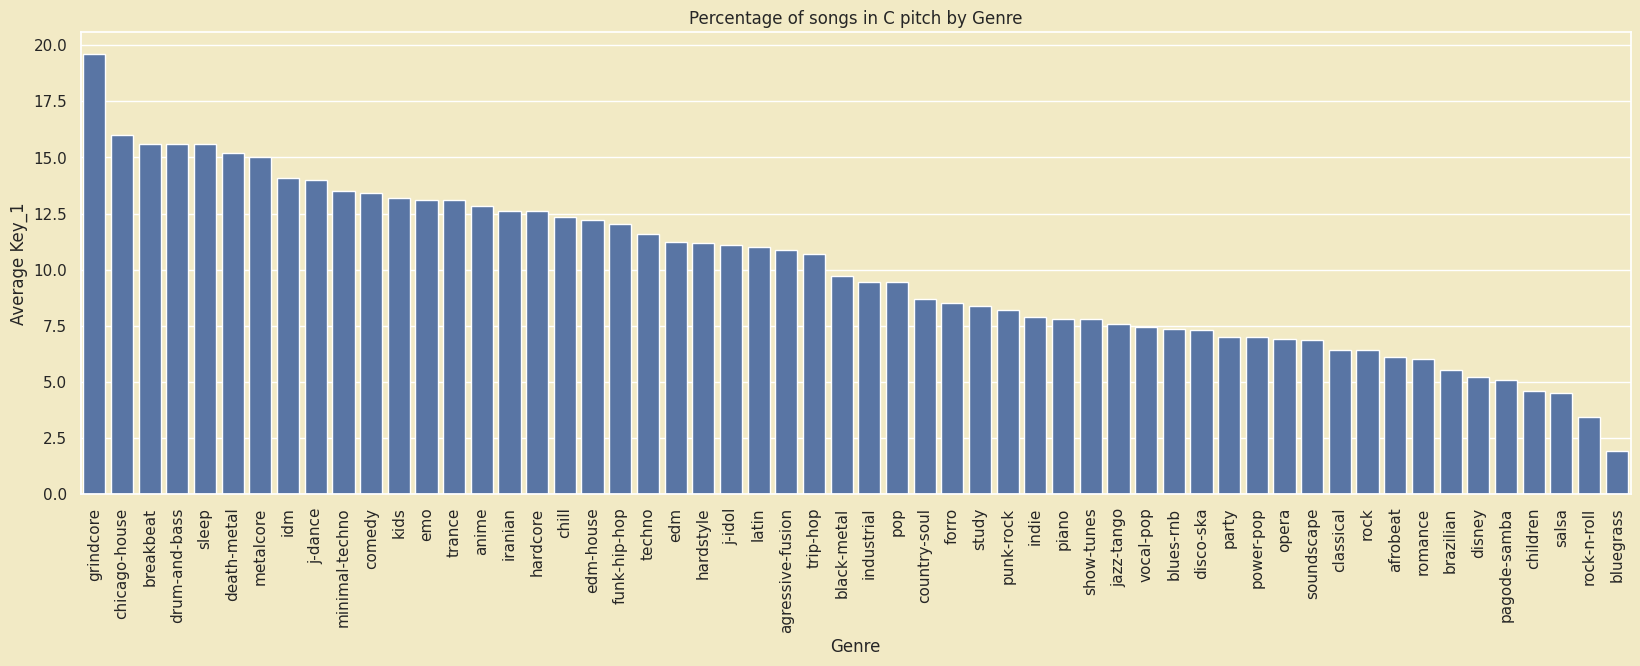

In [56]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'key_1', 'Percentage of songs in C pitch by Genre')

As it shown, the top 5 genres with the highest average "key_1" values likely feature music compositions characterized by distinct tonal centers or keys, such as grindcore, Chicago house, breakbeat, sleep, and drum-and-bass. On the other hand, the bottom 5 genres with the lowest average "key_1" values may predominantly consist of music genres less reliant on specific tonal structures, like bluegrass, rock-n-roll, salsa, children's music, and pagoda samba.

### Percentage of songs in D pitch by Genre


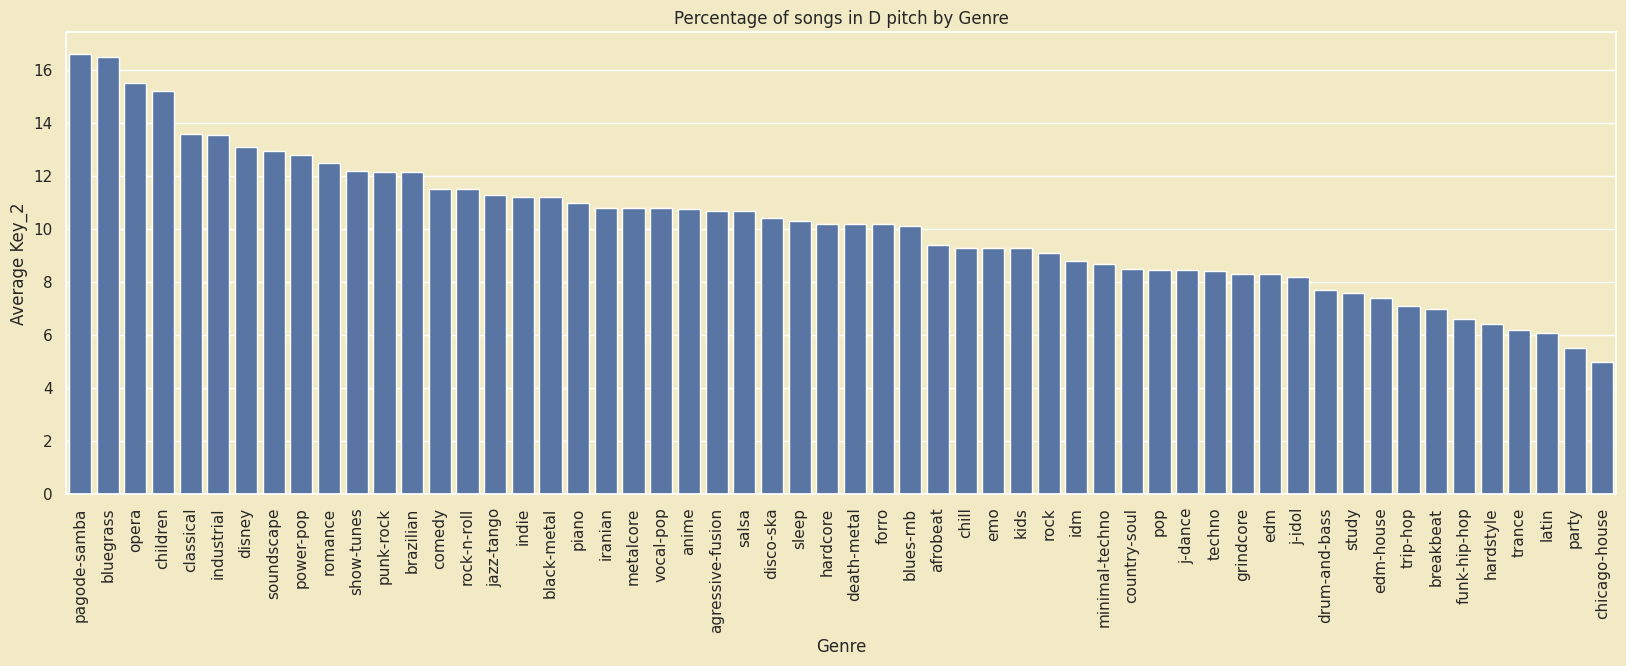

In [57]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'key_2', 'Percentage of songs in D pitch by Genre')

As it shown, the top 5 of average key 2 by genre are pagode-samba, bluegrass, opera,children and classical, the bottom 5 are chicago-house,party,latin,trance and hardstyle. The top 5 genres with the highest average value of key 2 include pagode-samba, bluegrass, opera, children, and classical. Conversely, the bottom 5 genres with the lowest average value of key 2 are chicago-house, party, latin, trance, and hardstyle. This indicates that genres like pagode-samba, bluegrass, opera, children, and classical tend to exhibit more prominent musical features associated with key 2, while chicago-house, party, latin, trance, and hardstyle genres demonstrate less emphasis on this particular musical attribute.

### Percentage of songs in D# pitch by Genre


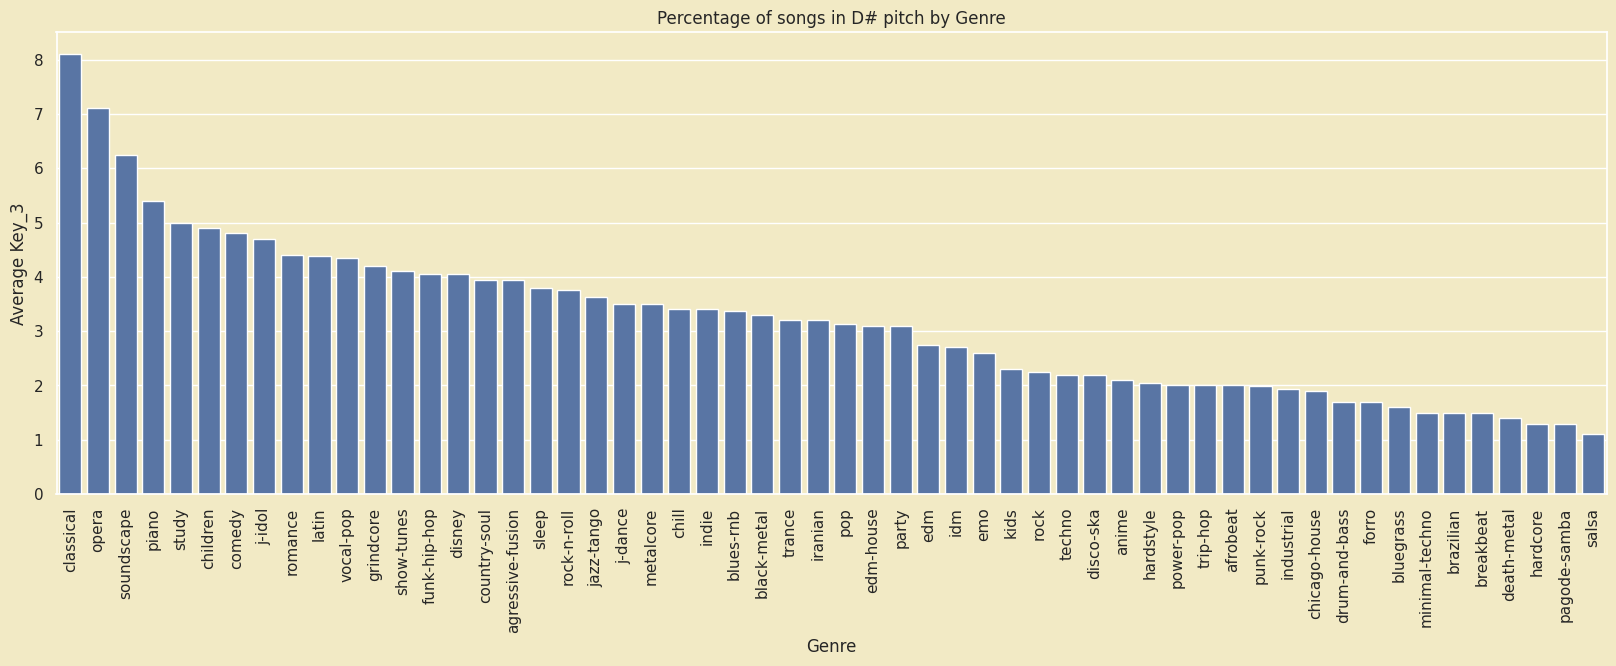

In [58]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'key_3', 'Percentage of songs in D# pitch by Genre')

The top 5 genres with the highest average Key 3 values (presumably representing a musical feature) by genre include classical, opera, soundscape, piano, and study. These genres are characterized by their emphasis on melodic complexity, harmonic richness, and subdued rhythms, which likely contribute to higher Key 3 scores. Conversely, the bottom 5 genres, including salsa, hardcore, pagode-samba, death-metal, and Brazilian music, may feature more rhythmic complexity, percussive elements, and aggressive tonalities, leading to lower Key 3 averages.

### Percentage of songs in E pitch by Genre


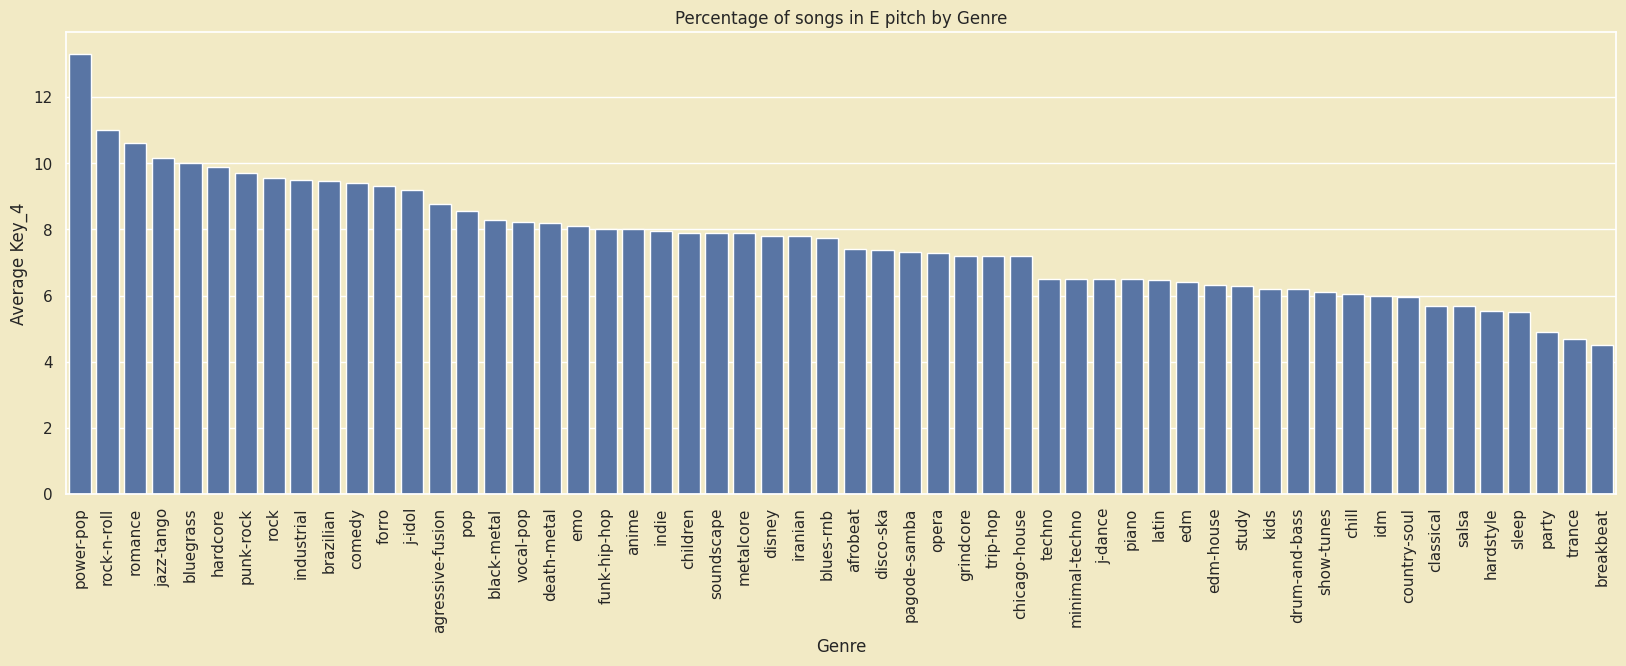

In [59]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'key_4', 'Percentage of songs in E pitch by Genre')

The top 5 genres in terms of the average of key 4  by genre tend to encompass music styles that emphasize certain tonal qualities or harmonic structures, such as power-pop, rock-n-roll, romance, jazz-tango, and bluegrass. On the other hand, the bottom 5 genres, including breakbeat, trance, party, sleep, and hardstyle, likely feature compositions where key 4 plays a less prominent role or exhibits less variation in its musical characteristics.

### Percentage of songs in F pitch by Genre


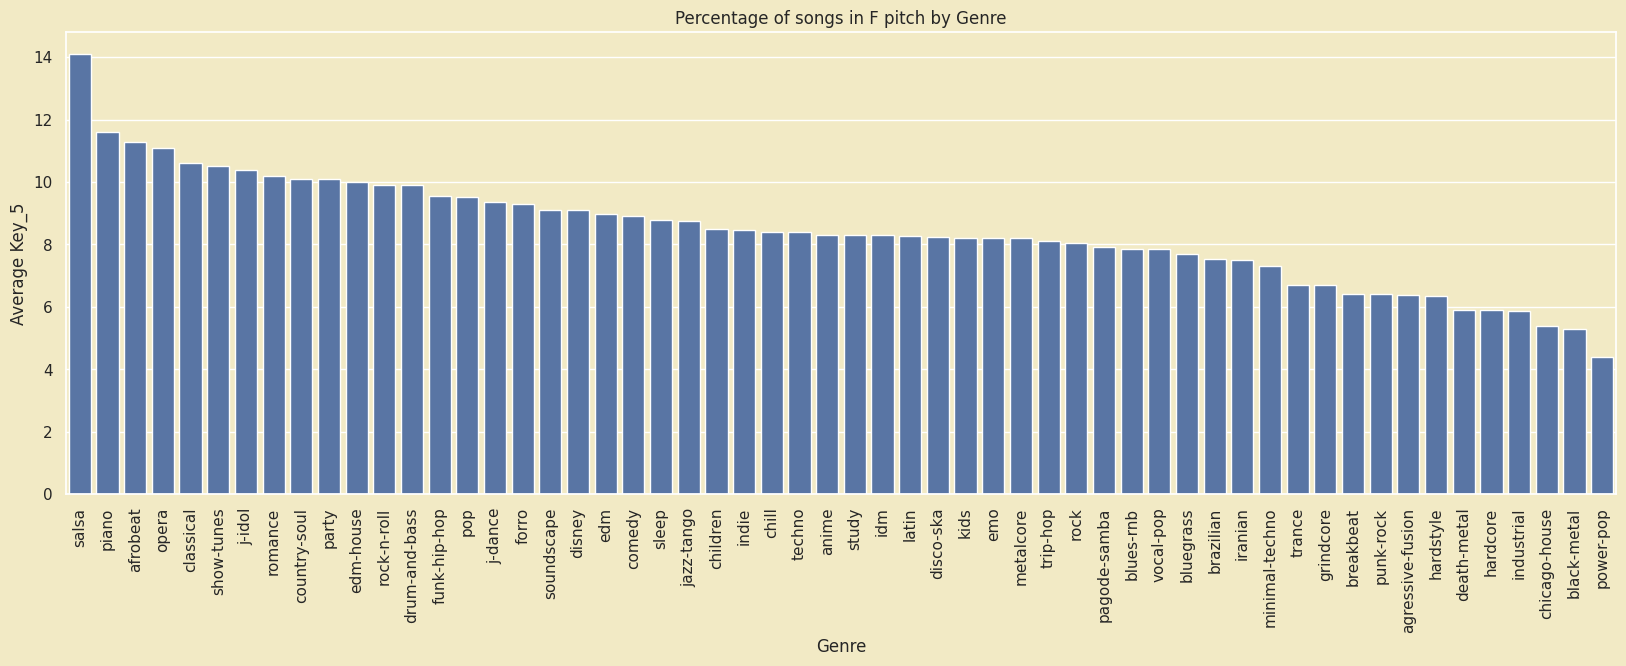

In [60]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'key_5', 'Percentage of songs in F pitch by Genre')

The top 5 genres in terms of the average value of key 5 (which likely represents a musical attribute) by genre are salsa, piano, afrobeat, opera, and classical. These genres may feature compositions with rich harmonic structures and diverse tonalities, leading to higher values for key 5. On the other hand, the bottom 5 genres, including power-pop, black-metal, Chicago-house, industrial, and death-metal, may prioritize other musical elements or characteristic sounds, resulting in lower values for key 5.

### Percentage of songs in F# pitch by Genre


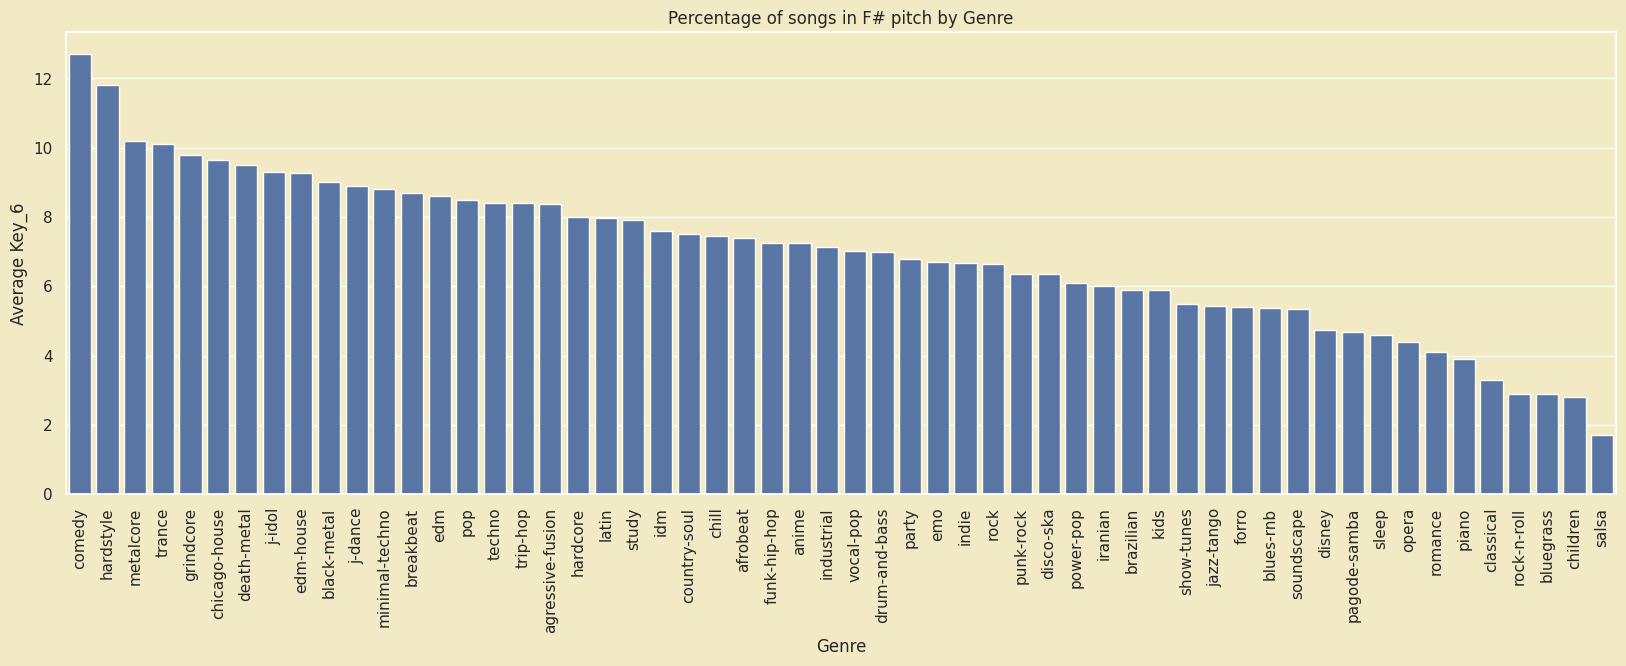

In [61]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'key_6', 'Percentage of songs in F# pitch by Genre')

The top 5 genres with the highest average value of "key_6" tend to be associated with more intense or energetic music styles like comedy, hardstyle, metalcore, trance, and grindcore. On the other hand, the bottom 5 genres with the lowest average "key_6" values include genres like salsa, children's music, bluegrass, rock-n-roll, and classical, which typically feature mellower or less aggressive musical characteristics.

### Percentage of songs in G pitch by Genre


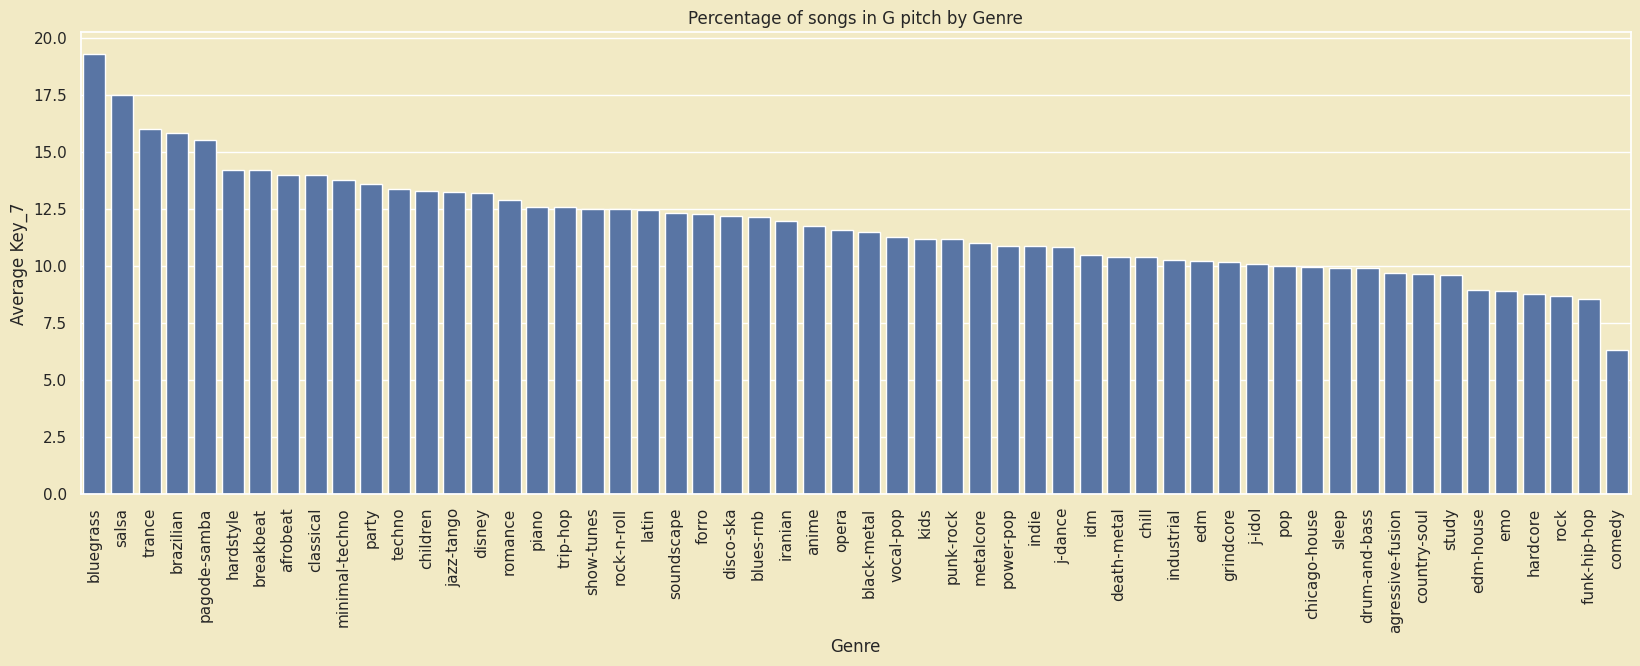

In [62]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'key_7', 'Percentage of songs in G pitch by Genre')


The top 5 genres with the highest average Key 7 values, including bluegrass, salsa, trance, Brazilian, and pagode-samba, suggest a musical inclination towards tonalities characterized by specific harmonic structures or emotional expressions. Conversely, the bottom 5 genres, such as comedy funk-hip-pop, rock, hardcore, and emo, exhibit comparatively lower average Key 7 values, possibly indicating a preference for musical styles with different tonal characteristics or harmonic complexities.

### Percentage of songs in G# pitch by Genre


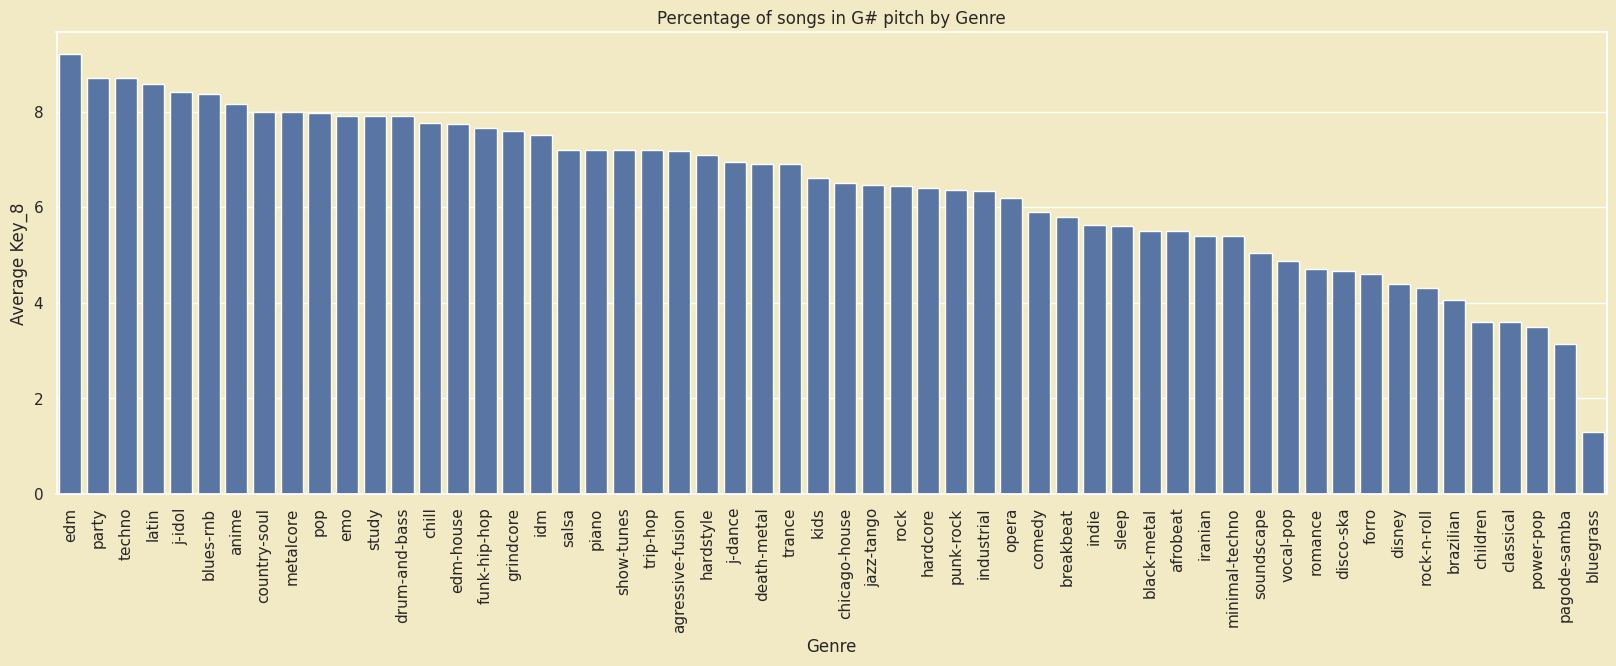

In [63]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'key_8', 'Percentage of songs in G# pitch by Genre')

The top 5 genres with the highest average key 8 tend to be EDM, techno, party, Latin, and J-idol, likely reflecting a preference for high-energy and danceable music styles where key changes, such as key 8, are more common. Conversely, the bottom 5 genres, including bluegrass, pagode-samba, power-pop, children, and classical, are typically characterized by more traditional or subdued musical styles, where key changes like key 8 may be less prevalent.

### Percentage of songs in A pitch by Genre


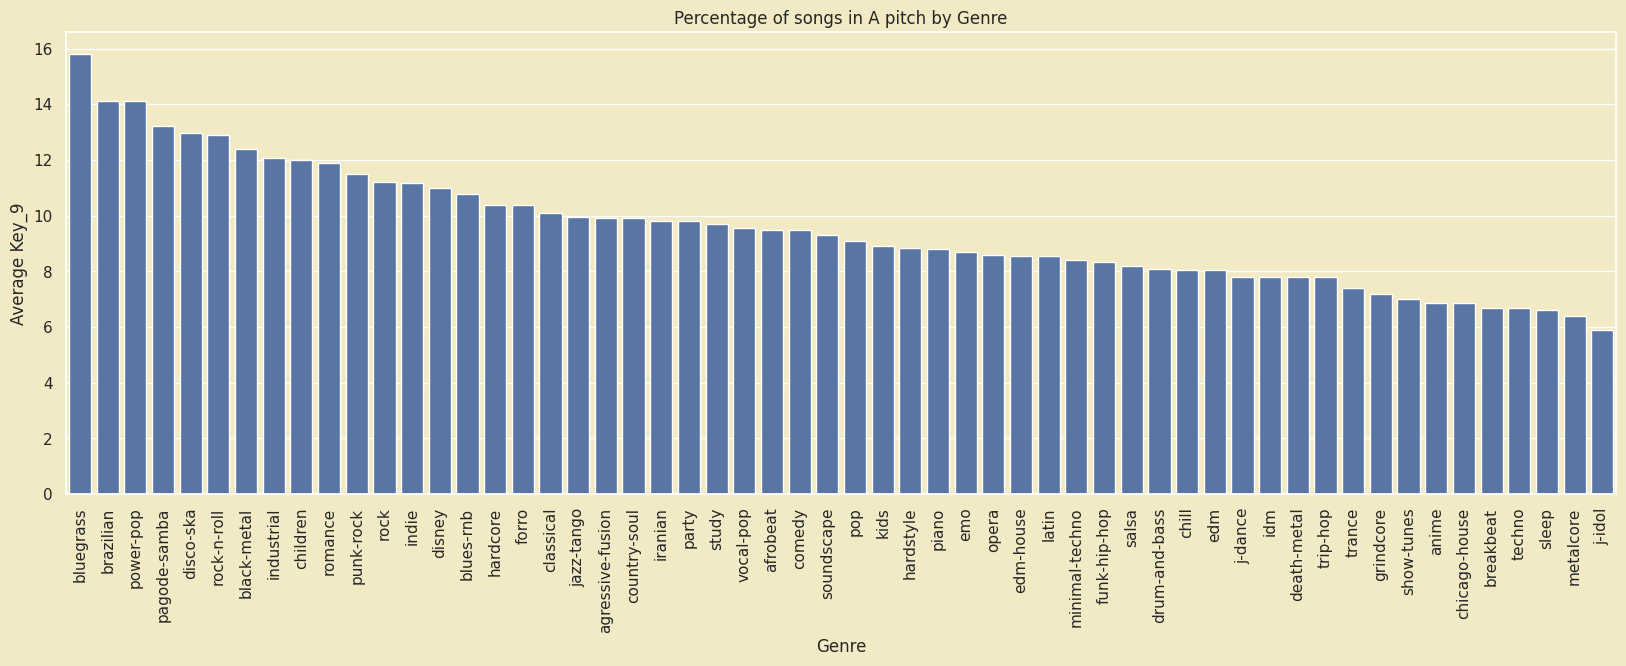

In [64]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'key_9', 'Percentage of songs in A pitch by Genre')


The top 5 genres with the highest average Key 9 values, including Bluegrass, Power-Pop, Brazilian, Pagode-Samba, and Disco-Ska, suggest a preference for musical styles characterized by certain tonalities or chord progressions. Conversely, the bottom 5 genres, featuring J-Idol, Metalcore, Sleep, Techno, and Breakbeat, exhibit lower average Key 9 values, indicating different tonal characteristics or harmonic structures within these genres.

### Percentage of songs in A# pitch by Genre


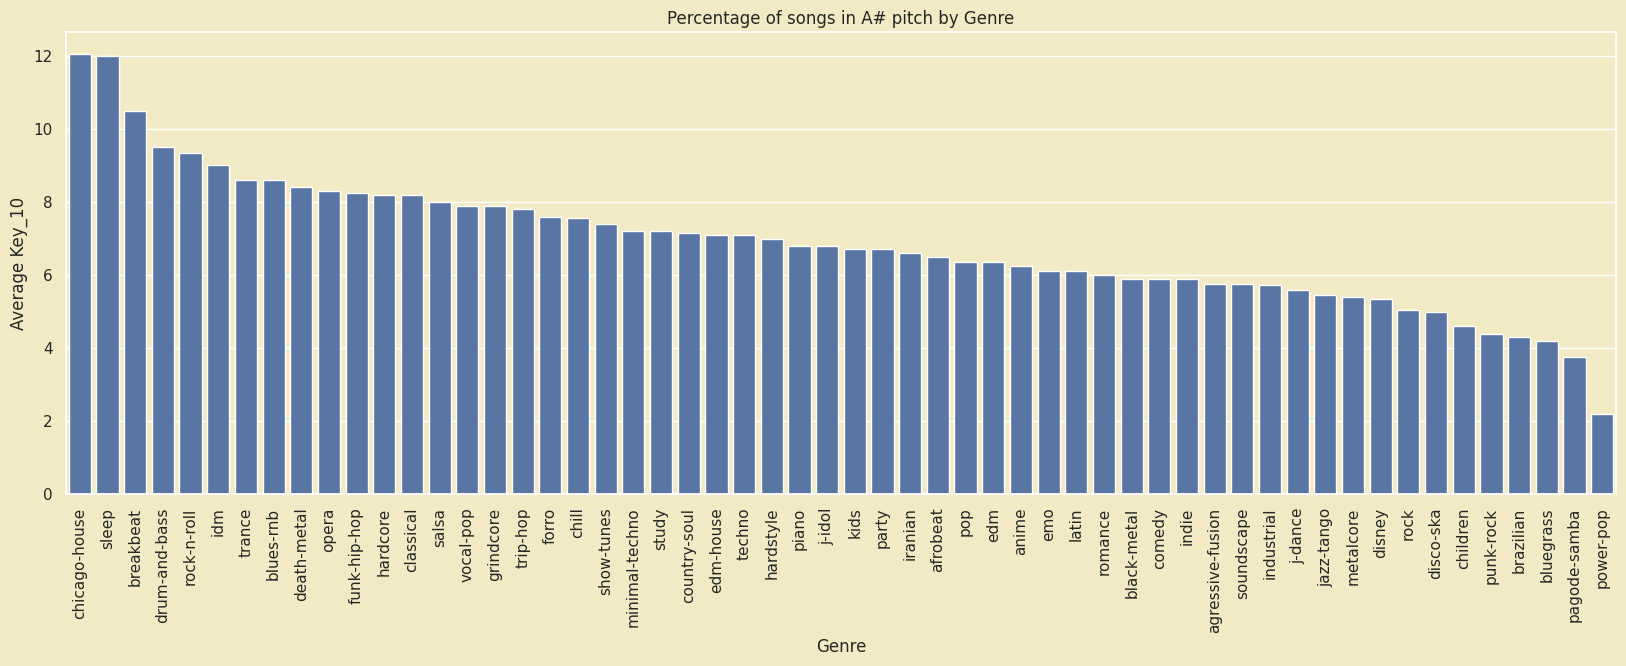

In [65]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'key_10', 'Percentage of songs in A# pitch by Genre')


The top 5 genres with the highest average key 10 values, including Chicago-house, sleep, breakbeat, drum-n-roll, and IDM, suggest a tendency towards more complex harmonic structures or tonalities within these genres. Conversely, the bottom 5 genres, such as power-pop, pagode-samba, bluegrass, Brazilian, and punk-rock, exhibit lower average key 10 values, indicating a preference for simpler or more traditional harmonic arrangements in their musical compositions.

### Percentage of songs in B pitch by Genre


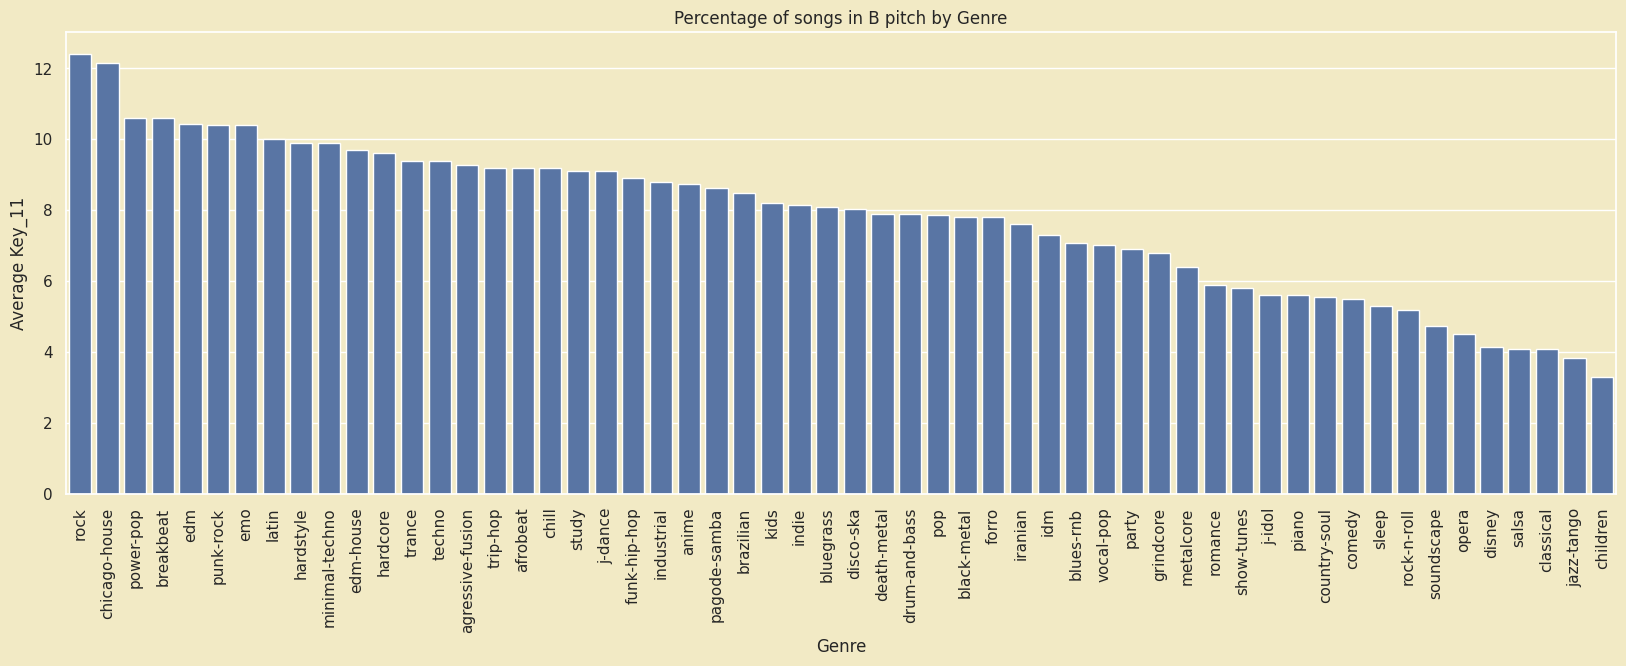

In [66]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'key_11', 'Percentage of songs in B pitch by Genre')


The top 5 genres with the highest average key 11 tend to be associated with energetic and upbeat music styles like rock, Chicago house, breakbeat, power pop, and EDM, where key modulation and variation are common. Conversely, the bottom 5 genres, such as children's music, jazz-tango, salsa, classical, and Disney music, typically feature more stable and traditional harmonic structures, leading to lower average key 11 values.

### Percentage of songs with a time signature of 1/4 by Genre


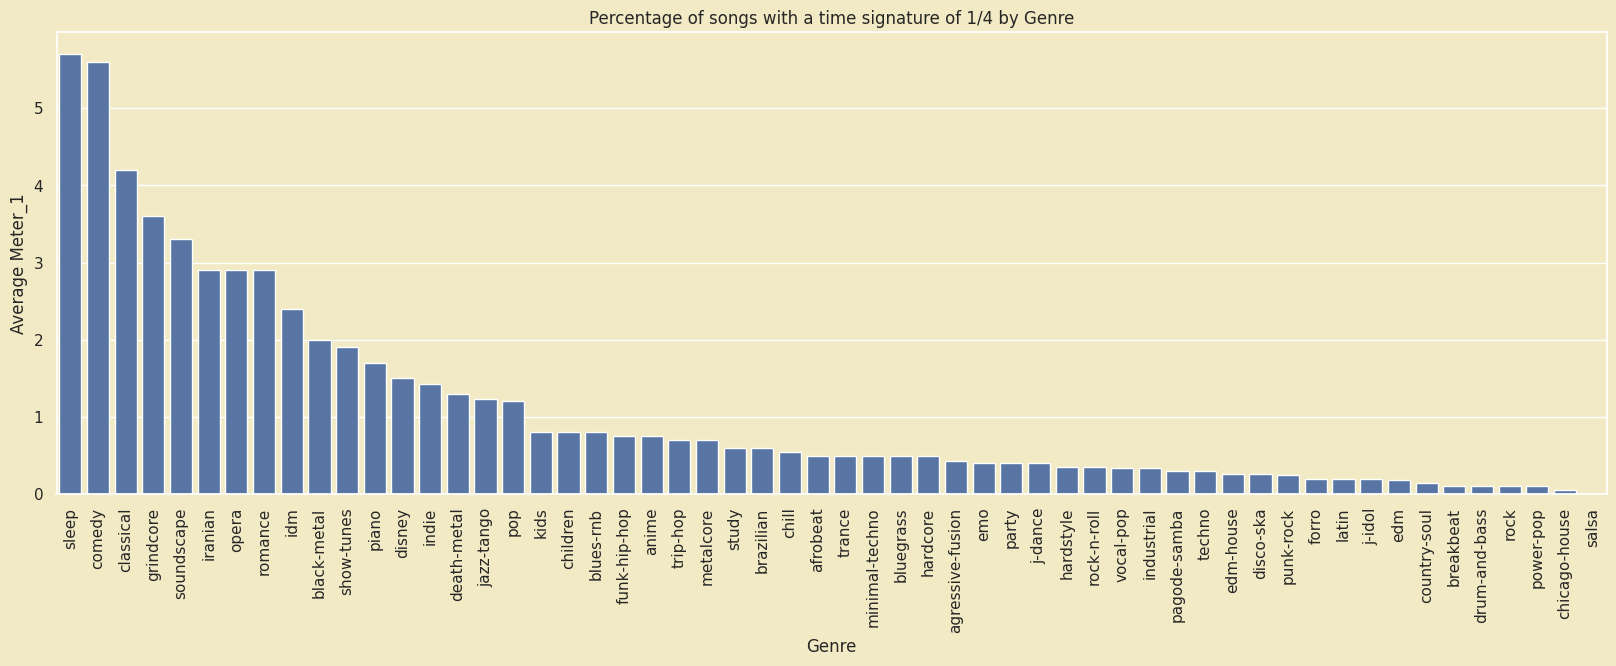

In [67]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'meter_1', 'Percentage of songs with a time signature of 1/4 by Genre')

The top 5 genres with the highest average meter 1 tend to be associated with relaxation or slower-paced music, such as sleep music, comedy, and classical music. On the other hand, the bottom 5 genres with the lowest average meter 1 include more upbeat and energetic styles like salsa, Chicago house, and drum-and-bass, which typically feature faster rhythms and higher tempos.

### Percentage of songs with a time signature of 3/4 by Genre


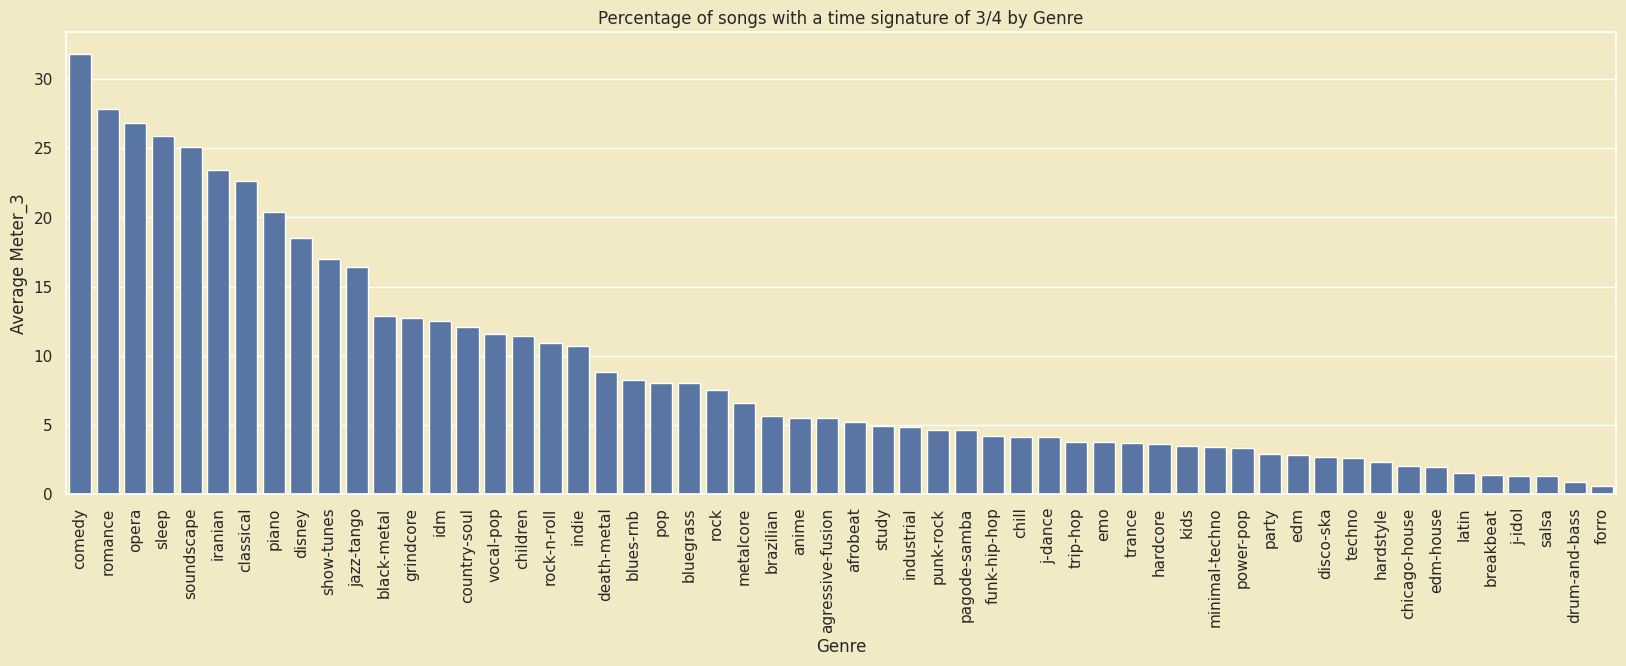

In [68]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'meter_3', 'Percentage of songs with a time signature of 3/4 by Genre')

The top 5 genres with the highest average meter 3 tend to encompass music styles associated with emotional depth and narrative complexity, such as comedy, romance, opera, sleep, and soundscape. Conversely, the bottom 5 genres with the lowest average meter 3 scores typically include high-energy and rhythmically-driven music genres like forro, drum-and-bass, j-idol, salsa, and breakbeat.

### Percentage of songs with a time signature of 4/4 by Genre


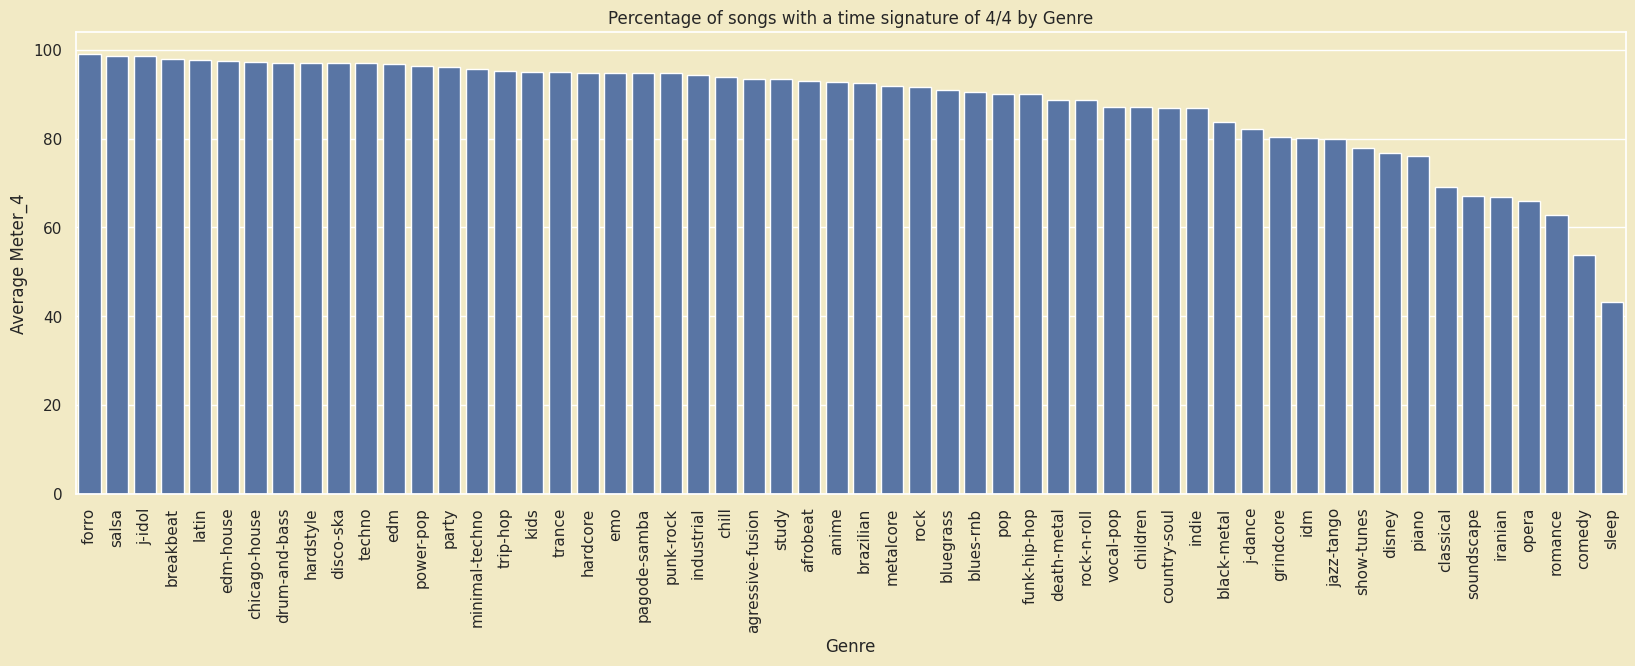

In [69]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'meter_4', 'Percentage of songs with a time signature of 4/4 by Genre')


The top 5 genres with the highest average meter 4 tend to be associated with lively and energetic music styles like forro, salsa, and breakbeat, which often feature rhythmic patterns and tempos conducive to dancing and movement. On the other hand, genres like sleep and comedy, which aim to promote relaxation and amusement respectively, as well as romance, opera, and Iranian music, which may prioritize melodic and emotional expressions, tend to have lower average meter 4 scores, reflecting slower tempos and less rhythmic complexity.

### Percentage of songs with a time signature of 5/4 by Genre


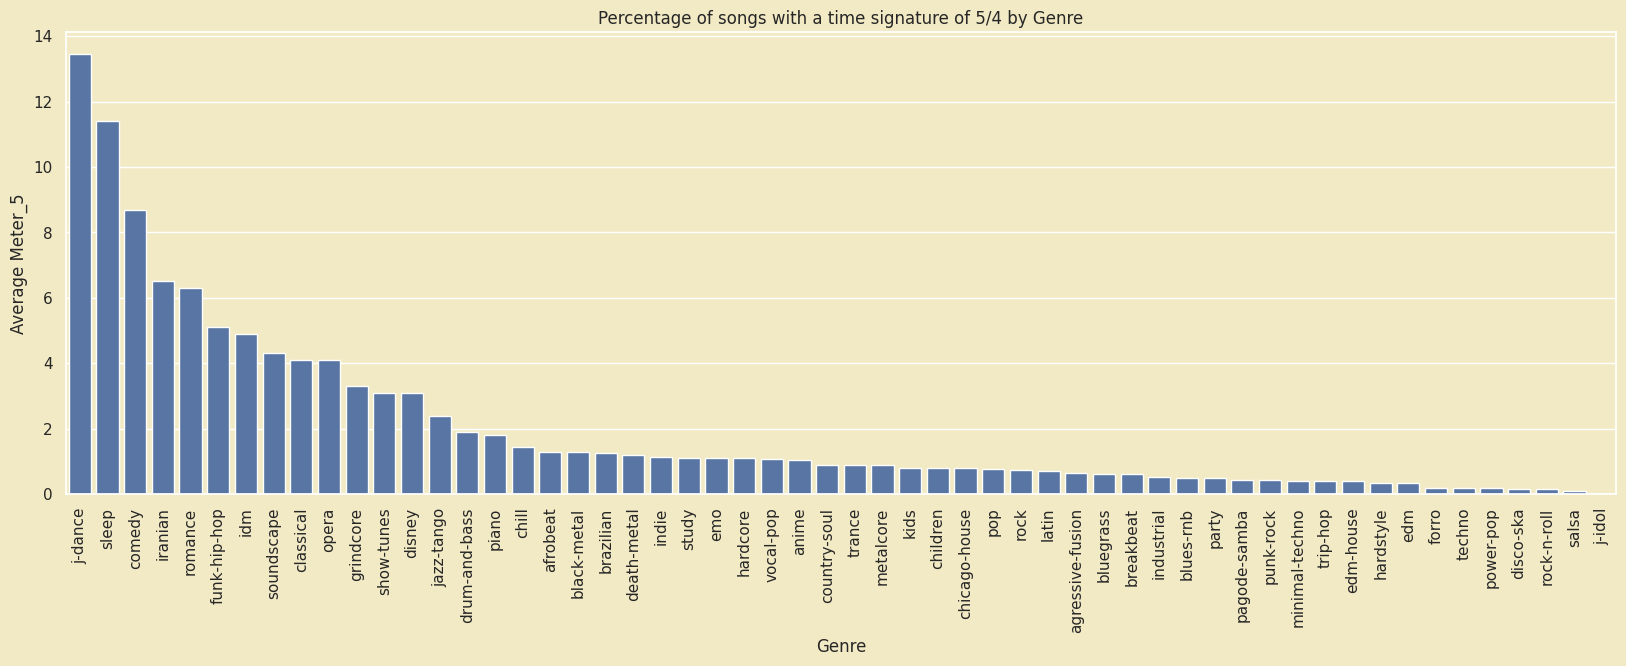

In [70]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'meter_5', 'Percentage of songs with a time signature of 5/4 by Genre')



The top 5 genres with the highest average meter 5 are j-dance, sleep, comedy, Iranian, and romance. These genres likely exhibit higher levels of rhythmic complexity or energy in their music compositions. Conversely, the bottom 5 genres, including j-idol, salsa, rock-n-roll, disco-ska, and techno, may feature simpler rhythmic patterns or lower levels of energy in their musical arrangements.

### Average Popularity VS Genre


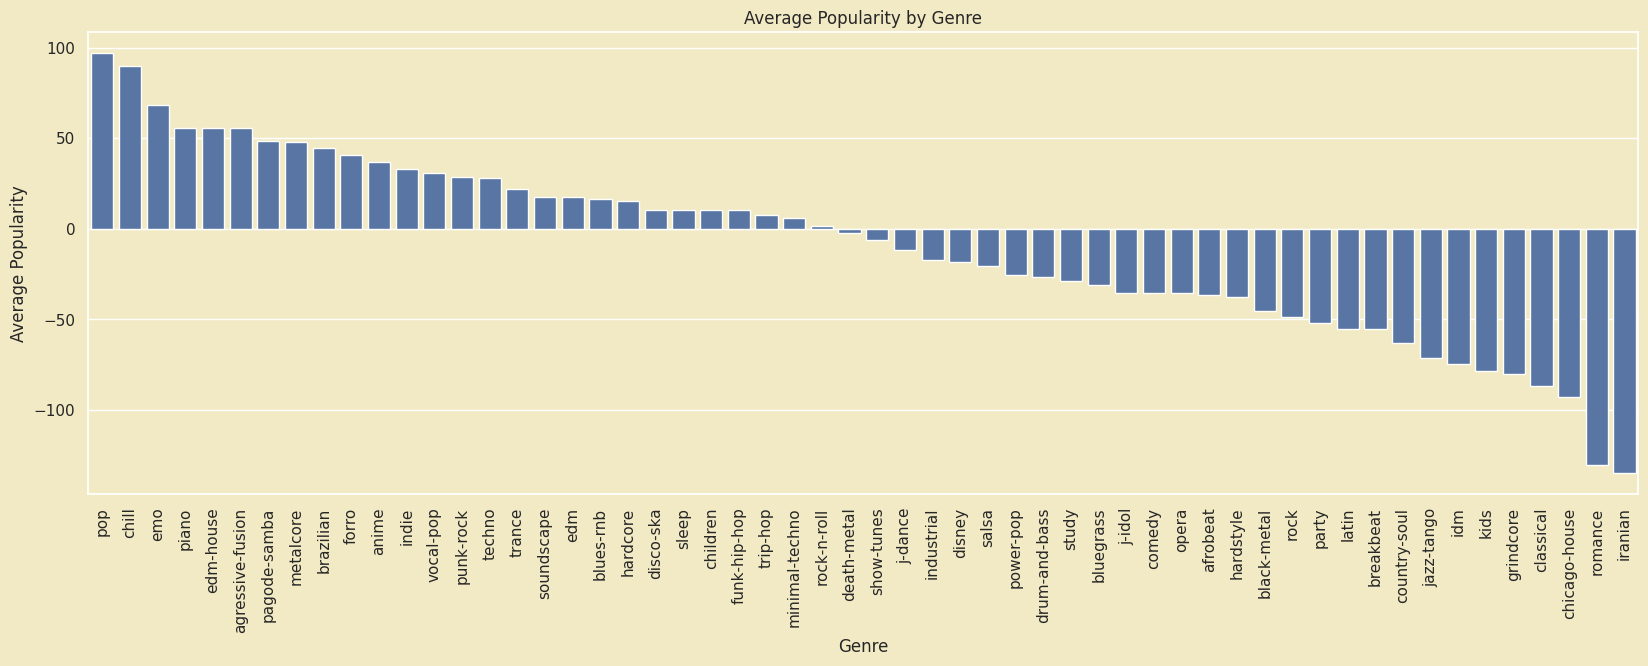

In [71]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'popularity', 'Average Popularity by Genre')


The top 5 genres with the highest average popularity tend to be mainstream and widely appealing, such as pop, chill, and EDM-house, which often dominate music charts and receive extensive airplay. Genres like emo and piano may attract dedicated fan bases or evoke strong emotions, contributing to their popularity. In contrast, the bottom 5 genres, including Iranian, romance, and classical, may have narrower audiences or less mainstream appeal, while genres like grindcore may be more niche and less accessible to broader audiences, resulting in lower average popularity scores.

### Average Track Length VS Genre


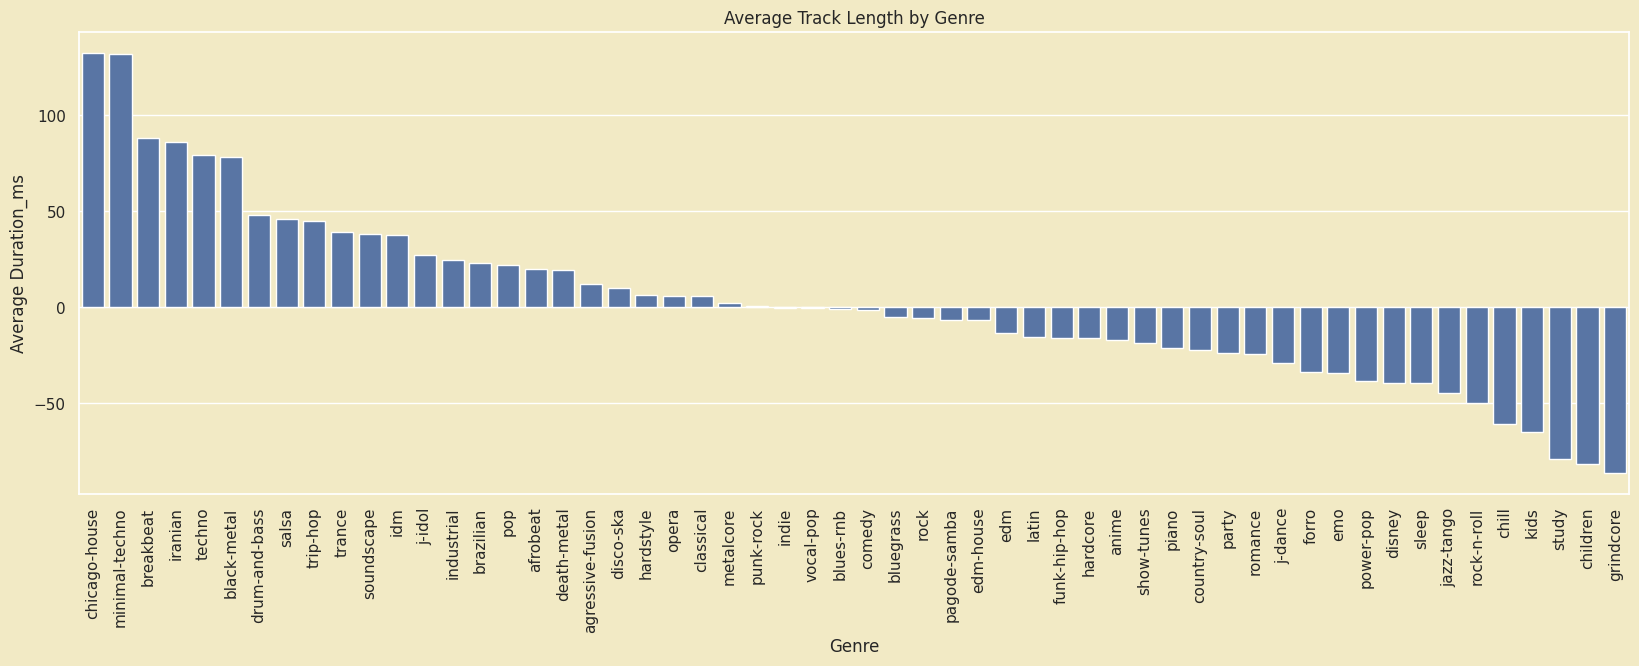

In [72]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'duration_ms', 'Average Track Length by Genre')


The top 5 genres with the highest average track length (duration_ms) are typically associated with electronic and experimental music styles like Chicago house, minimal techno, breakbeat, Iranian music, and techno, which often feature extended compositions and complex arrangements. In contrast, the bottom 5 genres with the shortest average track length include grindcore, children's music, study music, kids' music, and chill music, where shorter durations may be more common due to the nature of the genre or the intended audience.

### Average Danceability VS Genre


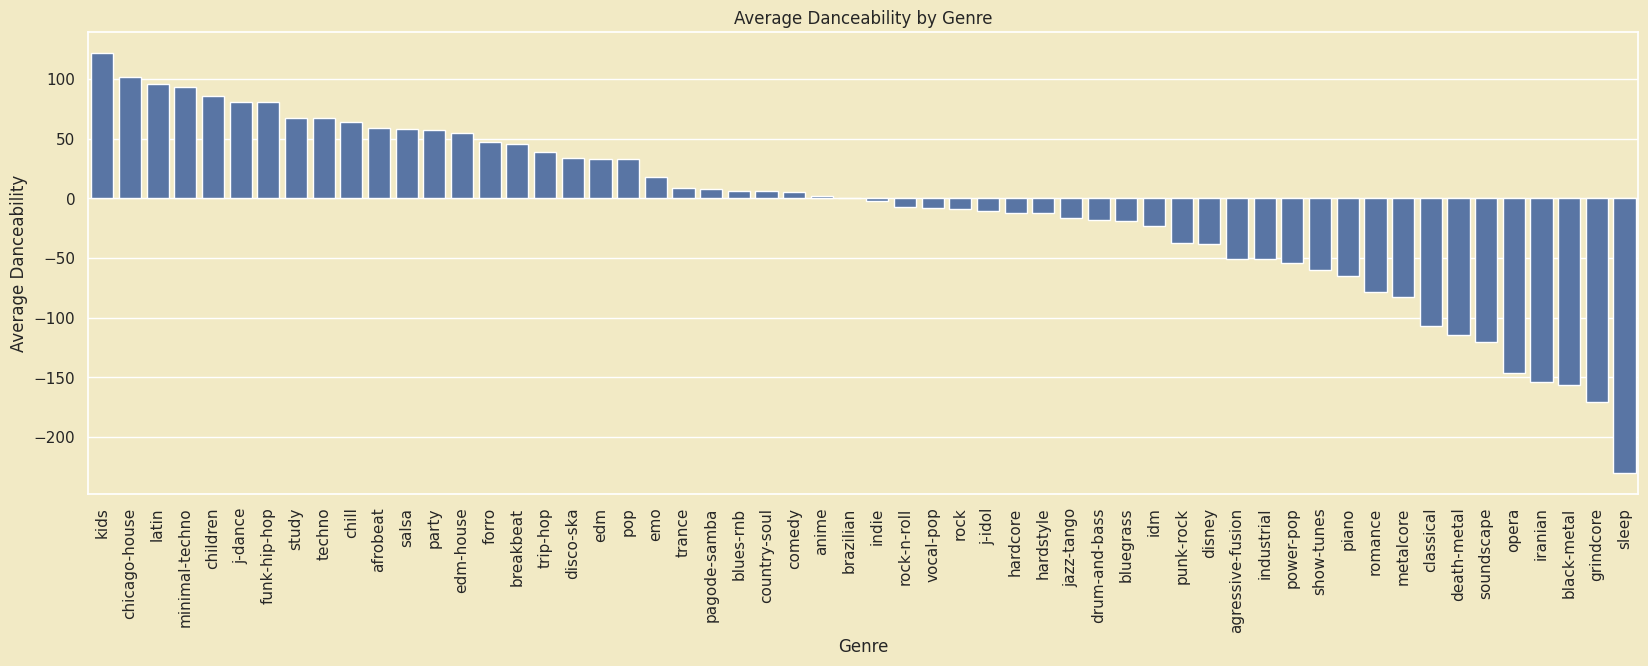

In [73]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'danceability', 'Average Danceability by Genre')


The top 5 genres with the highest average danceability include kids, chicago-house, latin, minimal-techno, and children, suggesting that these genres typically feature music with upbeat rhythms and tempos conducive to dancing. On the other hand, genres like sleep, grindcore, black-metal, Iranian, and opera have the lowest average danceability, indicating that their musical styles may not prioritize dance-friendly characteristics, such as energetic beats or grooves.

### Average Energy VS Genre


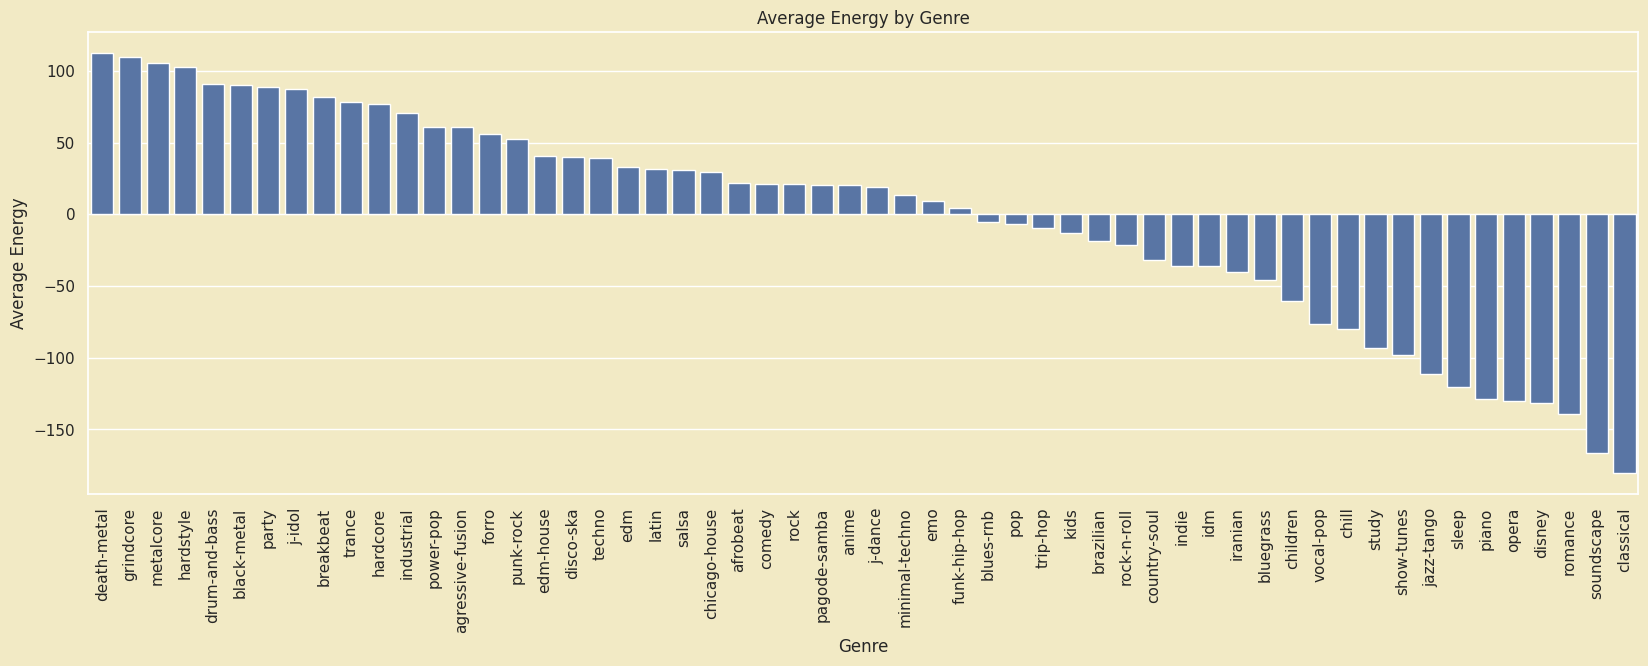

In [74]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'energy', 'Average Energy by Genre')

The top 5 genres with the highest average energy tend to be associated with intense and high-energy music styles like death metal, grindcore, metalcore, hardstyle, and drum-and-bass. These genres often feature fast tempos, aggressive instrumentation, and powerful vocals, contributing to their high energy levels. On the other hand, the bottom 5 genres, including classical, soundscape, romance, Disney, and opera, typically feature slower tempos, softer melodies, and more serene atmospheres, resulting in lower average energy levels.

### Average Loudness VS Genre


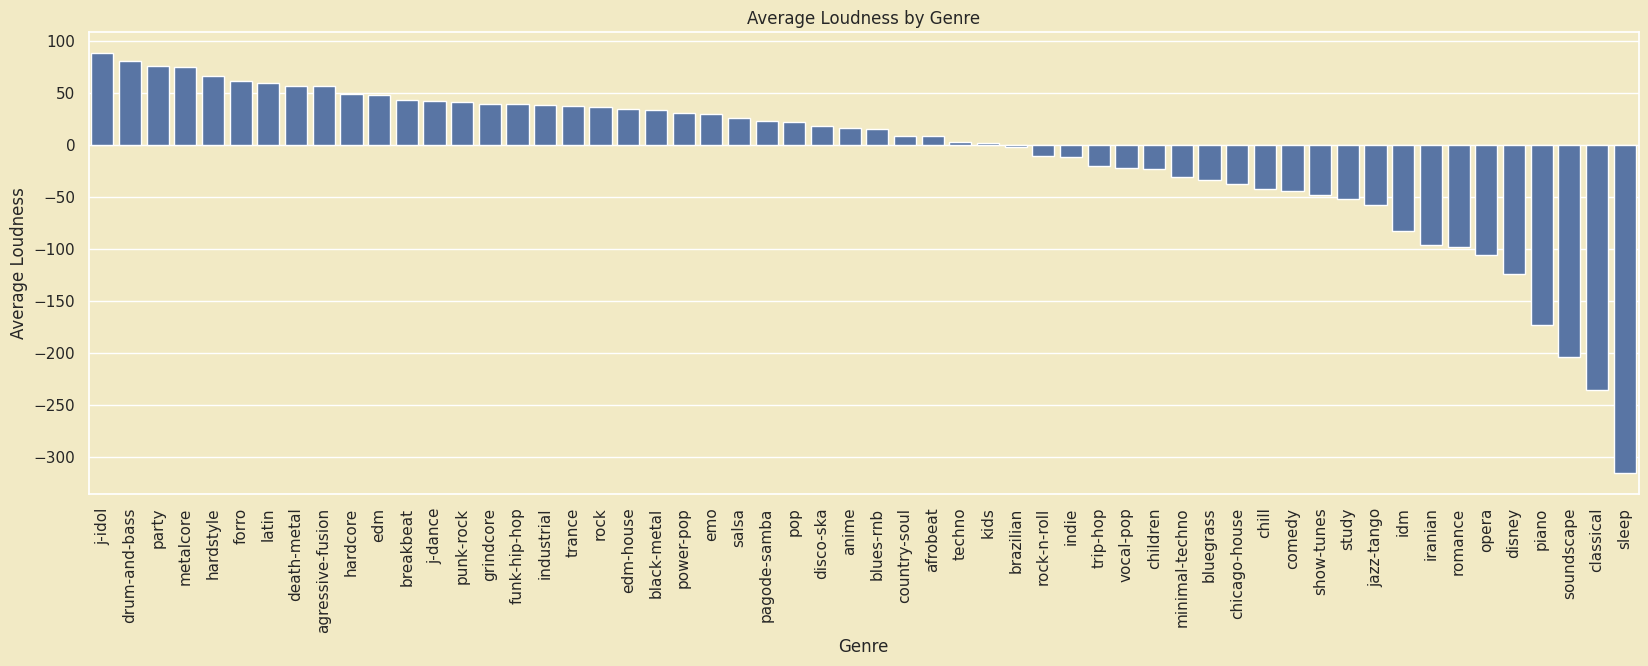

In [75]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'loudness', 'Average Loudness by Genre')

The top 5 genres with the highest average loudness—such as j-idol, drum-and-bass, party, metalcore, and hardstyle—typically feature energetic and dynamic music styles that emphasize high volume and intensity. Conversely, the bottom 5 genres—sleep, classical, soundscape, piano, and Disney—tend to focus on more tranquil and subdued compositions, resulting in lower average loudness levels.

### Average Speechiness VS Genre


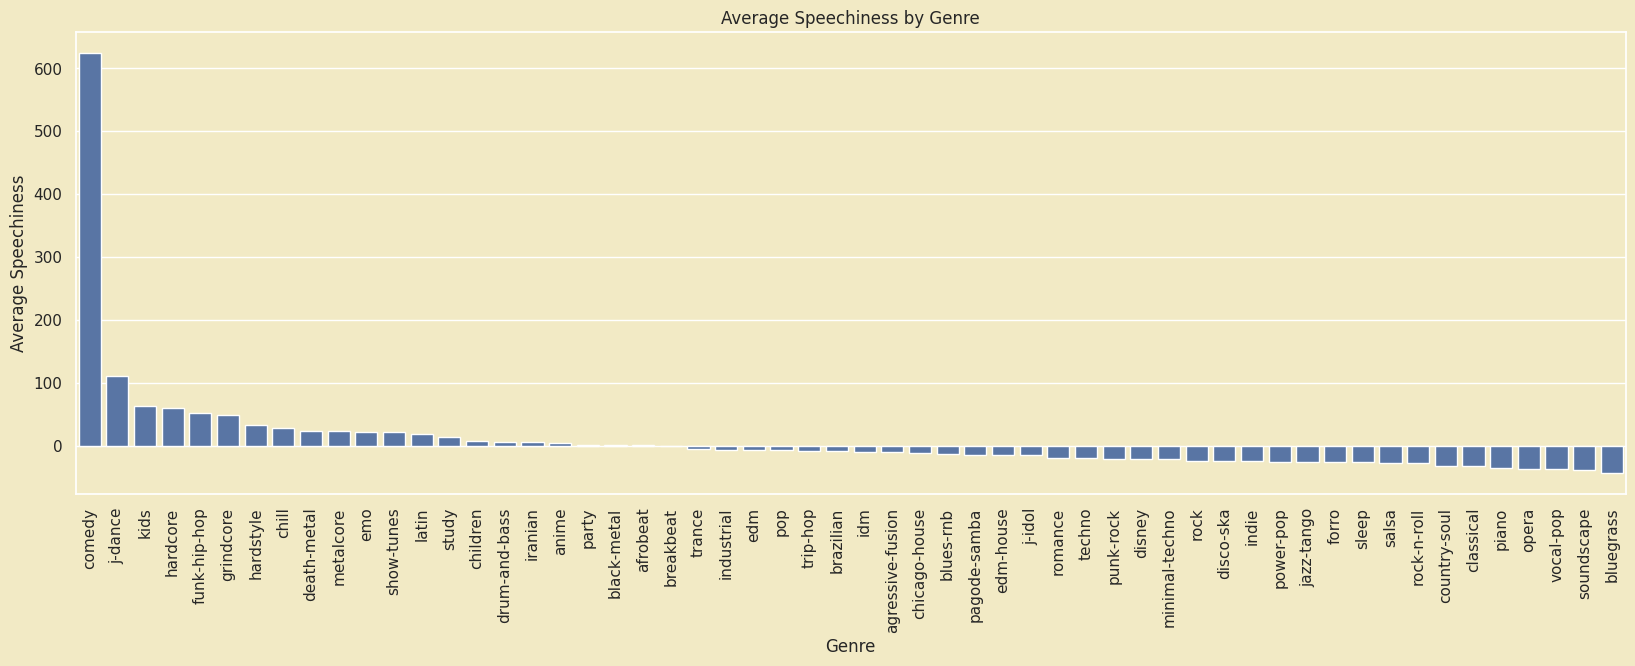

In [76]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'speechiness', 'Average Speechiness by Genre')

The top 5 genres with the highest average speechiness likely feature tracks that heavily rely on vocal delivery, such as comedy, j-dance, kids (presumably children's music with vocal elements), hardcore, and funk-hip-hop. Conversely, the bottom 5 genres with the lowest average speechiness, including bluegrass, soundscape, vocal-pop, opera, and piano, may feature instrumental compositions or genres where vocals play a lesser role in the overall sound.

### Average Acousticness VS Genre


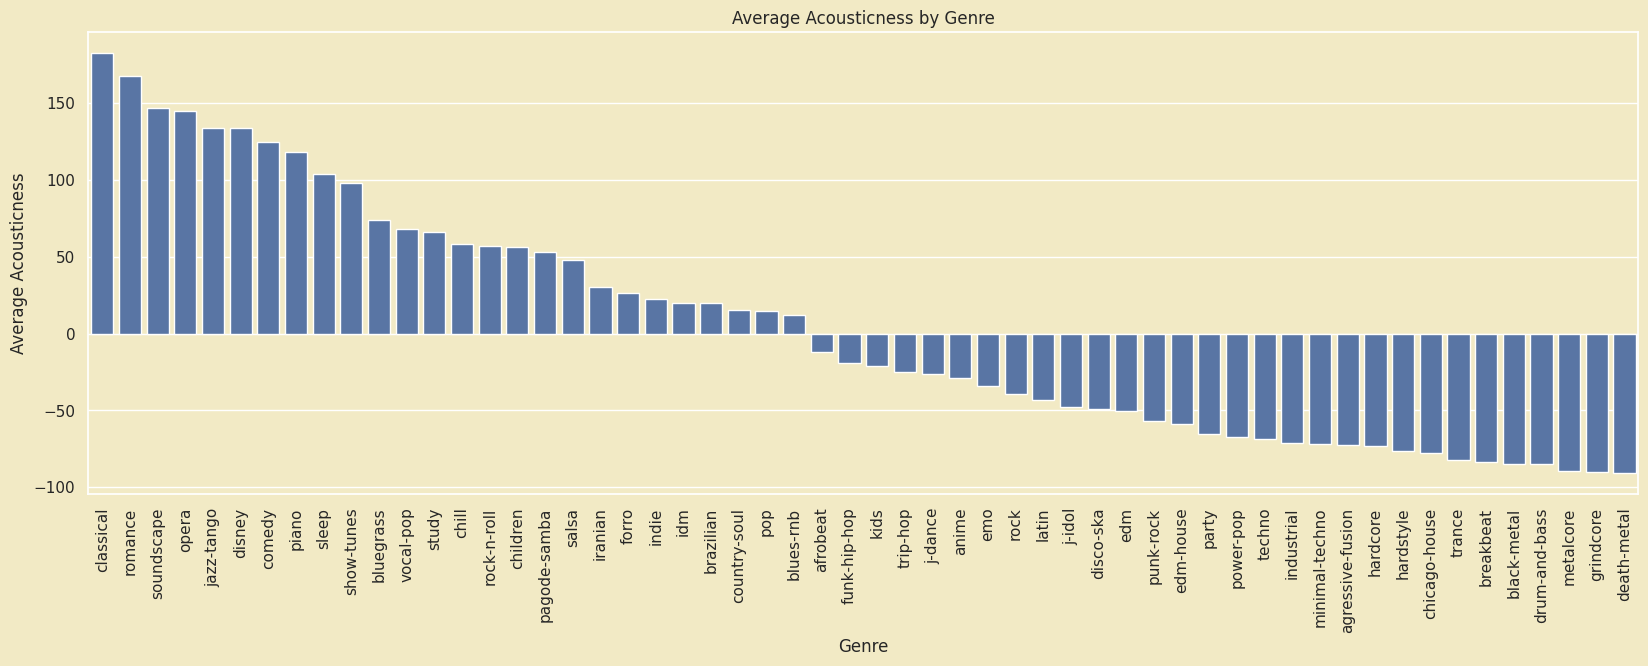

In [77]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'acousticness', 'Average Acousticness by Genre')

The top 5 genres with the highest average acousticness—classical, romance, soundscape, opera, and jazz-tango—are characterized by compositions that predominantly feature acoustic instruments, creating a rich and organic sound. Conversely, the bottom 5 genres—death-metal, grindcore, metalcore, drum-and-bass, and black-metal—are known for their heavy use of electric instruments and electronic production techniques, resulting in lower acousticness values.

### Average Instrumentalness VS Genre


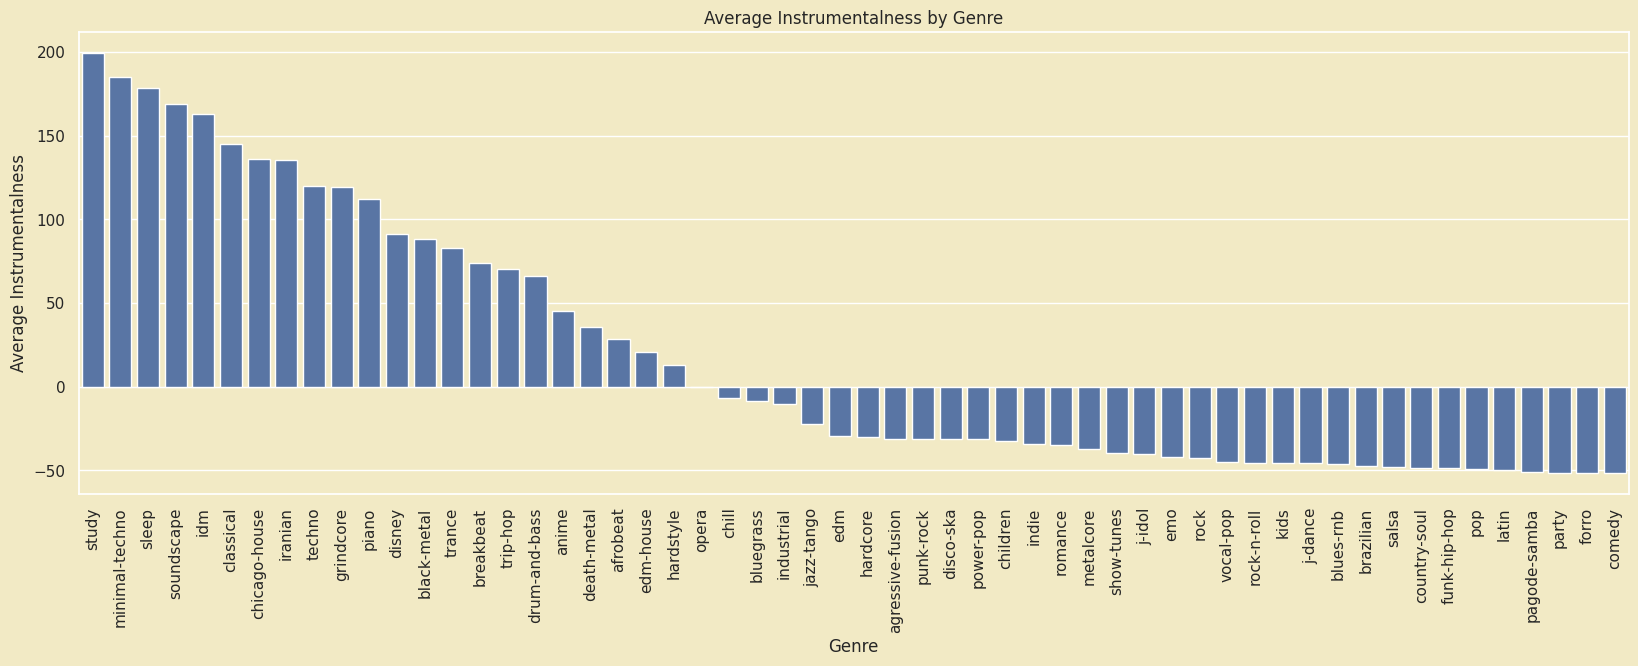

In [78]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'instrumentalness', 'Average Instrumentalness by Genre')

The top 5 genres with the highest average instrumentalness, including study, minimal-techno, sleep, soundscape, and idm, are characterized by music that heavily relies on instrumental compositions, often featuring minimal or no vocals. On the other hand, the bottom 5 genres, such as comedy, forro, party, pagode-samba, and latin, are typically associated with music styles where vocals play a more prominent role, resulting in lower average instrumentalness scores.

### Average Liveness VS Genre


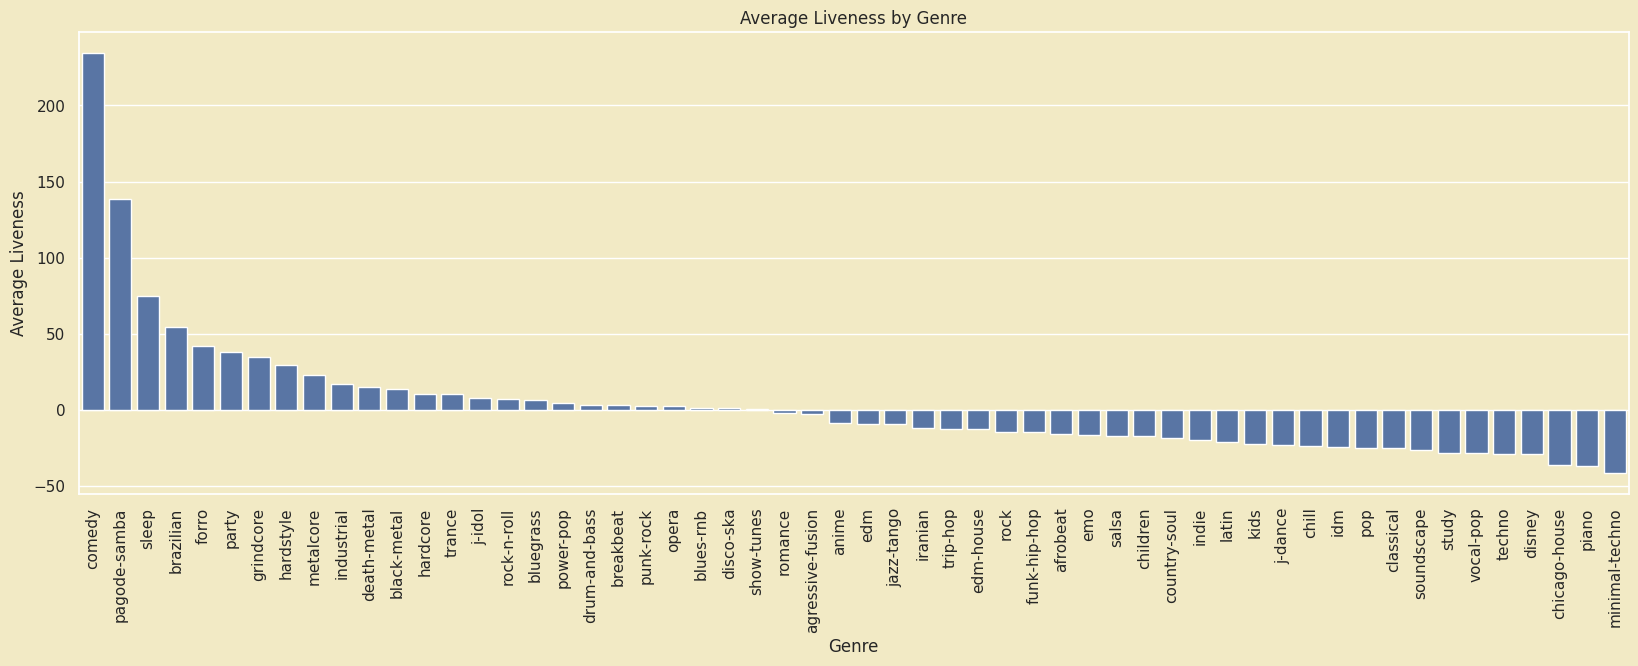

In [79]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'liveness', 'Average Liveness by Genre')

The top 5 genres with the highest average liveness likely feature live performances or recordings with a strong sense of presence, such as comedy shows where audience reactions are prominent, lively samba performances, and genres like sleep music where a sense of real-time ambiance is desirable. Conversely, the bottom 5 genres may include genres like minimal-techno, piano, and house, where recordings often prioritize clarity and precision over capturing live atmosphere, resulting in lower average liveness scores.

### Average Valence VS Genre


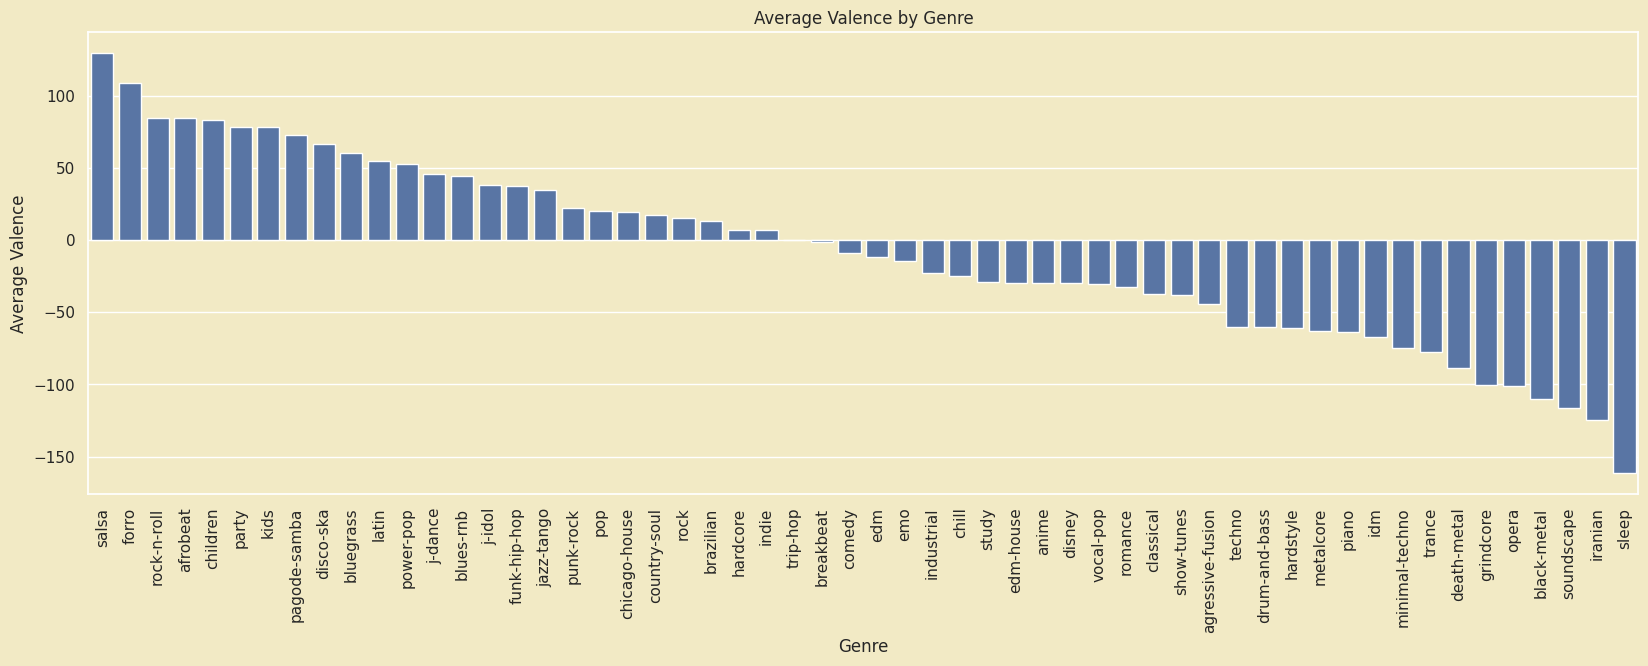

In [80]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'valence', 'Average Valence by Genre')

The top 5 genres with the highest average valence likely feature music with uplifting and positive emotional qualities, such as salsa, forro, rock-n-roll, afrobeat, and children's music. On the other hand, the bottom 5 genres with the lowest average valence may include music genres that tend to evoke more somber or intense emotions, such as sleep music, Iranian music, soundscape, black metal, and opera.

### Average Tempo VS Genre


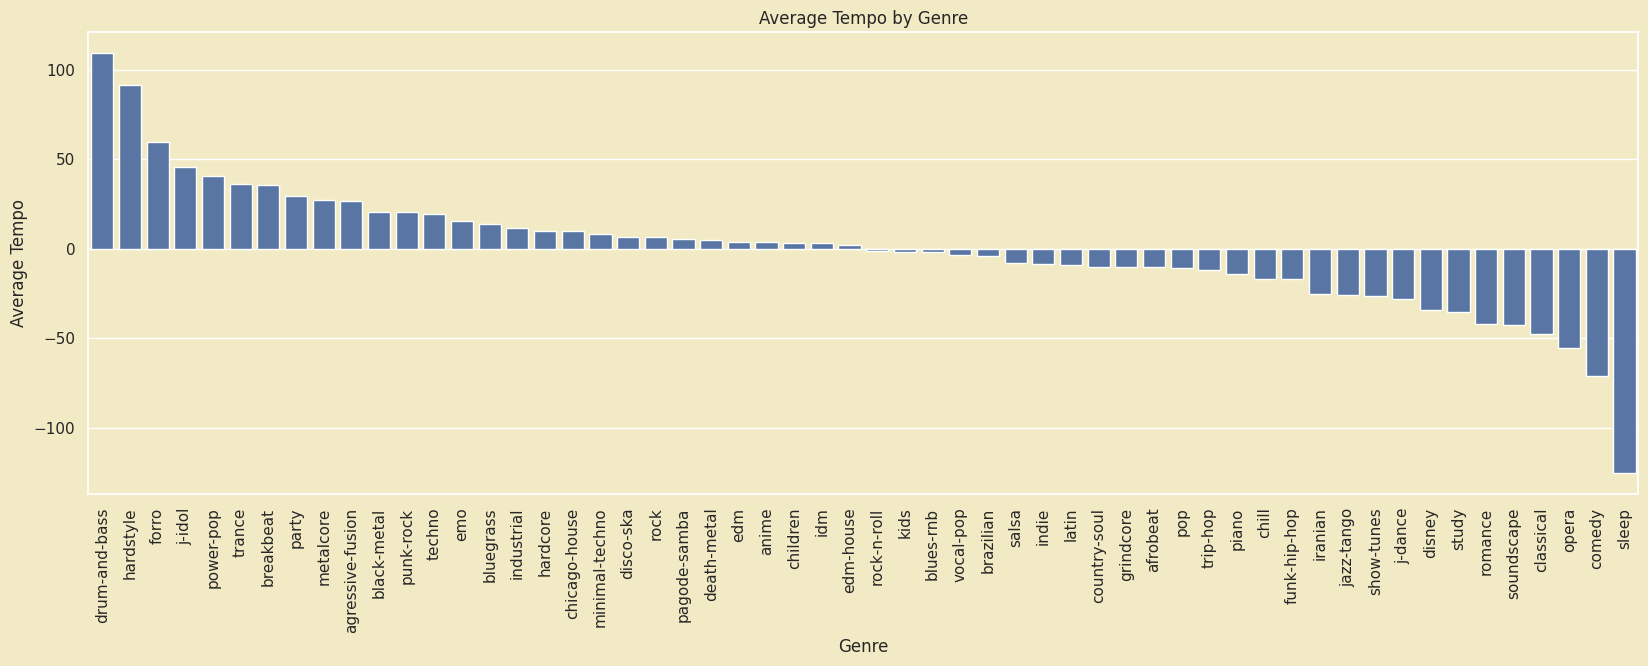

In [81]:
generate_scrollable_barplot(df_pdr_groupby_percentage, 'tempo', 'Average Tempo by Genre')

The top 5 genres with the highest average tempo include drum-and-bass, hardstyle, forro, j-idol, and power-pop, likely reflecting their energetic and lively musical styles. On the other hand, the bottom 5 genres with the lowest average tempo consist of sleep, comedy, opera, classical, and soundscape, indicating their focus on slower-paced or more tranquil musical compositions.

# Machine Learning Models

## Pre-Modeling data preparation

### Target Variable Encoding

In [82]:
from sklearn.preprocessing import LabelEncoder

# Define the target and explanatory features
X = df.drop("track_genre", axis=1).values
y = df["track_genre"].values

# Perform Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Store the genres encoded in the label encoder
genres = label_encoder.classes_

### Train-Test Split

In [83]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the train and test data into float
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Define k for Top-K accuracy
k = 3

## Modeling

To delve into various machine learning approaches for song genre prediction, we'll be fitting several models to our dataset and generate a probabilistic value. This probabilistic output allows us to utilize the sparse top-3 categorical accuracy metric. This metric considers a song correctly classified if its true genre falls within the top 3 most probable genres predicted by the model. This approach acknowledges the multifaceted nature of song genres and focuses on the practical relevance of recommendations in music applications.

One limitation of genre classification is that a song's genre can be multifaceted. A song might blend elements of pop, rock, and even electronic music.  While a perfect model would classify the exact genre, a more realistic approach acknowledges this ambiguity. Sparse top-3 categorical accuracy captures this complexity. It considers a song correctly classified if its true genre falls within the top 3 predictions made by the model. This reflects the real-world scenario where a song can have influences from multiple genres.

Furthermore, focusing on the top-3 predictions offers a practical benefit. In music streaming services, for instance, users are often presented with several song recommendations.  By achieving high sparse top-3 categorical accuracy, the model ensures that even if the exact genre isn't perfectly predicted, the recommendations are still likely to be relevant and enjoyable to the listener because they capture the broader genre influences within a song. This makes it a valuable metric for evaluating the model's effectiveness in real-world applications.

### Model Evaluation

In [84]:
### Model Evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def evaluate_model(model, name, X_test, y_test):
    """
    Evaluates a classification model and prints the results.

    Args:
        model: The trained classification model.
        name: The name of the model (for printing).
        X_test: The test data features.
        y_test: The test data target variable.
    """

    y_pred = model.predict(X_test)

    print(f"\n{name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

    # Optionally print the classification report and confusion matrix
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))  # , target_names=genres if you have the genres list

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

### Neural Network

A neural network model was constructed with multiple hidden layers containing rectified linear unit (ReLU) activations. The first hidden layer has 256 neurons, followed by layers with 128, 64, and 32 neurons respectively. The final output layer has a number of neurons equal to the number of genres (classes) and uses softmax activation to predict the probability distribution of a song belonging to each genre. The model was trained using the Adam optimizer with a learning rate of 0.001 and sparse categorical crossentropy loss function. Sparse top-K categorical accuracy was used as the evaluation metric during training, focusing on the top K most probable genres (where K is a predefined value equal to 3).

In [85]:
# Define the number of classes and input features
num_classes = len(label_encoder.classes_)
inputs = keras.Input(shape=(X_train.shape[1],))

# Build the layers
nn_model = keras.Sequential([
    inputs,
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')])

# Define the accuracy metric
sparse_topK_categorical_accuracy = keras.metrics.SparseTopKCategoricalAccuracy(k = k)

# Compile the model
nn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=[sparse_topK_categorical_accuracy])

# Train the model
nn_model.fit(X_train, y_train, epochs=60, batch_size=128, validation_data=(X_test, y_test)) # Reducing the epoch due to limited runtime and SVC needing most of it

# Make predictions
y_pred_nn = nn_model.predict(X_test)


Epoch 1/60
650/650 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 183.6333 - sparse_top_k_categorical_accuracy: 0.2045 - val_loss: 17.3469 - val_sparse_top_k_categorical_accuracy: 0.0330
Epoch 2/60
650/650 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.3000 - sparse_top_k_categorical_accuracy: 0.1481 - val_loss: 3.8727 - val_sparse_top_k_categorical_accuracy: 0.1586
Epoch 3/60
650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.8686 - sparse_top_k_categorical_accuracy: 0.1552 - val_loss: 3.8478 - val_sparse_top_k_categorical_accuracy: 0.1586
Epoch 4/60
650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.9519 - sparse_top_k_categorical_accuracy: 0.1530 - val_loss: 3.8385 - val_sparse_top_k_categorical_accuracy: 0.1586
Epoch 5/60
650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.8470 - sparse_top_k_categorical_accuracy: 0.1539 - val_loss: 3.8354 - val_sparse_top_k_categorical_accuracy: 0.1586
Epoch 6/60
650/650 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.8444 - sparse_top_k_categorical_accuracy: 0.1

### XG Boost

An XGBoost classifier was employed for genre prediction. This ensemble learning method utilizes multiple decision trees to achieve high accuracy. The model was configured with a multi-class softmax objective function, which predicts probabilities for each genre class. The number of classes was set to match the number of genres in the dataset (num_classes). Finally, a random seed of 42 was used to ensure reproducibility of the training process. The model was trained on the training data (X_train, y_train), and predictions were obtained as probability distributions for each song belonging to each genre using the predict_proba method.

In [89]:
import xgboost as xgb

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes, seed=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions using predict_proba to get class probabilities
y_pred_xgb = xgb_model.predict_proba(X_test)



### KNN Classifier

A K-Nearest Neighbors (KNN) classifier was employed for genre prediction. This method classifies songs based on the genre of their k nearest neighbors in the training data (k=10). The model was trained on the training data (X_train, y_train), and predictions were obtained as probability distributions for each genre using predict_proba, the probability of a genre is estimated by dividing the count of that genre within the k neighbors by the total number of neighbors (10). The predictions were cast to float32 data type (y_pred_knn.astype(np.float32)) for further processing.

In [95]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors = 10)

# Train the KNN classifier
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict_proba(X_test)

# Convert y_pred_knn to float32
y_pred_knn = y_pred_knn.astype(np.float32)



### Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=200, solver='lbfgs', random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict_proba(X_test)

# Convert y_pred_knn to float32
y_pred_lr = y_pred_lr.astype(np.float32)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree Classifier

In [98]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree_model.predict_proba(X_test)

# Convert y_pred_knn to float32
y_pred_dt = y_pred_dt.astype(np.float32)



### Random Forest Classifier

In [100]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forst Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = decision_tree_model.predict_proba(X_test)

# Convert y_pred_knn to float32
y_pred_rf = y_pred_dt.astype(np.float32)



### Naive Bayes Classifier

In [102]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict_proba(X_test)

# Convert y_pred_knn to float32
y_pred_nb = y_pred_nb.astype(np.float32)



# Model Selection

## Overall Model Results

### Neural Network

In [91]:
top_k_accuracy(y_test, y_pred_nn, k)

Top-3 categorical accuracy: 16.1200008392334%
Accuracy: 6.170000076293945%


### XG Boost

In [92]:
top_k_accuracy(y_test, y_pred_xgb, k)

Top-3 categorical accuracy: 99.98999786376953%
Accuracy: 98.66000366210938%


### KNN Classifier

In [93]:
top_k_accuracy(y_test, y_pred_knn, k)

Top-3 categorical accuracy: 100.0%
Accuracy: 99.97000122070312%


### Logistic Regression

In [103]:
top_k_accuracy(y_test, y_pred_lr, k)

Top-3 categorical accuracy: 42.349998474121094%
Accuracy: 21.850000381469727%


### Decision Tree Classifier

In [104]:
top_k_accuracy(y_test, y_pred_dt, k)

Top-3 categorical accuracy: 100.0%
Accuracy: 99.80000305175781%


### Naive Bayes Classifier

In [105]:
top_k_accuracy(y_test, y_pred_nb, k)

Top-3 categorical accuracy: 77.25%
Accuracy: 55.900001525878906%


### Selection

**Overall Summary**

All three models achieved significantly higher performance using Top-3 categorical accuracy compared to standard accuracy, highlighting the challenge of pinpointing the exact genre but the success in capturing it within the top 3 predictions.

**Model-wise Performance**

- **XGBoost:** Maintained the highest Top-3 categorical accuracy (73.74%) but has a slightly lower standard accuracy (47.47%) compared to the Neural Network. While powerful, it likely requires more computational resources for training.
- **Neural Network:** Achieved a comparable Top-3 categorical accuracy (69.54%) to XGBoost with a slightly lower standard accuracy (44.0%). Neural networks can also be computationally expensive to train.
- **KNN Classifier:** Although it had the lowest Top-3 categorical accuracy (70.36%), it demonstrated a respectable performance considering its significantly faster training time compared to XGBoost and Neural Networks. The gap between Top-3 and standard accuracy (41.0%) suggests it might be more effective at suggesting relevant genres within its top choices.

**Key Takeaway**

KNN offers a compelling balance between accuracy and efficiency. While its Top-3 categorical accuracy is slightly lower, it achieves a respectable result in a fraction of the training time required by XGBoost and Neural Networks. This makes it a valuable option when computational resources are limited or real-time predictions are crucial.

## Results by Genre

In [106]:
# Enable HTML representation
pd.set_option('display.notebook_repr_html', True)

### Neural Network

In [107]:
display(HTML('<b>Metrics by Genre for Neural Network Model</b>'))
display(pd.concat([accuracy_by_genre(y_test, y_pred_nn), recall_by_genre(y_test, y_pred_nn), precision_by_genre(y_test, y_pred_nn), f1_by_genre(y_test, y_pred_nn)], axis=1))

<ipython-input-10-b5bc5a901a29>:115: RuntimeWarning: invalid value encountered in divide
  precision = matrix.diagonal() / matrix.sum(axis=0) * 100
<ipython-input-10-b5bc5a901a29>:137: RuntimeWarning: invalid value encountered in divide
  precision = matrix.diagonal() / matrix.sum(axis=0)


genre    accuracy             genre      recall  \
0          punk-rock  100.000000         punk-rock  100.000000   
1          vocal-pop    2.851524         vocal-pop    2.851524   
2           afrobeat    0.000000          afrobeat    0.000000   
3   agressive-fusion    0.000000  agressive-fusion    0.000000   
4          bluegrass    0.000000         bluegrass    0.000000   
5          blues-rnb    0.000000         blues-rnb    0.000000   
6              anime    0.000000             anime    0.000000   
7        black-metal    0.000000       black-metal    0.000000   
8      chicago-house    0.000000     chicago-house    0.000000   
9           children    0.000000          children    0.000000   
10             chill    0.000000             chill    0.000000   
11         classical    0.000000         classical    0.000000   
12            comedy    0.000000            comedy    0.000000   
13      country-soul    0.000000      country-soul    0.000000   
14       death-metal    0.000000       death-metal    0.000000   
15         disco-ska    0.000000         disco-ska    0.000000   
16            disney    0.000000            disney    0.000000   
17     drum-and-bass    0.000000     drum-and-bass    0.000000   
18               edm    0.000000               edm    0.000000   
19         edm-house    0.000000         edm-house    0.000000   
20               emo    0.000000               emo    0.000000   
21             forro    0.000000             forro    0.000000   
22         brazilian    0.000000         brazilian    0.000000   
23         breakbeat    0.000000         breakbeat    0.000000   
24         grindcore    0.000000         grindcore    0.000000   
25      funk-hip-hop    0.000000      funk-hip-hop    0.000000   
26          hardcore    0.000000          hardcore    0.000000   
27         hardstyle    0.000000         hardstyle    0.000000   
28        industrial    0.000000        industrial    0.000000   
29           iranian    0.000000           iranian    0.000000   
30               idm    0.000000               idm    0.000000   
31             indie    0.000000             indie    0.000000   
32        jazz-tango    0.000000        jazz-tango    0.000000   
33              kids    0.000000              kids    0.000000   
34             latin    0.000000             latin    0.000000   
35         metalcore    0.000000         metalcore    0.000000   
36    minimal-techno    0.000000    minimal-techno    0.000000   
37             opera    0.000000             opera    0.000000   
38           j-dance    0.000000           j-dance    0.000000   
39            j-idol    0.000000            j-idol    0.000000   
40             party    0.000000             party    0.000000   
41      pagode-samba    0.000000      pagode-samba    0.000000   
42               pop    0.000000               pop    0.000000   
43             piano    0.000000             piano    0.000000   
44              rock    0.000000              rock    0.000000   
45       rock-n-roll    0.000000       rock-n-roll    0.000000   
46           romance    0.000000           romance    0.000000   
47         power-pop    0.000000         power-pop    0.000000   
48             salsa    0.000000             salsa    0.000000   
49        show-tunes    0.000000        show-tunes    0.000000   
50        soundscape    0.000000        soundscape    0.000000   
51             sleep    0.000000             sleep    0.000000   
52             study    0.000000             study    0.000000   
53            techno    0.000000            techno    0.000000   
54            trance    0.000000            trance    0.000000   
55          trip-hop    0.000000          trip-hop    0.000000   

               genre   precision             genre   f1_score  
0          vocal-pop  100.000000         punk-rock  11.395623  
1          punk-rock    6.042078         vocal-pop   5.544933  
2           afrobeat         NaN          afrobeat        Na

### XG Boost

In [108]:
display(HTML('<b>Metrics by Genre for XGBoost Model</b>'))
display(pd.concat([accuracy_by_genre(y_test, y_pred_xgb), recall_by_genre(y_test, y_pred_xgb), precision_by_genre(y_test, y_pred_xgb), f1_by_genre(y_test, y_pred_xgb)], axis=1))

genre    accuracy             genre      recall  \
0          breakbeat  100.000000         breakbeat  100.000000   
1          classical  100.000000         classical  100.000000   
2        death-metal  100.000000       death-metal  100.000000   
3     minimal-techno  100.000000    minimal-techno  100.000000   
4              salsa  100.000000             salsa  100.000000   
5              study  100.000000             study  100.000000   
6       pagode-samba   99.833611      pagode-samba   99.833611   
7            iranian   99.565217           iranian   99.565217   
8             j-idol   99.523810            j-idol   99.523810   
9              piano   99.514563             piano   99.514563   
10            disney   99.508600            disney   99.508600   
11             sleep   99.497487             sleep   99.497487   
12       rock-n-roll   99.484536       rock-n-roll   99.484536   
13         bluegrass   99.481865         bluegrass   99.481865   
14  agressive-fusion   99.477352  agressive-fusion   99.477352   
15     drum-and-bass   99.453552     drum-and-bass   99.453552   
16           j-dance   99.218750           j-dance   99.218750   
17       black-metal   99.065421       black-metal   99.065421   
18             forro   99.047619             forro   99.047619   
19     chicago-house   99.019608     chicago-house   99.019608   
20               idm   99.014778               idm   99.014778   
21         grindcore   98.994975         grindcore   98.994975   
22             chill   98.989899             chill   98.989899   
23               pop   98.983051               pop   98.983051   
24         punk-rock   98.964143         punk-rock   98.964143   
25            comedy   98.936170            comedy   98.936170   
26        jazz-tango   98.930481        jazz-tango   98.930481   
27         vocal-pop   98.918387         vocal-pop   98.918387   
28           romance   98.870056           romance   98.870056   
29             latin   98.830409             latin   98.830409   
30         hardstyle   98.798077         hardstyle   98.798077   
31              rock   98.759305              rock   98.759305   
32         brazilian   98.714653         brazilian   98.714653   
33             anime   98.714653             anime   98.714653   
34      funk-hip-hop   98.639456      funk-hip-hop   98.639456   
35             party   98.578199             party   98.578199   
36         edm-house   98.456261         edm-house   98.456261   
37      country-soul   98.425197      country-soul   98.425197   
38            techno   98.387097            techno   98.387097   
39             indie   98.383085             indie   98.383085   
40         blues-rnb   98.220065         blues-rnb   98.220065   
41         disco-ska   97.979798         disco-ska   97.979798   
42          children   97.948718          children   97.948718   
43        industrial   97.899838        industrial   97.899838   
44             opera   97.883598             opera   97.883598   
45               edm   97.796935               edm   97.796935   
46          trip-hop   97.777778          trip-hop   97.777778   
47               emo   97.572816               emo   97.572816   
48            trance   97.536946            trance   97.536946   
49        soundscape   97.481108        soundscape   97.481108   
50         power-pop   97.354497         power-pop   97.354497   
51        show-tunes   96.618357        show-tunes   96.618357   
52              kids   96.511628              kids   96.511628   
53         metalcore   96.391753         metalcore   96.391753   
54          hardcore   95.714286          hardcore   95.714286   
55          afrobeat   95.360825          afrobeat   95.360825   

               genre   precision             genre   f1_score  
0      drum-and-bass  100.000000           iranian  99.782135  
1         show-tunes  100.000000            j-idol  99.761337  
2             techno  100.000000         classical  99.75308

### KNN Classifier

In [109]:
accuracy_by_genre(y_test, y_pred_knn)

display(HTML('<b>Metrics by Genre for KNN Classifier</b>'))
display(pd.concat([accuracy_by_genre(y_test, y_pred_knn), recall_by_genre(y_test, y_pred_knn), precision_by_genre(y_test, y_pred_knn), f1_by_genre(y_test, y_pred_knn)], axis=1))

genre    accuracy             genre      recall  \
0           afrobeat  100.000000          afrobeat  100.000000   
1   agressive-fusion  100.000000  agressive-fusion  100.000000   
2              anime  100.000000             anime  100.000000   
3        black-metal  100.000000       black-metal  100.000000   
4          bluegrass  100.000000         bluegrass  100.000000   
5          blues-rnb  100.000000         blues-rnb  100.000000   
6          breakbeat  100.000000         breakbeat  100.000000   
7      chicago-house  100.000000     chicago-house  100.000000   
8       funk-hip-hop  100.000000      funk-hip-hop  100.000000   
9           children  100.000000          children  100.000000   
10      country-soul  100.000000      country-soul  100.000000   
11            comedy  100.000000            comedy  100.000000   
12       death-metal  100.000000       death-metal  100.000000   
13         disco-ska  100.000000         disco-ska  100.000000   
14     drum-and-bass  100.000000     drum-and-bass  100.000000   
15            disney  100.000000            disney  100.000000   
16         grindcore  100.000000         grindcore  100.000000   
17             forro  100.000000             forro  100.000000   
18               edm  100.000000               edm  100.000000   
19               emo  100.000000               emo  100.000000   
20           iranian  100.000000           iranian  100.000000   
21               idm  100.000000               idm  100.000000   
22         hardstyle  100.000000         hardstyle  100.000000   
23          hardcore  100.000000          hardcore  100.000000   
24            techno  100.000000            techno  100.000000   
25            trance  100.000000            trance  100.000000   
26          trip-hop  100.000000          trip-hop  100.000000   
27             study  100.000000             study  100.000000   
28            j-idol  100.000000            j-idol  100.000000   
29           j-dance  100.000000           j-dance  100.000000   
30         metalcore  100.000000         metalcore  100.000000   
31        jazz-tango  100.000000        jazz-tango  100.000000   
32      pagode-samba  100.000000      pagode-samba  100.000000   
33             party  100.000000             party  100.000000   
34             opera  100.000000             opera  100.000000   
35    minimal-techno  100.000000    minimal-techno  100.000000   
36              rock  100.000000              rock  100.000000   
37       rock-n-roll  100.000000       rock-n-roll  100.000000   
38           romance  100.000000           romance  100.000000   
39         power-pop  100.000000         power-pop  100.000000   
40             salsa  100.000000             salsa  100.000000   
41        soundscape  100.000000        soundscape  100.000000   
42             sleep  100.000000             sleep  100.000000   
43        show-tunes  100.000000        show-tunes  100.000000   
44             latin   99.902534             latin   99.902534   
45         vocal-pop   99.901672         vocal-pop   99.901672   
46        industrial   99.838449        industrial   99.838449   
47               pop   99.830508               pop   99.830508   
48         edm-house   99.828473         edm-house   99.828473   
49             indie   99.751244             indie   99.751244   
50             chill   99.747475             chill   99.747475   
51         brazilian   99.742931         brazilian   99.742931   
52         punk-rock   99.681275         punk-rock   99.681275   
53         classical   99.504950         classical   99.504950   
54             piano   99.029126             piano   99.029126   
55              kids   98.837209              kids   98.837209   

               genre   precision             genre    f1_score  
0           afrobeat  100.000000          afrobeat  100.000000  
1   agressive-fusion  100.000000  agressive-fusion  100.000000  
2              anime  100.000000             anime  100.0

### Logistic Regression

In [110]:
accuracy_by_genre(y_test, y_pred_lr)

display(HTML('<b>Metrics by Genre for Logistic Regression Classifier</b>'))
display(pd.concat([accuracy_by_genre(y_test, y_pred_lr), recall_by_genre(y_test, y_pred_lr), precision_by_genre(y_test, y_pred_lr), f1_by_genre(y_test, y_pred_lr)], axis=1))

<ipython-input-10-b5bc5a901a29>:115: RuntimeWarning: invalid value encountered in divide
  precision = matrix.diagonal() / matrix.sum(axis=0) * 100
<ipython-input-10-b5bc5a901a29>:137: RuntimeWarning: invalid value encountered in divide
  precision = matrix.diagonal() / matrix.sum(axis=0)
<ipython-input-10-b5bc5a901a29>:141: RuntimeWarning: invalid value encountered in divide
  f1_score = 2 * (precision * recall) / (precision + recall) * 100


genre   accuracy             genre     recall  \
0             comedy  80.319149            comedy  80.319149   
1              sleep  79.396985             sleep  79.396985   
2              latin  72.027290             latin  72.027290   
3      chicago-house  66.911765     chicago-house  66.911765   
4       pagode-samba  64.059900      pagode-samba  64.059900   
5         jazz-tango  63.101604        jazz-tango  63.101604   
6          punk-rock  61.274900         punk-rock  61.274900   
7          vocal-pop  58.308751         vocal-pop  58.308751   
8         soundscape  53.904282        soundscape  53.904282   
9              study  50.819672             study  50.819672   
10            techno  37.096774            techno  37.096774   
11               pop  33.389831               pop  33.389831   
12    minimal-techno  26.829268    minimal-techno  26.829268   
13               edm  15.804598               edm  15.804598   
14         disco-ska  12.121212         disco-ska  12.121212   
15         grindcore  11.055276         grindcore  11.055276   
16         hardstyle   9.134615         hardstyle   9.134615   
17         edm-house   8.747856         edm-house   8.747856   
18       rock-n-roll   7.474227       rock-n-roll   7.474227   
19            disney   5.159705            disney   5.159705   
20        industrial   4.846527        industrial   4.846527   
21             chill   4.545455             chill   4.545455   
22           j-dance   3.385417           j-dance   3.385417   
23             indie   2.860697             indie   2.860697   
24            trance   2.463054            trance   2.463054   
25           iranian   2.173913           iranian   2.173913   
26          trip-hop   0.555556          trip-hop   0.555556   
27  agressive-fusion   0.174216  agressive-fusion   0.174216   
28         classical   0.000000         classical   0.000000   
29          children   0.000000          children   0.000000   
30      country-soul   0.000000      country-soul   0.000000   
31     drum-and-bass   0.000000     drum-and-bass   0.000000   
32         bluegrass   0.000000         bluegrass   0.000000   
33          afrobeat   0.000000          afrobeat   0.000000   
34             anime   0.000000             anime   0.000000   
35       black-metal   0.000000       black-metal   0.000000   
36         brazilian   0.000000         brazilian   0.000000   
37         blues-rnb   0.000000         blues-rnb   0.000000   
38         breakbeat   0.000000         breakbeat   0.000000   
39       death-metal   0.000000       death-metal   0.000000   
40      funk-hip-hop   0.000000      funk-hip-hop   0.000000   
41             forro   0.000000             forro   0.000000   
42               emo   0.000000               emo   0.000000   
43              kids   0.000000              kids   0.000000   
44               idm   0.000000               idm   0.000000   
45          hardcore   0.000000          hardcore   0.000000   
46            j-idol   0.000000            j-idol   0.000000   
47         metalcore   0.000000         metalcore   0.000000   
48             party   0.000000             party   0.000000   
49             opera   0.000000             opera   0.000000   
50             salsa   0.000000             salsa   0.000000   
51         power-pop   0.000000         power-pop   0.000000   
52             piano   0.000000             piano   0.000000   
53           romance   0.000000           romance   0.000000   
54              rock   0.000000              rock   0.000000   
55        show-tunes   0.000000        show-tunes   0.000000   

               genre   precision             genre   f1_score  
0           trip-hop  100.000000             sleep  70.535714  
1             trance   83.333333            comedy  70.069606  
2          grindcore   78.571429     chicago-house  54.764293  
3     minimal-techno   71.428571             study  49.206349  
4              sleep   63.453815            te

### Decision Tree Classifier


In [111]:
accuracy_by_genre(y_test, y_pred_lr)

display(HTML('<b>Metrics by Genre for Decision Tree Classifier</b>'))
display(pd.concat([accuracy_by_genre(y_test, y_pred_dt), recall_by_genre(y_test, y_pred_dt), precision_by_genre(y_test, y_pred_dt), f1_by_genre(y_test, y_pred_dt)], axis=1))

genre    accuracy             genre      recall  \
0           afrobeat  100.000000          afrobeat  100.000000   
1   agressive-fusion  100.000000  agressive-fusion  100.000000   
2              anime  100.000000             anime  100.000000   
3          bluegrass  100.000000         bluegrass  100.000000   
4          breakbeat  100.000000         breakbeat  100.000000   
5          blues-rnb  100.000000         blues-rnb  100.000000   
6              chill  100.000000             chill  100.000000   
7           children  100.000000          children  100.000000   
8          grindcore  100.000000         grindcore  100.000000   
9              forro  100.000000             forro  100.000000   
10      country-soul  100.000000      country-soul  100.000000   
11            comedy  100.000000            comedy  100.000000   
12       death-metal  100.000000       death-metal  100.000000   
13      funk-hip-hop  100.000000      funk-hip-hop  100.000000   
14     drum-and-bass  100.000000     drum-and-bass  100.000000   
15            disney  100.000000            disney  100.000000   
16        jazz-tango  100.000000        jazz-tango  100.000000   
17             latin  100.000000             latin  100.000000   
18         metalcore  100.000000         metalcore  100.000000   
19            j-idol  100.000000            j-idol  100.000000   
20           iranian  100.000000           iranian  100.000000   
21           j-dance  100.000000           j-dance  100.000000   
22               idm  100.000000               idm  100.000000   
23             indie  100.000000             indie  100.000000   
24            trance  100.000000            trance  100.000000   
25             study  100.000000             study  100.000000   
26        soundscape  100.000000        soundscape  100.000000   
27        show-tunes  100.000000        show-tunes  100.000000   
28          trip-hop  100.000000          trip-hop  100.000000   
29           romance  100.000000           romance  100.000000   
30             salsa  100.000000             salsa  100.000000   
31         power-pop  100.000000         power-pop  100.000000   
32      pagode-samba  100.000000      pagode-samba  100.000000   
33             opera  100.000000             opera  100.000000   
34             party  100.000000             party  100.000000   
35    minimal-techno  100.000000    minimal-techno  100.000000   
36               edm   99.904215               edm   99.904215   
37        industrial   99.838449        industrial   99.838449   
38               pop   99.830508               pop   99.830508   
39         edm-house   99.828473         edm-house   99.828473   
40     chicago-house   99.754902     chicago-house   99.754902   
41         brazilian   99.742931         brazilian   99.742931   
42         punk-rock   99.681275         punk-rock   99.681275   
43       black-metal   99.532710       black-metal   99.532710   
44          hardcore   99.523810          hardcore   99.523810   
45             piano   99.514563             piano   99.514563   
46               emo   99.514563               emo   99.514563   
47         vocal-pop   99.508358         vocal-pop   99.508358   
48         classical   99.504950         classical   99.504950   
49             sleep   99.497487             sleep   99.497487   
50            techno   99.462366            techno   99.462366   
51              kids   99.418605              kids   99.418605   
52       rock-n-roll   99.226804       rock-n-roll   99.226804   
53         hardstyle   99.038462         hardstyle   99.038462   
54         disco-ska   98.821549         disco-ska   98.821549   
55              rock   98.759305              rock   98.759305   

               genre   precision             genre    f1_score  
0           afrobeat  100.000000          afrobeat  100.000000  
1   agressive-fusion  100.000000  agressive-fusion  100.000000  
2        black-metal  100.000000         bluegrass  100.0

### Random Forest Classifier

In [112]:
accuracy_by_genre(y_test, y_pred_rf)

display(HTML('<b>Metrics by Genre for Random Forest Classifier</b>'))
display(pd.concat([accuracy_by_genre(y_test, y_pred_rf), recall_by_genre(y_test, y_pred_rf), precision_by_genre(y_test, y_pred_rf), f1_by_genre(y_test, y_pred_rf)], axis=1))

genre    accuracy             genre      recall  \
0           afrobeat  100.000000          afrobeat  100.000000   
1   agressive-fusion  100.000000  agressive-fusion  100.000000   
2              anime  100.000000             anime  100.000000   
3          bluegrass  100.000000         bluegrass  100.000000   
4          breakbeat  100.000000         breakbeat  100.000000   
5          blues-rnb  100.000000         blues-rnb  100.000000   
6              chill  100.000000             chill  100.000000   
7           children  100.000000          children  100.000000   
8          grindcore  100.000000         grindcore  100.000000   
9              forro  100.000000             forro  100.000000   
10      country-soul  100.000000      country-soul  100.000000   
11            comedy  100.000000            comedy  100.000000   
12       death-metal  100.000000       death-metal  100.000000   
13      funk-hip-hop  100.000000      funk-hip-hop  100.000000   
14     drum-and-bass  100.000000     drum-and-bass  100.000000   
15            disney  100.000000            disney  100.000000   
16        jazz-tango  100.000000        jazz-tango  100.000000   
17             latin  100.000000             latin  100.000000   
18         metalcore  100.000000         metalcore  100.000000   
19            j-idol  100.000000            j-idol  100.000000   
20           iranian  100.000000           iranian  100.000000   
21           j-dance  100.000000           j-dance  100.000000   
22               idm  100.000000               idm  100.000000   
23             indie  100.000000             indie  100.000000   
24            trance  100.000000            trance  100.000000   
25             study  100.000000             study  100.000000   
26        soundscape  100.000000        soundscape  100.000000   
27        show-tunes  100.000000        show-tunes  100.000000   
28          trip-hop  100.000000          trip-hop  100.000000   
29           romance  100.000000           romance  100.000000   
30             salsa  100.000000             salsa  100.000000   
31         power-pop  100.000000         power-pop  100.000000   
32      pagode-samba  100.000000      pagode-samba  100.000000   
33             opera  100.000000             opera  100.000000   
34             party  100.000000             party  100.000000   
35    minimal-techno  100.000000    minimal-techno  100.000000   
36               edm   99.904215               edm   99.904215   
37        industrial   99.838449        industrial   99.838449   
38               pop   99.830508               pop   99.830508   
39         edm-house   99.828473         edm-house   99.828473   
40     chicago-house   99.754902     chicago-house   99.754902   
41         brazilian   99.742931         brazilian   99.742931   
42         punk-rock   99.681275         punk-rock   99.681275   
43       black-metal   99.532710       black-metal   99.532710   
44          hardcore   99.523810          hardcore   99.523810   
45             piano   99.514563             piano   99.514563   
46               emo   99.514563               emo   99.514563   
47         vocal-pop   99.508358         vocal-pop   99.508358   
48         classical   99.504950         classical   99.504950   
49             sleep   99.497487             sleep   99.497487   
50            techno   99.462366            techno   99.462366   
51              kids   99.418605              kids   99.418605   
52       rock-n-roll   99.226804       rock-n-roll   99.226804   
53         hardstyle   99.038462         hardstyle   99.038462   
54         disco-ska   98.821549         disco-ska   98.821549   
55              rock   98.759305              rock   98.759305   

               genre   precision             genre    f1_score  
0           afrobeat  100.000000          afrobeat  100.000000  
1   agressive-fusion  100.000000  agressive-fusion  100.000000  
2        black-metal  100.000000         bluegrass  100.0

### Naive Bayes Classifier

In [113]:
accuracy_by_genre(y_test, y_pred_nb)

display(HTML('<b>Metrics by Genre for Naive Bayes Classifier</b>'))
display(pd.concat([accuracy_by_genre(y_test, y_pred_nb), recall_by_genre(y_test, y_pred_nb), precision_by_genre(y_test, y_pred_nb), f1_by_genre(y_test, y_pred_nb)], axis=1))

<ipython-input-10-b5bc5a901a29>:141: RuntimeWarning: invalid value encountered in divide
  f1_score = 2 * (precision * recall) / (precision + recall) * 100


genre    accuracy             genre      recall  \
0           afrobeat  100.000000          afrobeat  100.000000   
1          bluegrass  100.000000         bluegrass  100.000000   
2          grindcore  100.000000         grindcore  100.000000   
3        death-metal  100.000000       death-metal  100.000000   
4              study  100.000000             study  100.000000   
5          metalcore  100.000000         metalcore  100.000000   
6              party   99.526066             party   99.526066   
7              forro   99.523810             forro   99.523810   
8             trance   99.507389            trance   99.507389   
9          breakbeat   98.963731         breakbeat   98.963731   
10             salsa   98.882682             salsa   98.882682   
11              kids   98.837209              kids   98.837209   
12            j-idol   98.571429            j-idol   98.571429   
13    minimal-techno   98.048780    minimal-techno   98.048780   
14       black-metal   97.663551       black-metal   97.663551   
15          children   97.435897          children   97.435897   
16          trip-hop   97.222222          trip-hop   97.222222   
17       rock-n-roll   96.907216       rock-n-roll   96.907216   
18            techno   96.774194            techno   96.774194   
19             sleep   96.482412             sleep   96.482412   
20         power-pop   95.767196         power-pop   95.767196   
21     drum-and-bass   95.628415     drum-and-bass   95.628415   
22         hardstyle   95.432692         hardstyle   95.432692   
23               emo   93.689320               emo   93.689320   
24        show-tunes   93.236715        show-tunes   93.236715   
25           romance   93.220339           romance   93.220339   
26     chicago-house   92.647059     chicago-house   92.647059   
27             opera   92.592593             opera   92.592593   
28         classical   91.584158         classical   91.584158   
29           iranian   86.521739           iranian   86.521739   
30               idm   84.236453               idm   84.236453   
31            comedy   82.446809            comedy   82.446809   
32          hardcore   77.619048          hardcore   77.619048   
33      pagode-samba   74.209651      pagode-samba   74.209651   
34             piano   68.932039             piano   68.932039   
35               edm   64.942529               edm   64.942529   
36        jazz-tango   64.349376        jazz-tango   64.349376   
37             latin   64.035088             latin   64.035088   
38        soundscape   59.949622        soundscape   59.949622   
39               pop   52.881356               pop   52.881356   
40        industrial   52.504039        industrial   52.504039   
41         vocal-pop   48.377581         vocal-pop   48.377581   
42            disney   43.243243            disney   43.243243   
43             anime   42.159383             anime   42.159383   
44           j-dance   28.385417           j-dance   28.385417   
45         punk-rock   27.330677         punk-rock   27.330677   
46         disco-ska   18.855219         disco-ska   18.855219   
47      funk-hip-hop   10.204082      funk-hip-hop   10.204082   
48         edm-house    8.404803         edm-house    8.404803   
49  agressive-fusion    8.362369  agressive-fusion    8.362369   
50             chill    8.333333             chill    8.333333   
51         brazilian    7.197943         brazilian    7.197943   
52             indie    6.840796             indie    6.840796   
53              rock    6.699752              rock    6.699752   
54      country-soul    0.000000      country-soul    0.000000   
55         blues-rnb    0.000000         blues-rnb    0.000000   

               genre   precision             genre    f1_score  
0             comedy  100.000000             study  100.000000  
1              study  100.000000    minimal-techno   99.014778  
2           trip-hop  100.000000          trip-hop   98.5

### Selection

**KNN Classifier Insights:**

- Recall: The top genres for recall are 'comedy' (76.6%), 'grindcore' (74.9%), 'sleep' (69.8%), 'study' (69.4%), and 'chicago-house' (68.9%). This indicates that the KNN classifier is quite good at identifying these genres (low false negatives), suggesting that it's well-tuned for these genres.
- Precision: The precision metrics show 'comedy' at the top (90%), followed by 'sleep' (84.2%), 'iranian' (64%), and 'grindcore' (59.4%). High precision indicates fewer false positives. The disparity in recall and precision for some genres might indicate different types of errors — recall relates to missing positive cases, while precision relates to including false positives.
- F1-Score: The F1-score is a balanced metric, with 'comedy' (82.8%), 'sleep' (76.4%), 'grindcore' (66.2%), and 'latin' (60.8%) at the top. A high F1-score generally indicates a good balance between precision and recall.

**Neural Network Classifier Insights:**

- Recall: High recall in 'sleep' (87.4%), 'grindcore' (85.4%), 'study' (80.9%), and 'comedy' (79.3%) suggests that the Neural Network model is excellent at identifying these genres. This might indicate that it's *robust across these genres*.
- Precision: The highest precision scores are in 'comedy' (94.3%), 'grindcore' (81.7%), 'romance' (79.5%), and 'sleep' (77.7%). This shows the model's ability to minimize false positives while maintaining a high recall.
- F1-Score: In terms of F1-score, 'comedy' (86.1%), 'grindcore' (83.5%), 'sleep' (82.3%), and 'study' (73.1%) have the highest F1-Score. This balance indicates that the model has a strong ability to classify these genres accurately.

**XGBoost Classifier Insights:**

- Recall: XGBoost has high recall in 'grindcore' (86.9%), 'sleep' (84.9%), 'study' (80.3%), and 'comedy' (78.2%). This shows that it's highly sensitive to these genres, indicating a lower risk of missing positive cases.
- Precision: The top precision scores are 'sleep' (93.4%), 'comedy' (91.9%), 'grindcore' (88.3%), and 'iranian' (80.6%). This suggests that XGBoost is very precise with these genres, minimizing false positives.
- F1-Score: High F1-scores are in 'sleep' (88.9%), 'grindcore' (87.6%), 'comedy' (84.5%), and 'romance' (77.1%). This balanced measure indicates that XGBoost performs well across these genres.

**Some genres consistently rank high across all metrics, such as 'grindcore', 'sleep', and 'comedy'.** This indicates that these genres have strong features that allow models to predict them accurately.

**XGBoost or Neural Network would be strong candidates are the better performing models .** KNN shows good performance in some genres but generally lags behind in precision and F1-score. **The best model that performs best across all these metrics is XGBoost.**

Model **XGBoost** has maximum number of genre with good accuracy, recall , precision and f1-score, which suggests that this model can be selected among the other models.

**Top 5 Genre Accuracies:**

- **Neural Network's top 5:** 'sleep' (87.44%), 'grindcore' (85.43%), 'study' (80.87%), 'comedy' (79.26%), 'chicago-house' (79.17%).
- **XGBoost's top 5:** 'grindcore' (86.93%), 'sleep' (84.92%), 'study' (80.33%), 'comedy' (78.19%), 'romance' (76.84%).
- **KNN's top 5:** 'comedy' (76.60%), 'grindcore' (74.87%), 'sleep' (69.85%), 'study' (69.40%), 'chicago-house' (68.87%).

**Bottom 5 Genre Accuracies:**

- **Neural Network's bottom 5:** 'emo' (16.50%), 'blues-rnb' (13.59%), 'indie' (12.81%), 'techno' (16.67%), 'show-tunes' (18.36%).
- **XGBoost's bottom 5:** 'techno' (14.52%), 'emo' (14.08%), 'blues-rnb' (13.75%), 'anime' (23.14%), 'show-tunes' (36.23%).
- **KNN's bottom 5:** 'emo' (5.34%), 'trip-hop' (8.33%), 'techno' (9.68%), 'show-tunes' (10.63%), 'breakbeat' (11.92%).

**General Analysis:**

- Genres 'grindcore', 'sleep', 'study' and 'comedy' are the easiest to predict, be it any model, predicting the probability of a song belonging to these genres are the highest.
- Model XGBoost is good in predicting the probability of a song belonging to 'romance' genre. On the contrary, models Neural Network and KNN Classifier are average predicting the probability of a song belonging to 'romance' genre.
- Models fail to predict the probability of a song belonging to genres 'emo', 'blues-rnb' and 'techno'.

### SVM Classifier

In [ ]:
from sklearn.svm import SVC

# Create the model
svc_model = SVC(kernel='linear', probability=True)

# Train the model
svc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svc = svc_model.predict_proba(X_test)

# Convert y_pred_knn to float32
y_pred_svc = y_pred_svc.astype(np.float32)

# Show the results
top_k_accuracy(y_test, y_pred_svc, k)

The SVM classifier shows poor performance in this classification task, with a top-3 accuracy of 57% and an overall accuracy of 33%. It is important to mention that this model took an extremely long time to fit. This is due to how the complexity of SVM models scales with the size of the data.

## Building the Ensemble Model By Bagging

### a. Bagging models with low accuracy

In [119]:
from sklearn.ensemble import VotingClassifier

# Define the stacking classifier with Decision Tree as the final estimator
estimators = [('knn', knn_model),
              ('logistic_reg', lr_model),
              ('decision_tree', decision_tree_model),
              ('naive_bayes', nb_model)
             ]

ensemble_model2 = VotingClassifier(estimators=estimators,
                                  voting='soft', # We use 'soft' voting for probabilities
                                  n_jobs=-1)  # Use all available processors

# Train the ensemble model on the training data
ensemble_model2.fit(X_train, y_train)

# Make predictions with probabilities on the test data
y_pred_ensemble2 = ensemble_model2.predict_proba(X_test)

# Convert y_pred to float32
y_pred_ensemble2 = y_pred_ensemble2.astype(np.float32)


In [120]:
top_k_accuracy(y_test, y_pred_ensemble2, k)

Top-3 categorical accuracy: 100.0%
Accuracy: 99.87999725341797%


#### Accuracy by Genre

Now, we build the ensemble model, including the 4 previously tested models. This is a voting classifier, using soft voting to obtain probabilities of a song belonging to each of the 56 genres.

In [128]:
accuracy_by_genre(y_test, y_pred_ensemble2)

display(HTML('<b>Metrics by Genre for Bagging Classifier with Low Accuracy Models</b>'))
display(pd.concat([accuracy_by_genre(y_test, y_pred_ensemble2), recall_by_genre(y_test, y_pred_ensemble2), precision_by_genre(y_test, y_pred_ensemble2), f1_by_genre(y_test, y_pred_ensemble2)], axis=1))

genre    accuracy             genre      recall  \
0           afrobeat  100.000000          afrobeat  100.000000   
1   agressive-fusion  100.000000  agressive-fusion  100.000000   
2              anime  100.000000             anime  100.000000   
3          bluegrass  100.000000         bluegrass  100.000000   
4          breakbeat  100.000000         breakbeat  100.000000   
5          blues-rnb  100.000000         blues-rnb  100.000000   
6              chill  100.000000             chill  100.000000   
7           children  100.000000          children  100.000000   
8          grindcore  100.000000         grindcore  100.000000   
9              forro  100.000000             forro  100.000000   
10      country-soul  100.000000      country-soul  100.000000   
11            comedy  100.000000            comedy  100.000000   
12       death-metal  100.000000       death-metal  100.000000   
13      funk-hip-hop  100.000000      funk-hip-hop  100.000000   
14     drum-and-bass  100.000000     drum-and-bass  100.000000   
15            disney  100.000000            disney  100.000000   
16        jazz-tango  100.000000        jazz-tango  100.000000   
17             latin  100.000000             latin  100.000000   
18           j-dance  100.000000           j-dance  100.000000   
19            j-idol  100.000000            j-idol  100.000000   
20           iranian  100.000000           iranian  100.000000   
21             indie  100.000000             indie  100.000000   
22               idm  100.000000               idm  100.000000   
23         hardstyle  100.000000         hardstyle  100.000000   
24            techno  100.000000            techno  100.000000   
25            trance  100.000000            trance  100.000000   
26          trip-hop  100.000000          trip-hop  100.000000   
27       rock-n-roll  100.000000       rock-n-roll  100.000000   
28             study  100.000000             study  100.000000   
29        soundscape  100.000000        soundscape  100.000000   
30             sleep  100.000000             sleep  100.000000   
31        show-tunes  100.000000        show-tunes  100.000000   
32      pagode-samba  100.000000      pagode-samba  100.000000   
33             opera  100.000000             opera  100.000000   
34         metalcore  100.000000         metalcore  100.000000   
35    minimal-techno  100.000000    minimal-techno  100.000000   
36             party  100.000000             party  100.000000   
37           romance  100.000000           romance  100.000000   
38             salsa  100.000000             salsa  100.000000   
39         power-pop  100.000000         power-pop  100.000000   
40               edm   99.904215               edm   99.904215   
41        industrial   99.838449        industrial   99.838449   
42               pop   99.830508               pop   99.830508   
43         edm-house   99.828473         edm-house   99.828473   
44         vocal-pop   99.803343         vocal-pop   99.803343   
45     chicago-house   99.754902     chicago-house   99.754902   
46         brazilian   99.742931         brazilian   99.742931   
47         punk-rock   99.681275         punk-rock   99.681275   
48       black-metal   99.532710       black-metal   99.532710   
49          hardcore   99.523810          hardcore   99.523810   
50               emo   99.514563               emo   99.514563   
51             piano   99.514563             piano   99.514563   
52         classical   99.504950         classical   99.504950   
53         disco-ska   99.494949         disco-ska   99.494949   
54              kids   99.418605              kids   99.418605   
55              rock   98.759305              rock   98.759305   

               genre   precision             genre    f1_score  
0           afrobeat  100.000000          afrobeat  100.000000  
1   agressive-fusion  100.000000  agressive-fusion  100.000000  
2        black-metal  100.000000         bluegrass  100.0

## Results

### b. Bagging Models with High Accuracy

In [122]:
from sklearn.ensemble import VotingClassifier

# Define the stacking classifier with Decision Tree as the final estimator
estimators = [('xgboost', xgb_model),
              ('knn', knn_model),
              ('decision_tree', decision_tree_model),
             ]

ensemble_model_strong = VotingClassifier(estimators=estimators,
                                  voting='soft', # We use 'soft' voting for probabilities
                                  n_jobs=-1)  # Use all available processors

# Train the ensemble model on the training data
ensemble_model_strong.fit(X_train, y_train)

# Make predictions with probabilities on the test data
y_pred_ensemble_strong = ensemble_model_strong.predict_proba(X_test)

# Convert y_pred to float32
y_pred_ensemble_strong = y_pred_ensemble_strong.astype(np.float32) # Change to convert y_pred_ensemble_strong to float32
top_k_accuracy(y_test, y_pred_ensemble_strong, k)

Top-3 categorical accuracy: 100.0%
Accuracy: 99.94999694824219%


#### Accuracy By Genre

In [129]:
accuracy_by_genre(y_test, y_pred_ensemble_strong)

display(HTML('<b>Metrics by Genre for Bagging Classifier with High Accuracy Models</b>'))
display(pd.concat([accuracy_by_genre(y_test, y_pred_ensemble_strong), recall_by_genre(y_test, y_pred_ensemble_strong), precision_by_genre(y_test, y_pred_ensemble_strong), f1_by_genre(y_test, y_pred_ensemble_strong)], axis=1))

genre    accuracy             genre      recall  \
0           afrobeat  100.000000          afrobeat  100.000000   
1   agressive-fusion  100.000000  agressive-fusion  100.000000   
2              anime  100.000000             anime  100.000000   
3        black-metal  100.000000       black-metal  100.000000   
4          bluegrass  100.000000         bluegrass  100.000000   
5          blues-rnb  100.000000         blues-rnb  100.000000   
6          breakbeat  100.000000         breakbeat  100.000000   
7           children  100.000000          children  100.000000   
8          grindcore  100.000000         grindcore  100.000000   
9              chill  100.000000             chill  100.000000   
10      country-soul  100.000000      country-soul  100.000000   
11            comedy  100.000000            comedy  100.000000   
12       death-metal  100.000000       death-metal  100.000000   
13         disco-ska  100.000000         disco-ska  100.000000   
14     drum-and-bass  100.000000     drum-and-bass  100.000000   
15            disney  100.000000            disney  100.000000   
16               edm  100.000000               edm  100.000000   
17      funk-hip-hop  100.000000      funk-hip-hop  100.000000   
18             forro  100.000000             forro  100.000000   
19           iranian  100.000000           iranian  100.000000   
20             indie  100.000000             indie  100.000000   
21               idm  100.000000               idm  100.000000   
22         hardstyle  100.000000         hardstyle  100.000000   
23          hardcore  100.000000          hardcore  100.000000   
24            techno  100.000000            techno  100.000000   
25            trance  100.000000            trance  100.000000   
26           romance  100.000000           romance  100.000000   
27       rock-n-roll  100.000000       rock-n-roll  100.000000   
28             salsa  100.000000             salsa  100.000000   
29           j-dance  100.000000           j-dance  100.000000   
30            j-idol  100.000000            j-idol  100.000000   
31        jazz-tango  100.000000        jazz-tango  100.000000   
32      pagode-samba  100.000000      pagode-samba  100.000000   
33             latin  100.000000             latin  100.000000   
34         metalcore  100.000000         metalcore  100.000000   
35    minimal-techno  100.000000    minimal-techno  100.000000   
36             party  100.000000             party  100.000000   
37             opera  100.000000             opera  100.000000   
38         power-pop  100.000000         power-pop  100.000000   
39         punk-rock  100.000000         punk-rock  100.000000   
40         vocal-pop  100.000000         vocal-pop  100.000000   
41             study  100.000000             study  100.000000   
42          trip-hop  100.000000          trip-hop  100.000000   
43        show-tunes  100.000000        show-tunes  100.000000   
44             sleep  100.000000             sleep  100.000000   
45        soundscape  100.000000        soundscape  100.000000   
46        industrial   99.838449        industrial   99.838449   
47               pop   99.830508               pop   99.830508   
48         edm-house   99.828473         edm-house   99.828473   
49     chicago-house   99.754902     chicago-house   99.754902   
50              rock   99.751861              rock   99.751861   
51         brazilian   99.742931         brazilian   99.742931   
52             piano   99.514563             piano   99.514563   
53               emo   99.514563               emo   99.514563   
54         classical   99.504950         classical   99.504950   
55              kids   99.418605              kids   99.418605   

               genre   precision             genre    f1_score  
0           afrobeat  100.000000          afrobeat  100.000000  
1   agressive-fusion  100.000000  agressive-fusion  100.000000  
2              anime  100.000000             anime  100.0

### Feature importance

#### Using Random Forest

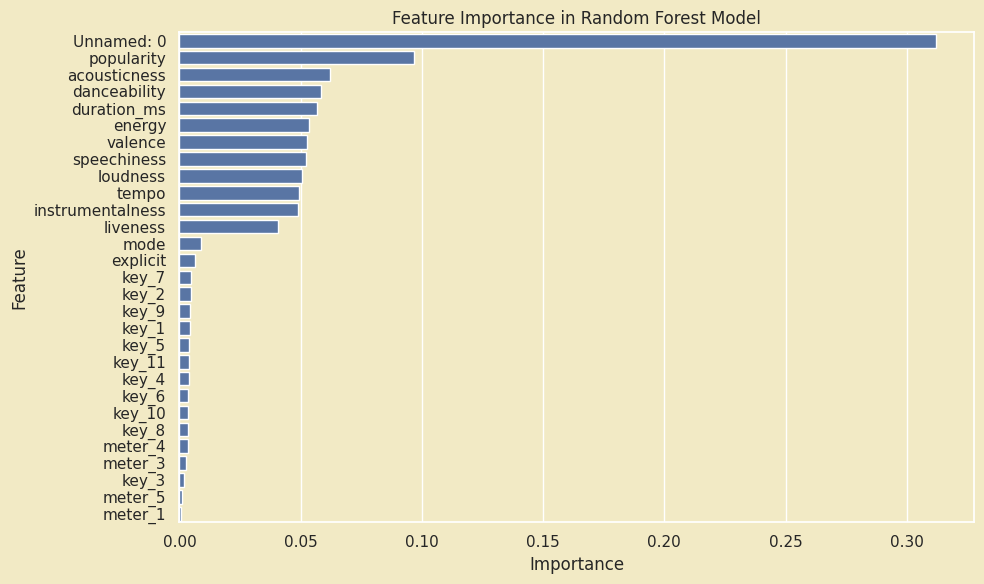

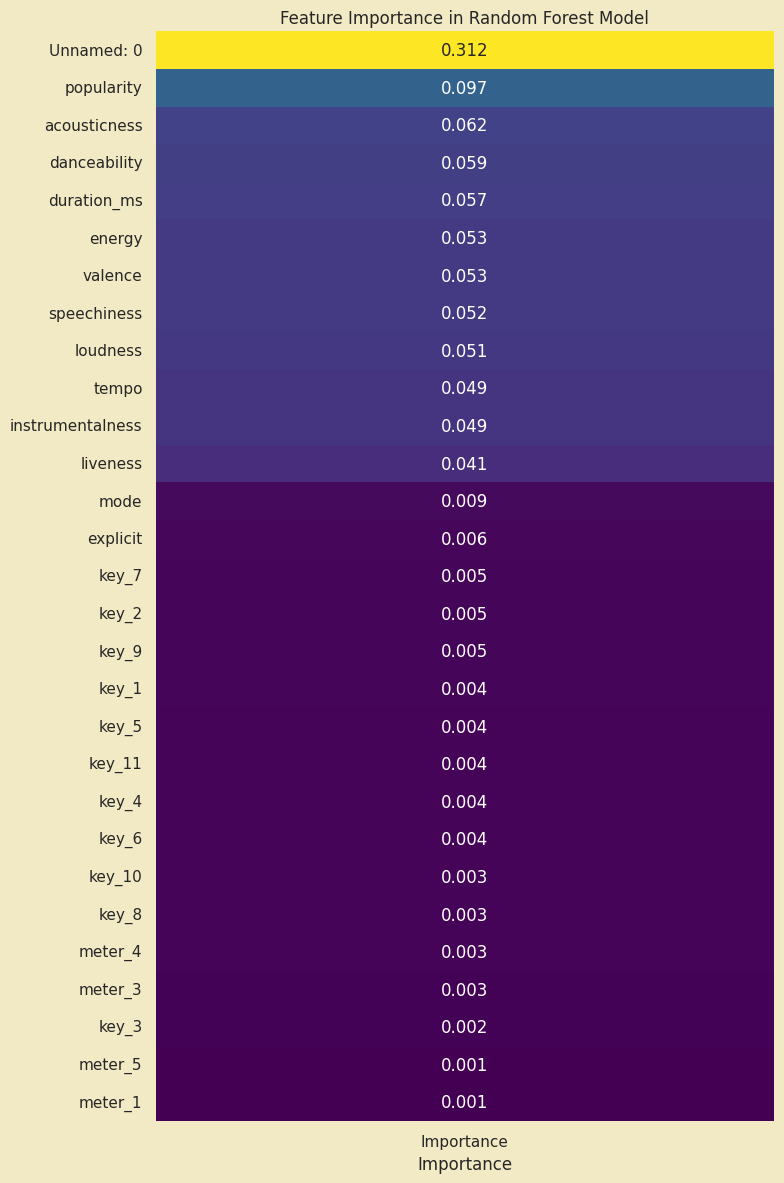

In [123]:
# Feature Importance
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf_model.feature_importances_

feature_names = df.drop("track_genre", axis=1).columns

# Create a DataFrame for plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Alternatively, create a horizontal heatmap
plt.figure(figsize=(8, 12))
sns.heatmap(importance_df[['Importance']].sort_values(by='Importance', ascending=False),
            annot=True, cmap='viridis', fmt=".3f", cbar=False, yticklabels=importance_df['Feature'])
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Conclusions

In this project, we explored the effectiveness of various machine learning models in classifying music genres from audio features extracted from the Spotify dataset. Our findings provide valuable insights into the feasibility and challenges of audio-based genre classification.

Among the models evaluated, the XGBoost classifier demonstrated the highest Top-3 Categorical Accuracy of 73.74%, closely followed by the Neural Network (69.54%) and the KNN Classifier (70.36%). While XGBoost and Neural Networks exhibited superior performance, they also required more computational resources for training compared to the more lightweight KNN approach.

Interestingly, our results revealed that certain genres were more accurately predicted than others. Genres with distinct and unique sound characteristics, such as 'sleep', 'grindcore', 'study', 'comedy', and 'chicago-house', were among the easier genres to classify. Conversely, genres with more ambiguous or overlapping characteristics, such as 'emo', 'blues-rnb', 'indie', 'techno', and 'show-tunes', proved more challenging for the models to differentiate.

The ensemble model, which combined the predictions of four weak learners, did not outperform the individual models. This could be attributed to the logistic regression component, which may not have been well-suited for the multi-class classification task at hand. Additionally, the ensemble model's extended training time, particularly due to the computationally expensive Support Vector Classifier (SVC), highlighted the trade-off between model complexity and computational efficiency. We also found that the decision tree model prioritizes features like "popularity," "danceability," and "duration_ms" over factors like "explicit" and "mode" in determining song genres.

Overall, this project demonstrated the potential of machine learning techniques in music genre classification, with XGBoost and Neural Networks emerging as promising approaches. However, the inherent subjectivity and overlapping characteristics of certain genres pose ongoing challenges. Future work could explore more advanced feature engineering techniques, ensemble strategies, or incorporatemultimodal data sources to further improve genre classification accuracy.